# Reinforcement Q-learning simple NN as function approximation

- Portfolio grid of size 10 (0 to 1)
- 2 hidden neural layers 
- Training

In [1]:
# Initialization
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv') #Three stocks (R,X_s,X_b,s_nom,s_pe,s_spr) 

In [7]:
data = pd.read_excel('sim_data_VAR.xlsx') #Three stocks (R,X_s,X_b) Without predictors

# Initialization of the Tensorflow placeholders and the network

In [3]:
num_lags = 10
num_stocks=3
num_inputvar = (num_lags+1)*num_stocks
num_actions=10
hidden1 = 20
hidden2 = 45
hidden3 = 20

#Initialize Neural Network and set-up the placeholders
tf.reset_default_graph()
NN_input = tf.placeholder(shape=[1,num_inputvar],dtype=tf.float32)
# w1 = tf.Variable(tf.random_uniform([num_inputvar,hidden1],0,1))
# w2 = tf.Variable(tf.random_uniform([hidden1,hidden2],0,1))
# w3 = tf.Variable(tf.random_uniform([hidden2,hidden3],0,1))
# w4 = tf.Variable(tf.random_uniform([hidden3,num_actions],0,1))
# b1 = tf.Variable(np.zeros((1,hidden1)), dtype=tf.float32)
# b2 = tf.Variable(np.zeros((1,hidden2)), dtype=tf.float32)
# b3 = tf.Variable(np.zeros((1,hidden3)), dtype=tf.float32)
# b4 = tf.Variable(np.zeros((1,num_actions)), dtype=tf.float32)

w1 = tf.Variable(tf.random_uniform([num_inputvar,hidden1],0,0.01))
b1 = tf.Variable(np.ones((1,hidden1)), dtype=tf.float32) 
w2 = tf.Variable(tf.random_uniform([hidden1,num_actions],0,0.01))
b2 = tf.Variable(np.ones((1,num_actions)), dtype=tf.float32) 
# h1 = tf.add(tf.matmul(NN_input,w1),b1)
# # h_drop1 = tf.nn.dropout(h1,0.5)
# a1 = tf.nn.softmax(h1)

# h2 = tf.add(tf.matmul(a1,w2),b2)
# # h_drop2 = tf.nn.dropout(h2,0.3)
# a2 = tf.nn.softmax(h2)

# h3 = tf.add(tf.matmul(a2,w3),b3)
# # h_drop3 = tf.nn.dropout(h3,0.1)
# a3 = tf.nn.softmax(h3)

# ol = tf.add(tf.matmul(a3,w4),b4)
# output = tf.nn.softmax(ol)

outputh1 = tf.matmul(NN_input,w1)
# outputh1 = tf.nn.softmax(h1)
h2 = tf.matmul(outputh1,w2)
output = tf.nn.softmax(h2)
A_Max = tf.argmax(output,1)

Q_Next = tf.placeholder(shape=[1,num_actions],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(Q_Next - output))



learning_rate = tf.placeholder(tf.float32, shape=[])
trainer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
optmzr = trainer.minimize(loss)


# A_Max = tf.argmax(output,1)
# Calculate loss for the NN from the Q values
# Q_Next = tf.placeholder(shape=[1,num_actions],dtype=tf.float32)
# diff = tf.subtract(Q_Next,output)
# loss = tf.reduce_sum(tf.multiply(diff,diff))

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(a4 * tf.log(Q_Next), reduction_indices=[1]))
# optmzr = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)
A = np.linspace(0,1,num_actions) # portfolio weights of stocks (1-weight) is the weight in the bonds

# Training of the NN function approximation

1974-12-01 00:00:00


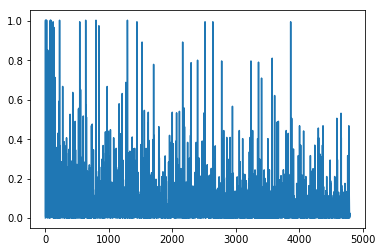

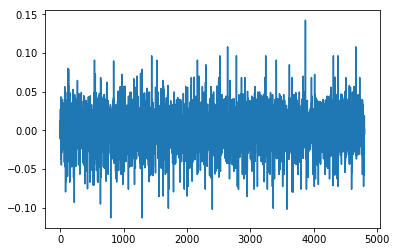

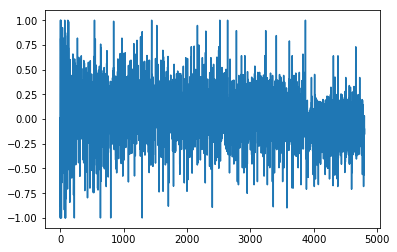

240
1.12473236898
[ 0.22222222  0.77777778  0.22222222  0.22222222  0.66666667  0.55555556
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.44444444  0.66666667  0.66666667  0.55555556
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  1.          0.44444444  0.66666667  0.          0.66666667
  0.66666667  1.          0.33333333  0.77777778  0.33333333  0.22222222
  0.22222222  0.22222222  0.88888889  0.22222222  0.22222222  0.22222222
  0.22222222  0.55555556  0.66666667  0.66666667  0.33333333  0.55555556
  0.11111111  0.66666667  1.          0.55555556  0.88888889  0.22222222
  0.66666667  0.33333333  0.22222222  0.66666667  0.22222222]
Writing away results
1975-01-01 00:00:00


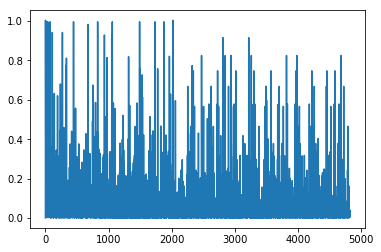

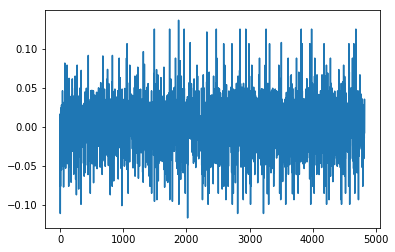

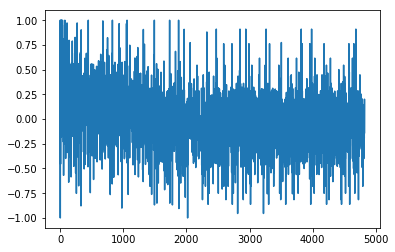

241
1.31278040688
[ 0.11111111  0.55555556  0.77777778  0.66666667  0.66666667  0.22222222
  0.66666667  1.          0.22222222  1.          0.22222222  1.
  0.66666667  0.66666667  1.          0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  1.          0.66666667  0.66666667  0.66666667
  0.66666667  1.          0.55555556  0.22222222  0.77777778  0.66666667
  0.66666667  0.88888889  0.          0.77777778  0.77777778  0.55555556
  0.77777778  0.77777778  0.88888889  0.33333333  0.55555556  0.44444444
  0.44444444  0.66666667  0.66666667  0.          0.88888889  0.22222222
  0.33333333  0.33333333  0.33333333  0.11111111  0.33333333  0.66666667
  0.22222222  0.44444444  0.66666667  0.88888889  0.22222222]
Writing away results
1975-02-01 00:00:00


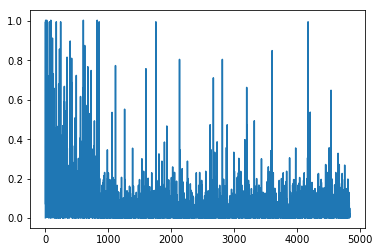

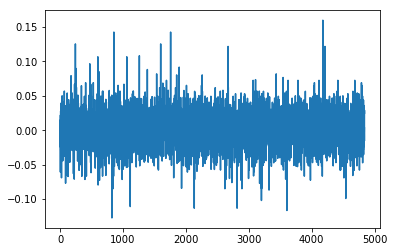

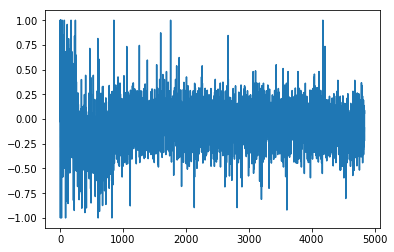

242
1.18905251026
[ 0.33333333  0.33333333  0.66666667  0.55555556  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  1.          0.77777778
  0.77777778  0.22222222  0.77777778  0.55555556  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.22222222  0.77777778  0.77777778
  0.22222222  0.55555556  0.44444444  0.66666667  0.22222222  0.55555556
  0.11111111  0.22222222  0.33333333  0.33333333  0.66666667  0.33333333
  0.33333333  0.33333333  0.44444444  0.66666667  0.33333333  0.33333333
  0.77777778  0.22222222  0.66666667  0.33333333  0.77777778  0.77777778
  1.          0.55555556  0.77777778  0.22222222  0.22222222  0.66666667
  0.77777778  0.77777778  0.33333333  0.          0.77777778]
Writing away results
1975-03-01 00:00:00


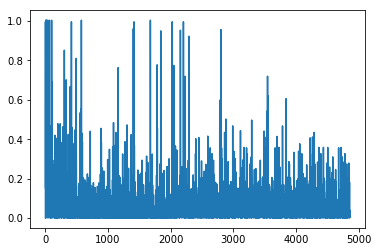

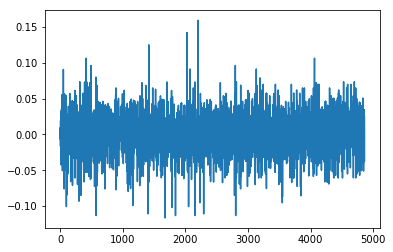

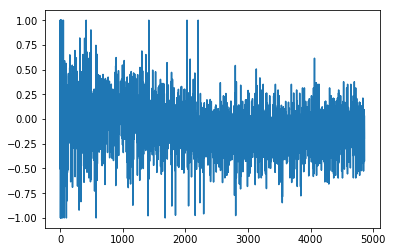

243
1.05105934708
[ 0.11111111  0.22222222  0.77777778  0.77777778  0.22222222  0.77777778
  0.88888889  0.88888889  0.77777778  1.          0.          1.          0.
  0.77777778  1.          0.77777778  1.          0.77777778  1.
  0.77777778  1.          0.77777778  0.77777778  0.22222222  0.22222222
  0.          0.11111111  0.77777778  0.33333333  0.55555556  0.44444444
  0.11111111  0.11111111  0.33333333  0.11111111  0.44444444  0.55555556
  0.11111111  0.11111111  0.11111111  0.          0.88888889  0.77777778
  0.44444444  0.44444444  0.55555556  0.66666667  0.11111111  0.66666667
  0.55555556  0.66666667  0.11111111  0.33333333  0.11111111  0.77777778
  0.11111111  0.88888889  0.66666667  0.11111111]
Writing away results
1975-04-01 00:00:00


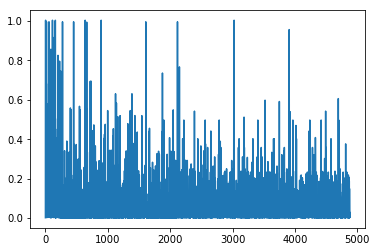

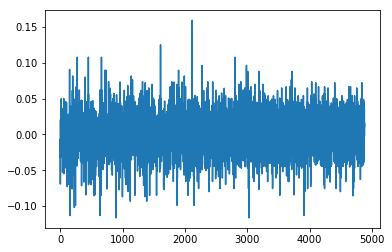

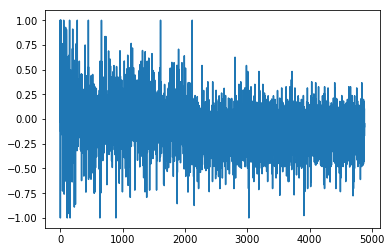

244
0.936805018689
[ 1.          1.          1.          0.44444444  1.          1.
  0.88888889  0.88888889  0.44444444  0.33333333  0.66666667  0.77777778
  1.          0.66666667  1.          0.44444444  0.88888889  1.
  0.88888889  0.88888889  1.          0.44444444  1.          1.
  0.88888889  0.88888889  0.44444444  0.33333333  0.          0.77777778
  0.11111111  0.11111111  0.44444444  0.44444444  0.          0.66666667
  0.33333333  0.77777778  0.77777778  0.11111111  0.66666667  0.77777778
  1.          0.11111111  0.66666667  0.88888889  0.77777778  0.
  0.66666667  0.          0.77777778  0.11111111  0.66666667  1.          0.
  1.          0.88888889  0.77777778  0.77777778]
Writing away results
1975-05-01 00:00:00


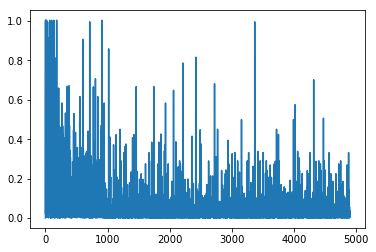

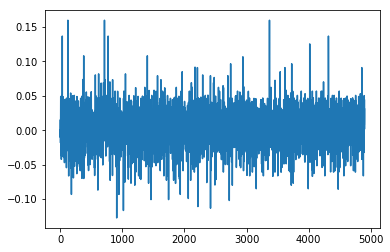

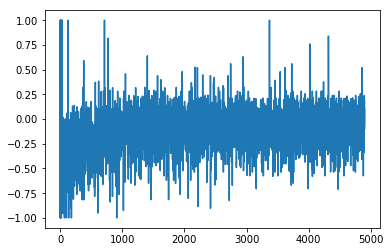

245
1.08146579081
[ 0.11111111  0.88888889  0.22222222  0.77777778  0.44444444  1.
  0.77777778  0.77777778  0.55555556  0.77777778  1.          0.66666667
  0.11111111  0.44444444  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.88888889  0.77777778  0.33333333  0.55555556  0.11111111
  0.88888889  0.88888889  0.77777778  0.33333333  0.33333333  0.          0.
  0.          0.          0.33333333  0.55555556  0.88888889  0.88888889
  0.22222222  0.66666667  0.88888889  0.22222222  0.22222222  0.11111111
  0.44444444  0.88888889  0.55555556  0.55555556  0.55555556  0.88888889
  0.22222222  0.44444444  1.          0.77777778  0.          0.88888889
  0.          0.88888889  0.33333333  0.22222222]
Writing away results
1975-06-01 00:00:00


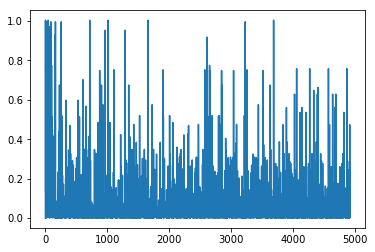

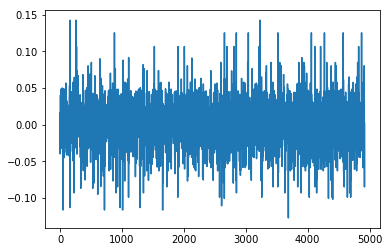

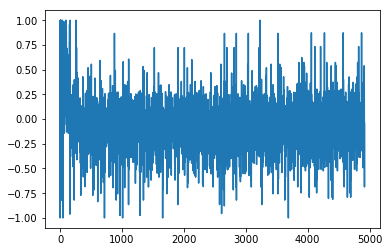

246
1.18127063446
[ 0.88888889  0.33333333  0.44444444  0.88888889  0.88888889  1.          1.
  0.55555556  0.33333333  0.44444444  0.33333333  1.          0.88888889
  1.          1.          0.88888889  1.          0.44444444  0.88888889
  1.          0.66666667  0.11111111  0.88888889  0.66666667  0.44444444
  1.          0.66666667  0.77777778  0.77777778  0.77777778  0.
  0.77777778  0.77777778  0.77777778  0.          0.22222222  0.77777778
  0.88888889  0.33333333  0.33333333  0.22222222  0.55555556  0.88888889
  0.22222222  1.          0.55555556  0.66666667  0.66666667  0.44444444
  0.11111111  0.55555556  0.33333333  1.          0.88888889  0.33333333
  0.44444444  0.66666667  0.77777778  0.11111111]
Writing away results
1975-07-01 00:00:00


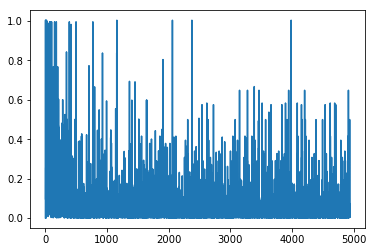

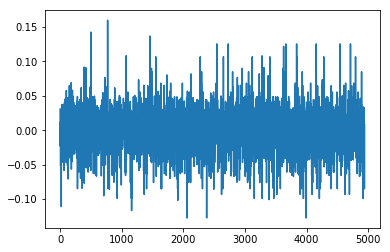

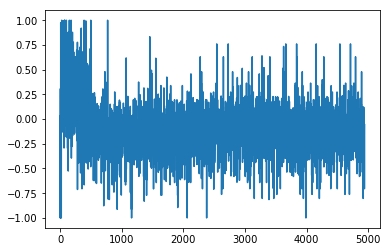

247
1.03941136344
[ 0.66666667  0.66666667  0.66666667  0.          0.          0.
  0.66666667  0.88888889  0.66666667  0.66666667  0.44444444  0.66666667
  0.          0.          0.66666667  0.          0.66666667  0.66666667
  0.88888889  0.88888889  0.77777778  0.          0.33333333  0.
  0.33333333  0.55555556  1.          0.44444444  0.77777778  1.
  0.77777778  0.77777778  0.77777778  0.11111111  0.33333333  0.77777778
  0.66666667  0.66666667  0.66666667  0.33333333  0.44444444  0.44444444
  0.          0.33333333  0.          0.66666667  0.55555556  0.44444444
  0.44444444  0.33333333  0.66666667  0.22222222  0.66666667  0.44444444
  0.22222222  0.33333333  0.77777778  0.44444444  0.44444444]
Writing away results
1975-08-01 00:00:00


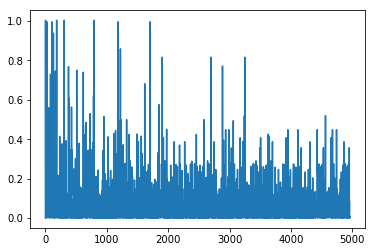

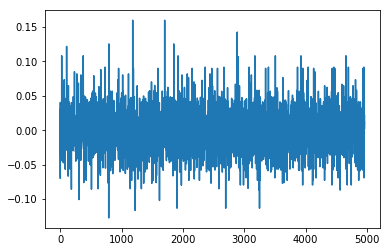

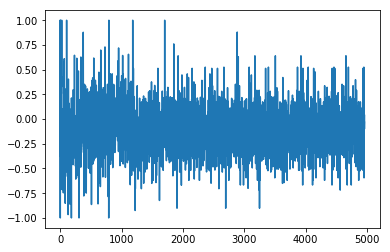

248
1.09238033824
[ 0.          1.          1.          0.55555556  0.55555556  0.88888889
  0.77777778  0.77777778  0.77777778  0.11111111  1.          0.11111111
  0.55555556  0.11111111  0.88888889  0.          0.88888889  0.88888889
  1.          1.          0.          0.          0.55555556  0.44444444
  0.66666667  0.77777778  0.22222222  1.          0.33333333  0.33333333
  0.66666667  0.33333333  0.44444444  0.22222222  0.22222222  0.77777778
  0.77777778  0.55555556  0.22222222  1.          0.44444444  0.55555556
  0.55555556  1.          0.77777778  0.22222222  0.55555556  0.22222222
  1.          0.77777778  0.33333333  1.          0.33333333  0.55555556
  0.77777778  0.66666667  1.          0.22222222  0.55555556]
Writing away results
1975-09-01 00:00:00


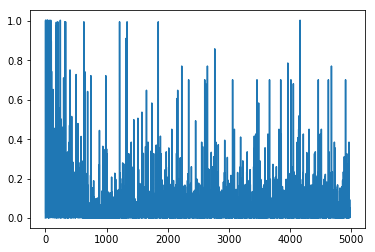

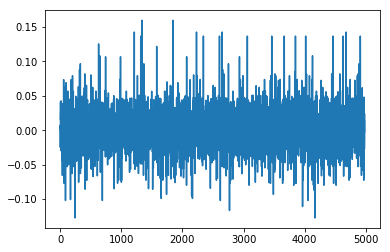

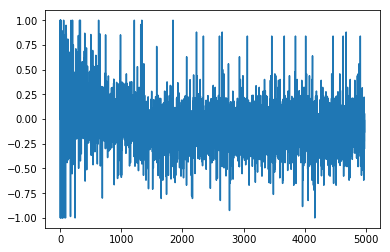

249
1.2409003728
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.22222222  0.55555556  0.77777778  0.22222222  0.77777778
  0.77777778  0.77777778  0.77777778  0.22222222  0.77777778  0.77777778
  0.88888889  0.77777778  0.33333333  0.          0.77777778  0.77777778
  0.          0.88888889  1.          0.88888889  0.11111111  0.88888889
  0.88888889  0.11111111  0.          0.          0.77777778  0.55555556
  0.77777778  0.44444444  0.88888889  0.88888889  0.11111111  0.11111111
  0.11111111  0.55555556  0.66666667  0.          0.88888889  0.55555556
  0.22222222  0.11111111  0.77777778  0.55555556  0.11111111  0.88888889
  0.44444444  0.66666667  0.88888889  0.33333333  0.77777778]
Writing away results
1975-10-01 00:00:00


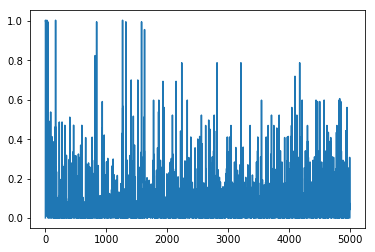

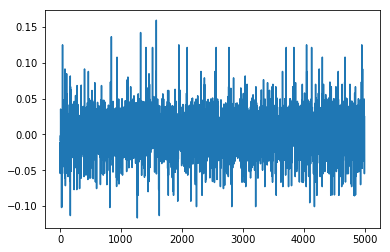

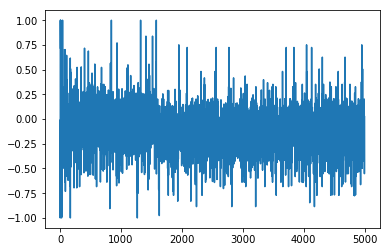

250
1.26327275671
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  1.          0.88888889  0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.77777778  0.77777778  0.77777778  1.          0.11111111
  0.33333333  0.55555556  0.77777778  0.55555556  0.55555556  0.11111111
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.77777778  0.22222222  0.88888889  0.33333333  0.77777778  0.77777778
  0.66666667  0.66666667  0.55555556  0.77777778  0.77777778  0.22222222
  0.55555556  0.77777778  0.88888889  0.66666667  0.          1.
  0.11111111  1.          0.          0.77777778  0.22222222  0.66666667
  0.88888889  0.66666667  0.77777778  0.22222222  0.        ]
Writing away results
1975-11-01 00:00:00


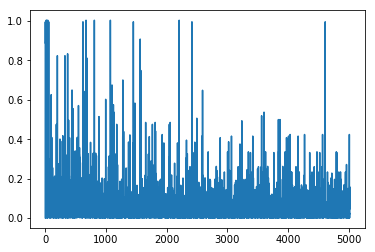

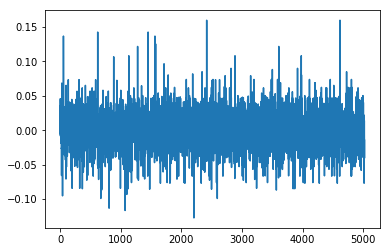

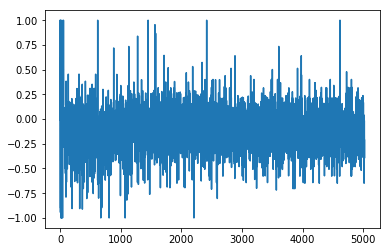

251
1.13399460384
[ 0.22222222  0.          0.22222222  0.33333333  0.          0.55555556
  0.88888889  0.22222222  0.55555556  0.          0.55555556  0.11111111
  0.22222222  0.55555556  0.          0.88888889  0.11111111  0.88888889
  0.11111111  0.55555556  0.          0.88888889  0.11111111  0.66666667
  0.66666667  0.55555556  0.44444444  0.66666667  1.          0.22222222
  0.          0.          1.          0.11111111  0.          0.44444444
  0.88888889  0.11111111  0.88888889  0.          0.55555556  0.11111111
  0.66666667  1.          0.88888889  1.          0.55555556  0.66666667
  0.22222222  0.11111111  0.22222222  0.55555556  0.88888889  0.88888889
  0.11111111  0.          0.55555556  1.          0.66666667]
Writing away results
1975-12-01 00:00:00


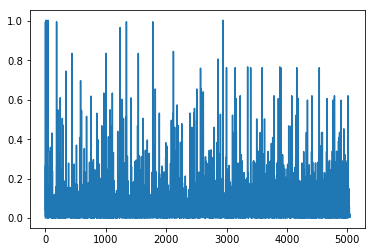

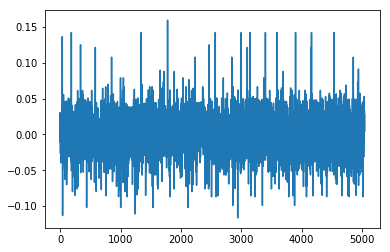

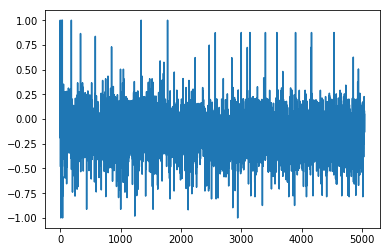

252
1.33915078206
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.22222222  0.77777778
  0.77777778  1.          0.77777778  0.77777778  0.77777778  0.77777778
  0.22222222  0.22222222  0.33333333  0.11111111  0.77777778  0.66666667
  0.22222222  0.22222222  0.          0.66666667  0.          0.66666667
  0.66666667  0.          0.66666667  0.88888889  0.          0.66666667
  0.22222222  0.77777778  0.77777778  0.22222222  0.66666667  0.88888889
  0.11111111  1.          0.22222222  0.55555556  0.          0.55555556
  0.22222222  0.44444444  1.          0.33333333  0.11111111  0.77777778
  0.88888889  1.          0.66666667  0.          0.88888889  0.88888889
  0.          0.33333333  0.22222222  0.77777778  0.66666667]
Writing away results
1976-01-01 00:00:00


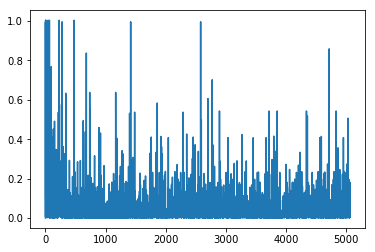

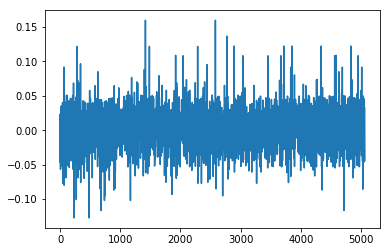

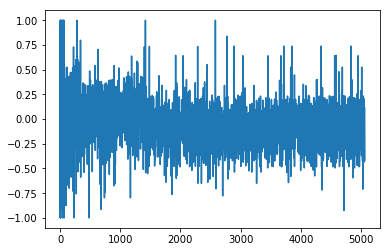

253
1.1663264251
[ 1.          0.77777778  0.33333333  0.77777778  0.77777778  0.77777778
  0.77777778  0.11111111  0.77777778  1.          0.77777778  0.77777778
  0.33333333  0.55555556  1.          0.22222222  0.          1.
  0.77777778  0.66666667  0.22222222  0.66666667  0.66666667  0.
  0.66666667  0.66666667  0.22222222  0.44444444  0.          0.55555556
  0.77777778  0.77777778  0.33333333  0.55555556  0.11111111  0.11111111
  1.          0.55555556  1.          0.44444444  0.66666667  0.33333333
  0.66666667  0.88888889  0.77777778  0.22222222  0.11111111  1.          1.
  0.66666667  0.66666667  0.22222222  1.          0.33333333  0.55555556
  0.77777778  0.11111111  1.          1.        ]
Writing away results
1976-02-01 00:00:00


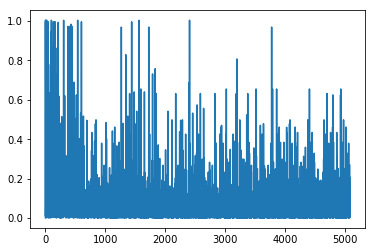

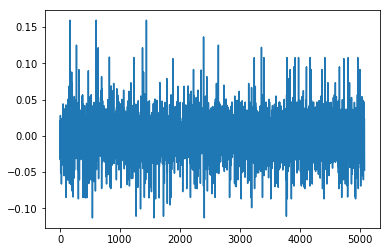

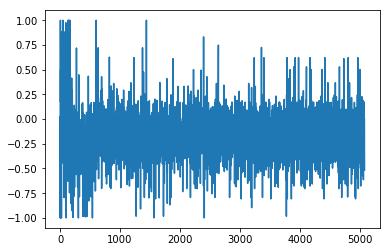

254
1.14959993779
[ 0.77777778  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.55555556  0.22222222  0.77777778  0.55555556  0.77777778  0.77777778
  0.66666667  0.33333333  0.66666667  0.66666667  0.11111111  0.66666667
  0.66666667  0.66666667  0.77777778  0.55555556  0.          0.33333333
  0.77777778  0.88888889  1.          0.66666667  0.77777778  0.44444444
  0.22222222  0.66666667  0.33333333  1.          0.          1.
  0.77777778  0.44444444  0.66666667  0.66666667  0.77777778  0.77777778
  0.55555556  0.66666667  0.66666667  0.11111111  1.          0.44444444
  0.33333333  0.77777778  0.55555556  0.77777778  0.88888889]
Writing away results
1976-03-01 00:00:00


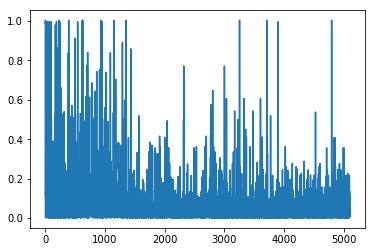

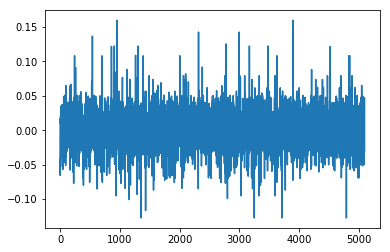

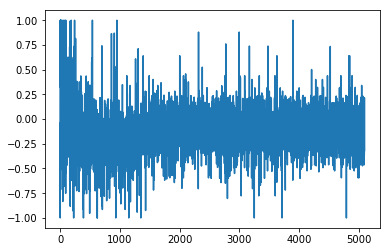

255
1.12666857331
[ 1.          0.88888889  0.33333333  0.88888889  0.33333333  1.
  0.77777778  0.33333333  0.77777778  0.77777778  0.          0.88888889
  0.33333333  0.55555556  0.          0.33333333  1.          0.88888889
  0.          0.44444444  0.66666667  0.33333333  0.33333333  0.88888889
  0.33333333  1.          0.44444444  0.44444444  0.88888889  0.88888889
  0.          0.33333333  0.88888889  0.          0.77777778  0.
  0.44444444  0.66666667  0.33333333  0.11111111  0.66666667  1.
  0.77777778  0.33333333  0.88888889  0.33333333  1.          0.44444444
  0.33333333  0.88888889  0.          0.          0.88888889  0.33333333
  0.77777778  0.88888889  0.44444444  0.66666667  0.33333333]
Writing away results
1976-04-01 00:00:00


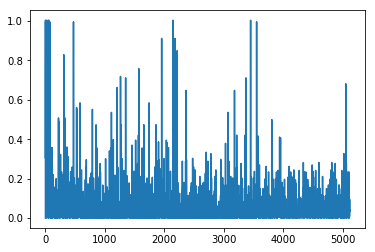

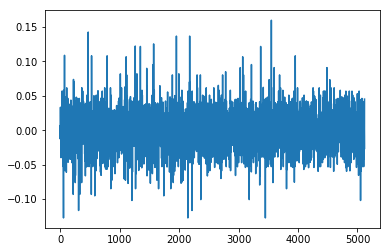

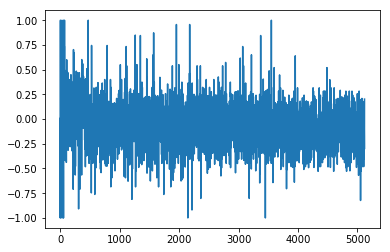

256
0.965499744145
[ 0.44444444  0.55555556  0.11111111  0.77777778  0.88888889  0.77777778
  0.77777778  0.88888889  0.33333333  0.33333333  1.          0.11111111
  0.88888889  0.22222222  0.33333333  0.33333333  1.          0.88888889
  0.          0.22222222  0.          0.44444444  0.55555556  0.
  0.33333333  1.          1.          1.          0.11111111  0.88888889
  0.44444444  0.55555556  0.11111111  0.33333333  0.44444444  1.
  0.22222222  0.          0.88888889  1.          0.22222222  0.77777778
  0.44444444  0.11111111  0.11111111  0.88888889  0.77777778  1.
  0.11111111  0.          0.88888889  1.          1.          0.33333333
  0.22222222  0.88888889  0.66666667  0.55555556  0.55555556]
Writing away results
1976-05-01 00:00:00


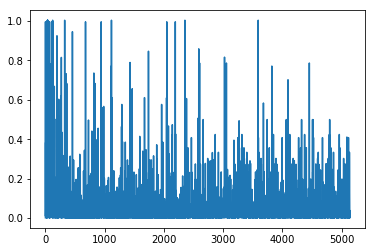

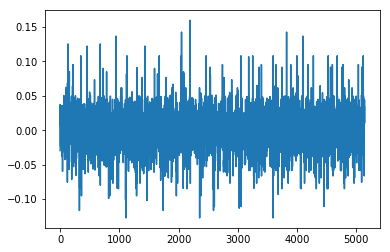

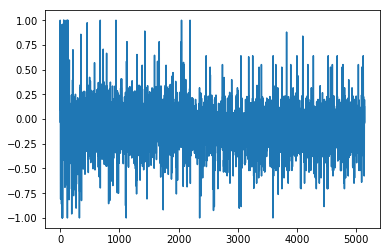

257
1.17208071459
[ 0.33333333  0.44444444  0.77777778  0.77777778  0.44444444  0.77777778
  0.88888889  0.77777778  0.77777778  0.44444444  0.66666667  0.77777778
  0.11111111  0.77777778  0.11111111  0.          0.          0.66666667
  0.22222222  0.11111111  0.66666667  0.          0.66666667  1.          1.
  0.55555556  0.          0.88888889  0.88888889  0.33333333  0.33333333
  0.11111111  0.77777778  0.77777778  0.66666667  0.11111111  0.88888889
  0.88888889  0.44444444  0.22222222  0.77777778  0.66666667  0.          1.
  1.          0.11111111  0.66666667  0.88888889  0.11111111  0.88888889
  0.44444444  0.66666667  0.44444444  0.77777778  1.          0.22222222
  0.          0.          0.44444444]
Writing away results
1976-06-01 00:00:00


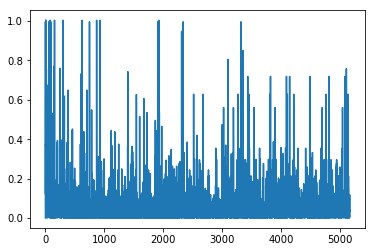

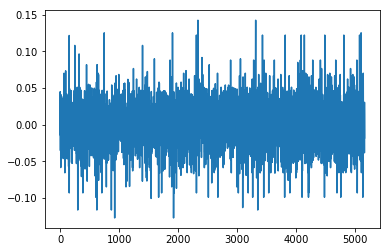

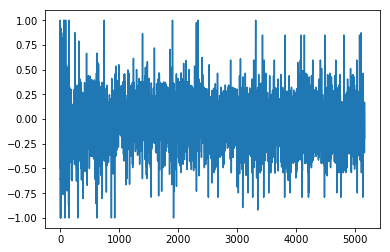

258
0.967500613578
[ 1.          1.          1.          1.          1.          1.          1.
  1.          0.66666667  1.          1.          0.11111111  1.          0.
  0.66666667  0.44444444  0.11111111  0.33333333  0.77777778  0.77777778
  0.11111111  0.44444444  0.22222222  0.77777778  0.77777778  1.
  0.66666667  1.          0.77777778  0.22222222  0.          0.66666667
  0.77777778  1.          0.          0.44444444  0.55555556  0.88888889
  0.22222222  1.          0.77777778  1.          0.44444444  0.66666667
  0.77777778  0.77777778  0.55555556  0.          0.44444444  1.
  0.66666667  1.          0.66666667  1.          1.          1.          1.
  1.          0.        ]
Writing away results
1976-07-01 00:00:00


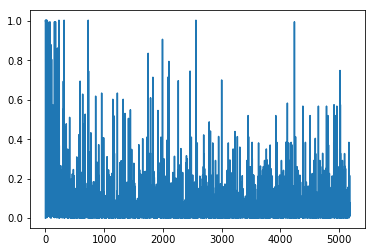

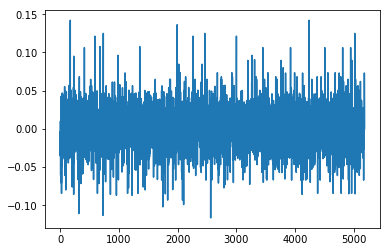

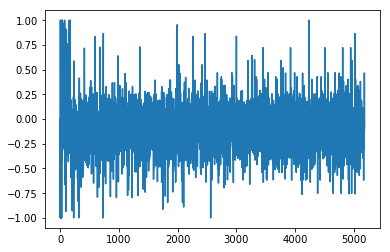

259
1.12041274392
[ 0.11111111  0.22222222  0.55555556  0.88888889  0.33333333  0.11111111
  0.66666667  0.33333333  0.11111111  0.88888889  0.77777778  1.
  0.55555556  0.33333333  0.88888889  0.44444444  0.44444444  0.77777778
  0.44444444  0.33333333  0.44444444  0.66666667  0.77777778  0.
  0.66666667  0.44444444  0.66666667  0.44444444  0.22222222  0.55555556
  0.33333333  0.66666667  0.          0.77777778  0.77777778  0.66666667
  0.44444444  0.44444444  0.55555556  0.          0.33333333  0.88888889
  0.66666667  0.          0.44444444  0.11111111  0.88888889  0.66666667
  0.55555556  0.          0.33333333  0.88888889  0.          0.11111111
  0.11111111  0.22222222  0.22222222  0.77777778  0.        ]
Writing away results
1976-08-01 00:00:00


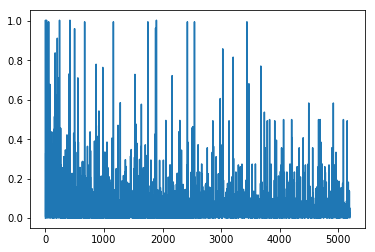

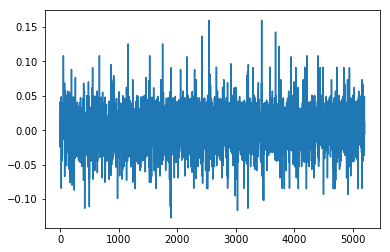

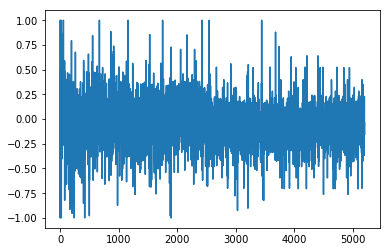

260
1.05281315818
[ 0.          0.11111111  0.22222222  0.          0.44444444  0.11111111
  0.33333333  0.22222222  0.11111111  0.33333333  0.44444444  1.
  0.88888889  0.22222222  0.11111111  0.66666667  0.66666667  0.55555556
  0.66666667  0.55555556  0.77777778  0.66666667  0.66666667  0.66666667
  0.22222222  0.          0.55555556  1.          0.77777778  0.          0.
  0.66666667  0.88888889  0.33333333  0.44444444  0.55555556  1.
  0.22222222  0.22222222  0.11111111  0.22222222  0.          0.66666667
  0.22222222  0.88888889  0.77777778  0.11111111  0.66666667  1.          1.
  0.22222222  0.11111111  0.11111111  0.22222222  0.44444444  0.88888889
  0.          0.11111111  1.        ]
Writing away results
1976-09-01 00:00:00


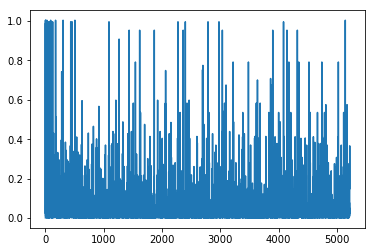

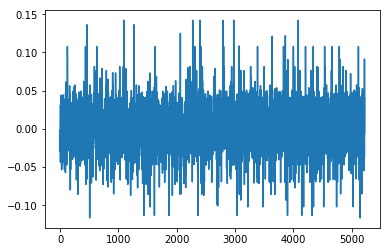

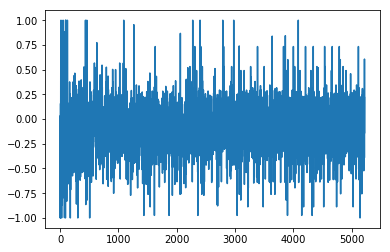

261
0.799190372258
[ 1.          0.77777778  0.77777778  0.77777778  0.33333333  1.          0.
  0.77777778  0.          0.11111111  1.          1.          0.33333333
  0.66666667  0.66666667  0.11111111  0.55555556  0.66666667  0.55555556
  0.88888889  1.          0.33333333  1.          0.          0.44444444
  0.66666667  0.66666667  0.88888889  0.22222222  0.33333333  1.          1.
  0.77777778  0.22222222  1.          1.          0.77777778  0.55555556
  0.66666667  0.          0.22222222  1.          0.66666667  0.          0.
  0.33333333  1.          1.          1.          0.          0.77777778
  1.          0.22222222  0.33333333  0.33333333  0.33333333  0.66666667
  0.66666667  1.        ]
Writing away results
1976-10-01 00:00:00


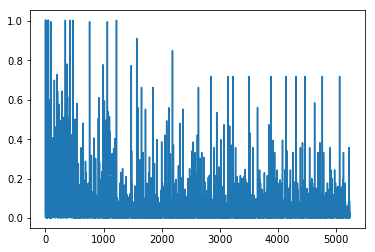

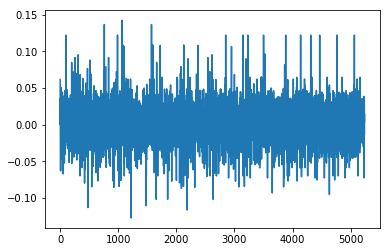

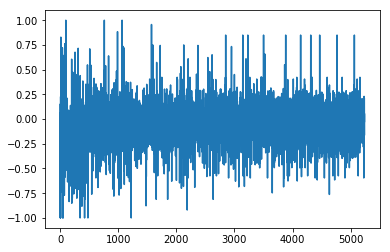

262
0.881401934398
[ 1.          0.88888889  1.          0.88888889  0.22222222  0.66666667
  0.55555556  0.          1.          0.55555556  0.33333333  0.11111111
  0.11111111  0.22222222  0.22222222  0.55555556  0.44444444  0.11111111
  0.55555556  1.          0.11111111  0.44444444  0.88888889  0.88888889
  0.22222222  0.          0.66666667  1.          1.          0.11111111
  0.          0.33333333  0.77777778  0.44444444  0.          0.66666667
  0.55555556  0.44444444  0.66666667  0.55555556  0.22222222  0.11111111
  0.          1.          0.55555556  0.44444444  0.11111111  0.
  0.66666667  0.55555556  0.88888889  0.33333333  1.          1.
  0.66666667  1.          0.22222222  0.          0.22222222]
Writing away results
1976-11-01 00:00:00


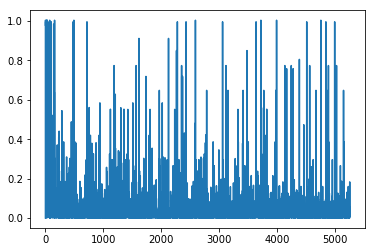

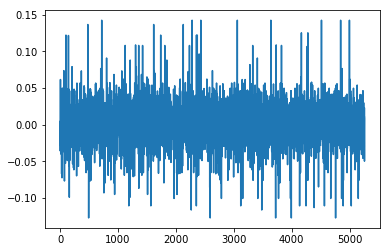

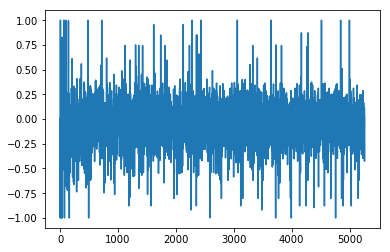

263
1.06042054699
[ 0.55555556  0.66666667  0.66666667  0.          0.          0.33333333
  0.44444444  0.77777778  0.          0.22222222  0.55555556  0.11111111
  0.77777778  0.77777778  0.11111111  0.          0.77777778  0.66666667
  0.22222222  0.66666667  1.          0.66666667  0.66666667  0.
  0.33333333  0.          0.44444444  0.77777778  0.33333333  0.22222222
  0.44444444  0.66666667  1.          0.66666667  0.55555556  0.11111111
  0.          0.44444444  0.44444444  0.          0.11111111  0.88888889
  0.44444444  0.66666667  1.          0.55555556  0.66666667  0.44444444
  0.66666667  0.11111111  0.33333333  0.          0.33333333  0.44444444
  0.77777778  0.11111111  0.44444444  0.77777778  0.77777778]
Writing away results
1976-12-01 00:00:00


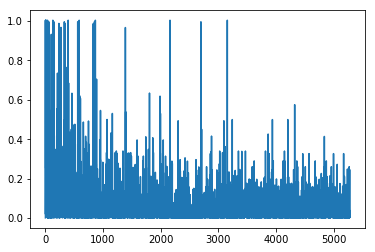

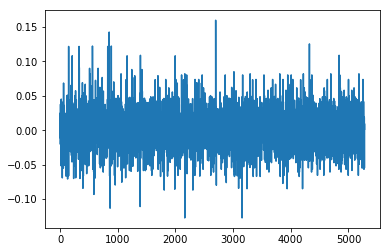

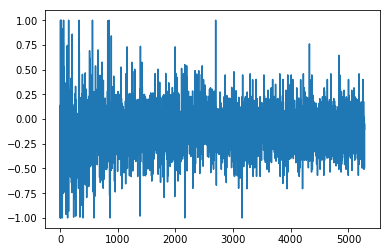

264
1.00237574117
[ 0.88888889  0.66666667  0.22222222  0.77777778  0.66666667  0.33333333
  0.66666667  0.55555556  0.22222222  1.          0.44444444  0.44444444
  0.22222222  0.44444444  0.22222222  0.77777778  0.11111111  0.22222222
  0.44444444  0.44444444  0.11111111  0.55555556  0.33333333  0.77777778
  0.77777778  0.66666667  0.          0.44444444  0.77777778  1.
  0.88888889  0.22222222  0.11111111  0.33333333  0.55555556  0.77777778
  0.77777778  0.66666667  0.22222222  0.66666667  0.77777778  0.11111111
  0.66666667  0.22222222  0.          0.88888889  1.          1.
  0.33333333  0.22222222  1.          0.66666667  1.          0.
  0.77777778  0.22222222  0.77777778  0.77777778  0.11111111]
Writing away results
1977-01-01 00:00:00


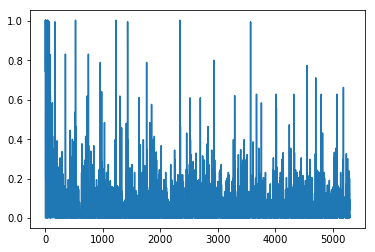

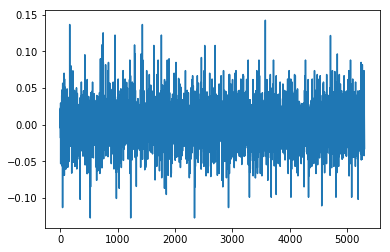

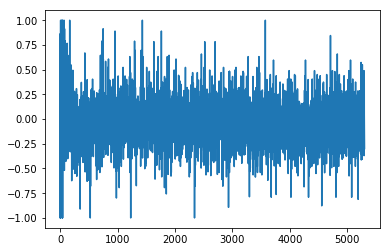

265
0.955695655014
[ 0.55555556  1.          0.11111111  1.          0.44444444  0.77777778
  0.33333333  0.33333333  0.11111111  0.77777778  0.44444444  0.77777778
  0.22222222  0.44444444  0.11111111  1.          0.77777778  0.55555556
  1.          0.          0.55555556  0.55555556  0.66666667  0.22222222
  0.22222222  0.33333333  1.          0.88888889  0.88888889  0.66666667
  0.77777778  0.66666667  0.          0.22222222  1.          0.77777778
  0.22222222  0.77777778  0.88888889  0.22222222  0.77777778  0.55555556
  1.          0.55555556  1.          0.          0.55555556  0.55555556
  0.55555556  0.66666667  1.          0.22222222  0.11111111  0.22222222
  0.22222222  0.44444444  0.44444444  0.44444444  0.77777778]
Writing away results
1977-02-01 00:00:00


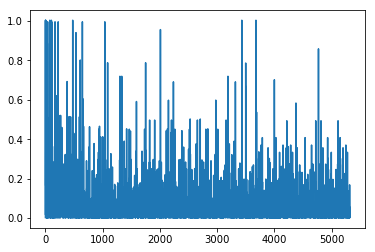

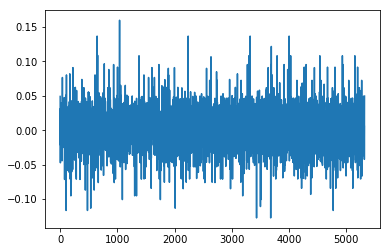

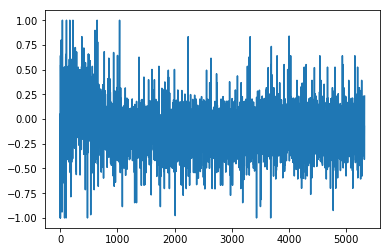

266
0.956085789806
[ 0.77777778  0.11111111  0.88888889  0.44444444  0.77777778  0.22222222
  0.11111111  0.55555556  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  1.          0.66666667  0.55555556  0.55555556
  0.77777778  0.77777778  0.66666667  0.66666667  0.88888889  0.77777778
  0.22222222  0.33333333  0.55555556  0.11111111  0.55555556  0.66666667
  0.77777778  0.77777778  0.11111111  0.33333333  0.88888889  0.77777778
  0.66666667  0.66666667  0.55555556  1.          1.          0.77777778
  0.11111111  0.77777778  0.11111111  0.88888889  0.33333333  0.77777778
  0.77777778  0.77777778  1.          0.11111111  0.66666667  0.11111111
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1977-03-01 00:00:00


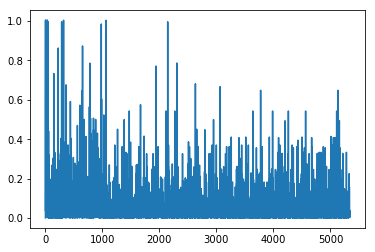

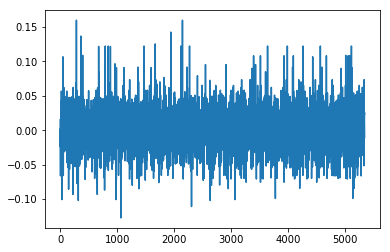

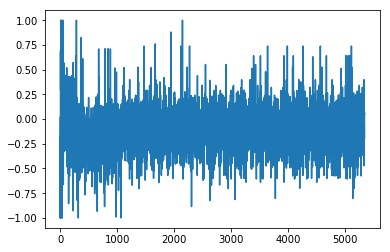

267
0.910338700936
[ 0.          0.77777778  0.          0.88888889  1.          0.66666667
  0.          0.66666667  0.22222222  0.66666667  0.66666667  0.66666667
  0.55555556  0.88888889  0.44444444  0.44444444  0.44444444  0.77777778
  0.88888889  0.11111111  0.11111111  0.77777778  0.88888889  0.11111111
  0.44444444  0.77777778  0.88888889  0.11111111  0.66666667  1.
  0.77777778  0.11111111  0.          0.77777778  0.88888889  0.66666667
  0.66666667  0.          0.77777778  1.          1.          0.66666667
  0.77777778  0.77777778  0.88888889  1.          1.          0.77777778
  0.77777778  0.11111111  0.33333333  0.66666667  0.55555556  0.66666667
  0.66666667  0.22222222  0.66666667  0.66666667  0.66666667]
Writing away results
1977-04-01 00:00:00


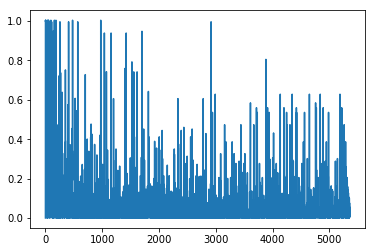

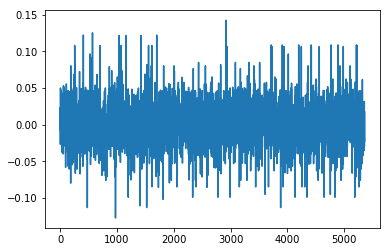

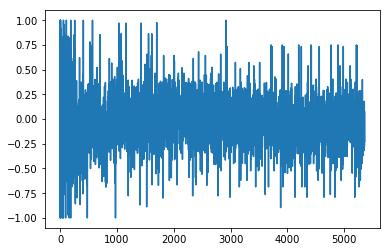

268
1.10030564614
[ 0.77777778  0.11111111  0.88888889  0.11111111  0.44444444  0.33333333
  0.77777778  0.33333333  0.11111111  0.          0.          0.44444444
  0.88888889  0.11111111  0.22222222  0.22222222  0.22222222  0.77777778
  0.77777778  0.66666667  0.11111111  0.88888889  0.88888889  0.88888889
  0.11111111  0.77777778  0.33333333  0.22222222  0.11111111  0.66666667
  0.44444444  0.66666667  0.44444444  0.88888889  0.11111111  0.
  0.66666667  0.77777778  0.88888889  0.88888889  0.22222222  0.
  0.66666667  0.22222222  0.11111111  0.66666667  0.66666667  1.          0.
  0.88888889  0.44444444  0.44444444  0.          0.77777778  0.33333333
  0.11111111  0.77777778  0.77777778  0.44444444]
Writing away results
1977-05-01 00:00:00


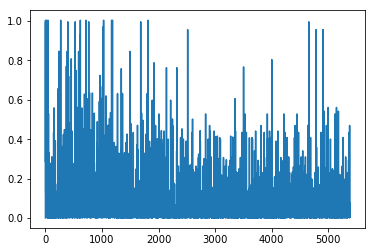

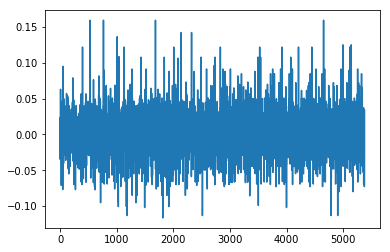

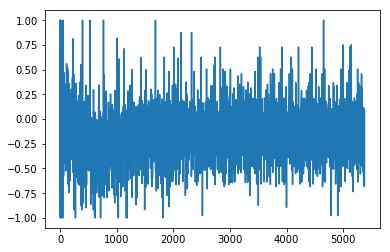

269
0.940467474955
[ 0.22222222  0.11111111  1.          1.          0.55555556  0.44444444
  0.11111111  0.77777778  1.          0.77777778  0.33333333  0.66666667
  0.11111111  1.          0.33333333  0.88888889  0.22222222  0.55555556
  0.77777778  0.77777778  0.66666667  0.77777778  1.          0.77777778
  0.66666667  0.          0.44444444  0.77777778  0.44444444  1.
  0.11111111  0.22222222  0.22222222  0.77777778  1.          0.11111111
  0.44444444  0.22222222  0.55555556  1.          1.          0.66666667
  0.22222222  0.44444444  0.77777778  0.77777778  1.          0.22222222
  0.77777778  0.77777778  0.66666667  0.          0.44444444  0.11111111
  0.77777778  0.66666667  0.66666667  1.          0.66666667]
Writing away results
1977-06-01 00:00:00


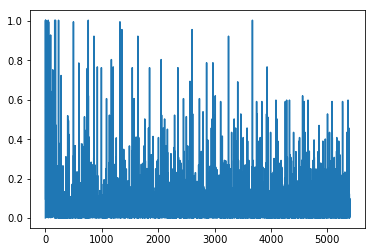

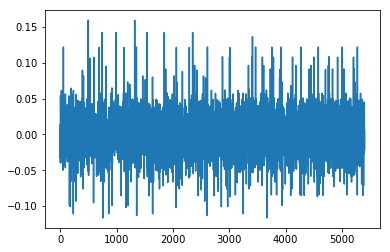

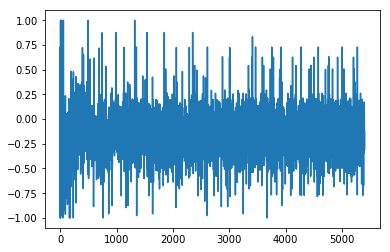

270
0.909667835435
[ 1.          0.33333333  0.55555556  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.88888889  0.22222222  0.77777778  0.          0.88888889  1.
  0.44444444  0.44444444  0.55555556  1.          0.33333333  0.55555556
  0.88888889  0.66666667  0.22222222  0.44444444  0.88888889  0.77777778
  0.          0.77777778  0.88888889  0.88888889  0.66666667  0.66666667
  0.          0.55555556  1.          0.77777778  0.77777778  0.77777778
  0.11111111  1.          1.          0.          0.44444444  0.88888889
  0.33333333  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.88888889  0.66666667  0.66666667  0.66666667]
Writing away results
1977-07-01 00:00:00


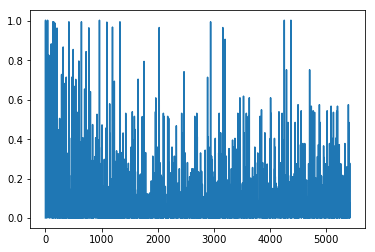

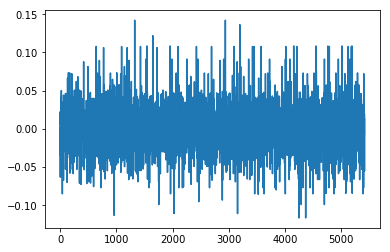

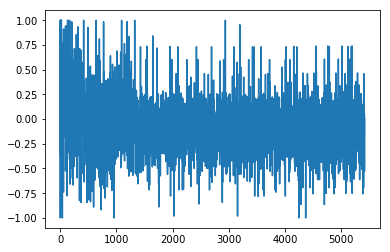

271
0.84505144053
[ 1.          0.66666667  0.          0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.44444444  0.55555556  0.22222222  0.66666667
  0.33333333  0.77777778  0.33333333  0.22222222  0.66666667  1.
  0.77777778  0.          0.66666667  0.77777778  0.88888889  1.
  0.22222222  0.77777778  0.33333333  0.          0.33333333  0.44444444
  0.33333333  0.22222222  0.66666667  0.66666667  0.44444444  0.88888889
  0.33333333  0.77777778  0.77777778  0.          0.55555556  0.22222222
  0.77777778  0.77777778  0.55555556  0.          0.22222222  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.22222222  0.88888889
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1977-08-01 00:00:00


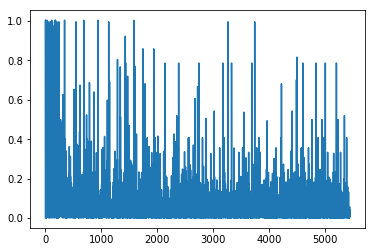

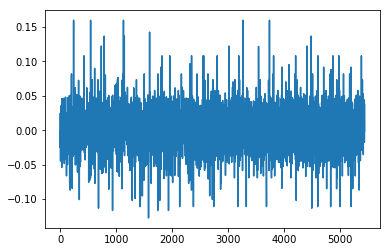

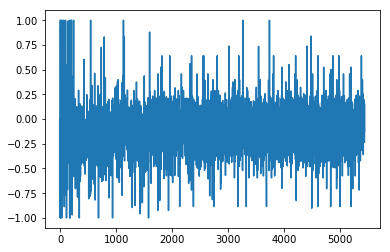

272
0.724527021455
[ 0.66666667  0.22222222  0.55555556  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  1.          0.77777778  0.66666667  0.11111111
  0.77777778  0.77777778  0.11111111  0.66666667  0.44444444  0.77777778
  0.          0.66666667  1.          0.77777778  0.77777778  0.11111111
  0.77777778  0.77777778  0.66666667  0.22222222  0.44444444  0.55555556
  0.66666667  0.66666667  0.22222222  0.77777778  0.55555556  0.
  0.22222222  0.22222222  0.77777778  0.77777778  0.55555556  0.77777778
  0.22222222  0.11111111  0.          0.22222222  0.66666667  0.66666667
  1.          0.66666667  0.66666667  0.33333333  0.          0.66666667
  0.66666667  0.66666667  0.77777778  0.33333333  0.66666667]
Writing away results
1977-09-01 00:00:00


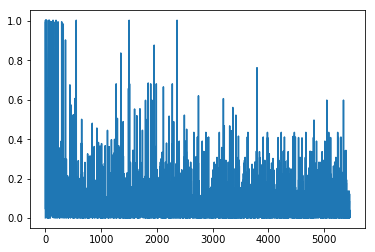

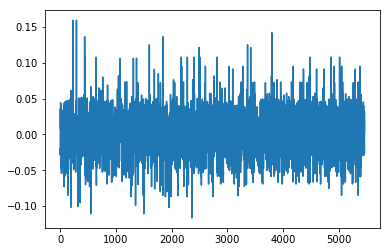

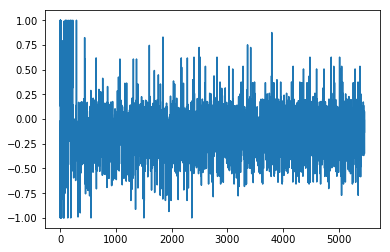

273
0.922469576001
[ 0.55555556  0.66666667  0.66666667  0.44444444  0.66666667  0.66666667
  0.66666667  0.77777778  0.33333333  0.66666667  0.22222222  0.22222222
  0.77777778  0.66666667  0.66666667  0.88888889  0.77777778  0.11111111
  0.66666667  1.          1.          0.          0.66666667  0.22222222
  0.77777778  0.66666667  0.22222222  0.88888889  0.77777778  0.11111111
  0.66666667  0.66666667  0.          0.88888889  0.11111111  0.66666667
  0.22222222  0.11111111  0.77777778  0.77777778  0.22222222  0.77777778
  0.77777778  0.11111111  0.11111111  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1977-10-01 00:00:00


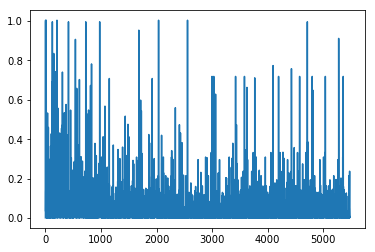

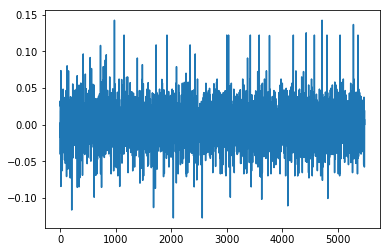

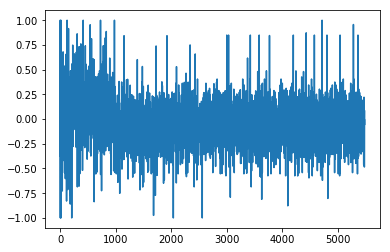

274
1.04940992184
[ 0.33333333  0.          0.          0.22222222  0.33333333  0.          1.
  0.33333333  0.22222222  0.33333333  0.66666667  0.44444444  0.22222222
  0.22222222  0.66666667  1.          0.77777778  0.22222222  0.33333333
  0.11111111  1.          0.33333333  0.44444444  0.11111111  0.22222222
  0.66666667  0.          1.          0.33333333  0.22222222  0.
  0.11111111  1.          0.33333333  0.66666667  0.44444444  0.66666667
  1.          0.33333333  0.44444444  0.44444444  0.66666667  0.77777778
  0.77777778  0.22222222  0.          0.22222222  0.22222222  0.33333333
  0.          0.77777778  0.33333333  0.          0.          0.55555556
  0.77777778  0.33333333  0.88888889  1.        ]
Writing away results
1977-11-01 00:00:00


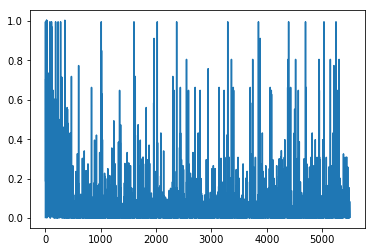

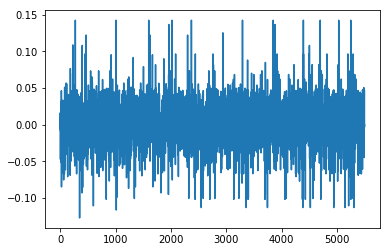

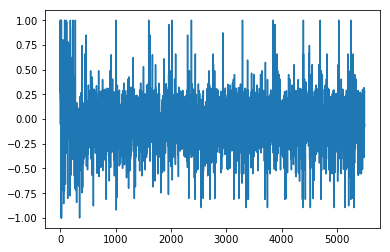

275
1.02998899678
[ 1.          0.77777778  0.88888889  0.88888889  0.11111111  1.          1.
  0.88888889  0.44444444  0.55555556  0.          0.77777778  0.77777778
  0.11111111  0.55555556  0.66666667  0.          0.22222222  0.55555556
  0.66666667  0.77777778  0.33333333  0.66666667  0.77777778  0.66666667
  0.11111111  0.          0.77777778  0.88888889  0.44444444  1.
  0.22222222  0.66666667  0.55555556  0.44444444  0.11111111  0.55555556
  0.44444444  0.77777778  0.66666667  0.66666667  0.22222222  0.66666667
  0.22222222  0.33333333  0.33333333  0.77777778  0.33333333  1.
  0.11111111  0.88888889  0.88888889  1.          1.          0.77777778
  0.88888889  0.88888889  0.22222222  1.        ]
Writing away results
1977-12-01 00:00:00


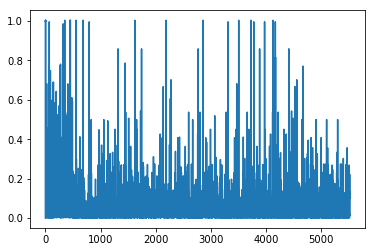

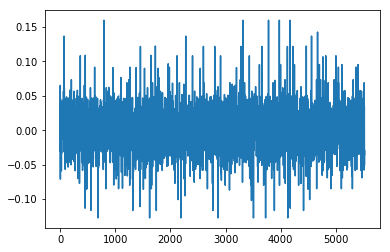

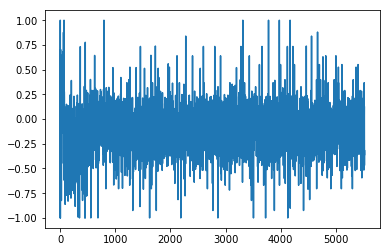

276
1.08884967301
[ 0.33333333  0.66666667  0.66666667  1.          0.11111111  0.55555556
  0.88888889  1.          0.11111111  0.11111111  0.33333333  0.44444444
  0.77777778  0.44444444  0.55555556  1.          0.88888889  0.77777778
  0.11111111  0.77777778  0.44444444  0.77777778  0.          0.77777778
  0.22222222  0.44444444  0.55555556  1.          1.          0.11111111
  0.44444444  0.55555556  0.22222222  0.22222222  0.77777778  0.44444444
  0.44444444  0.44444444  0.77777778  0.77777778  0.44444444  0.33333333
  0.          1.          0.66666667  0.33333333  0.66666667  0.66666667
  0.66666667  0.66666667  1.          0.66666667  0.33333333  0.44444444
  0.66666667  0.66666667  0.22222222  0.11111111  0.22222222]
Writing away results
1978-01-01 00:00:00


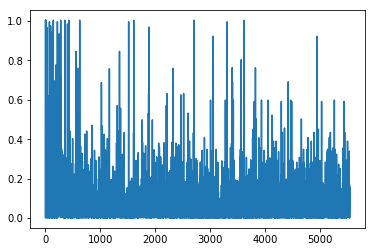

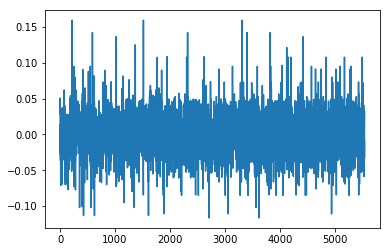

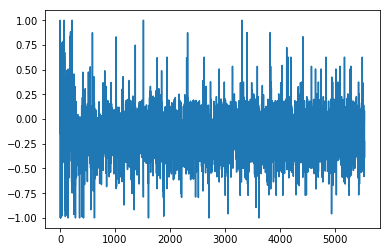

277
1.08292773729
[ 0.66666667  0.66666667  0.66666667  0.11111111  0.66666667  0.66666667
  0.          0.77777778  0.55555556  0.66666667  0.          0.77777778
  0.77777778  0.33333333  0.22222222  0.66666667  0.77777778  0.55555556
  0.22222222  0.          0.77777778  0.66666667  0.88888889  0.77777778
  0.55555556  0.66666667  0.66666667  0.          0.77777778  0.55555556
  0.22222222  0.77777778  0.55555556  0.77777778  0.55555556  0.55555556
  0.77777778  0.77777778  0.77777778  0.55555556  0.55555556  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.33333333  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  0.77777778  0.44444444  0.77777778]
Writing away results
1978-02-01 00:00:00


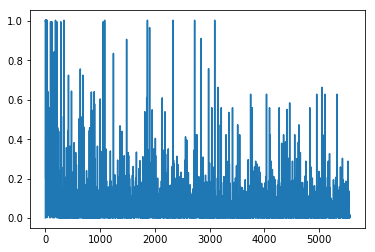

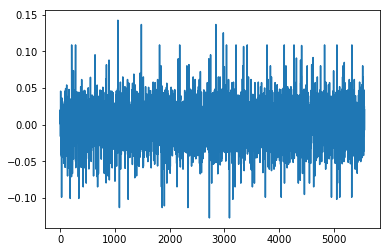

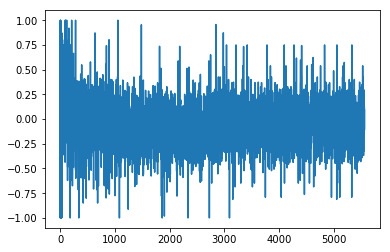

278
1.51598089061
[ 0.77777778  0.11111111  0.66666667  0.77777778  0.33333333  0.66666667
  0.66666667  0.44444444  0.33333333  0.22222222  0.55555556  0.88888889
  0.44444444  1.          0.66666667  0.77777778  0.44444444  1.
  0.66666667  0.88888889  0.11111111  0.66666667  0.55555556  0.66666667
  0.11111111  0.11111111  0.77777778  0.55555556  0.44444444  0.44444444
  0.88888889  0.66666667  0.66666667  0.44444444  0.55555556  0.88888889
  0.88888889  0.88888889  0.44444444  0.88888889  1.          0.66666667
  0.11111111  0.11111111  0.11111111  1.          0.33333333  0.
  0.11111111  0.77777778  0.77777778  0.33333333  0.33333333  0.77777778
  0.88888889  0.44444444  0.88888889  0.88888889  0.88888889]
Writing away results
1978-03-01 00:00:00


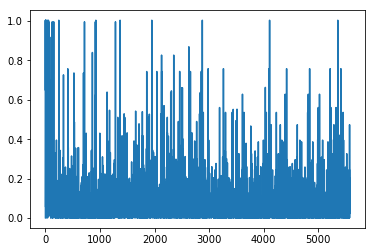

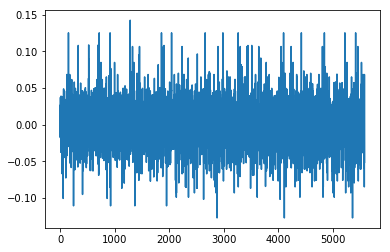

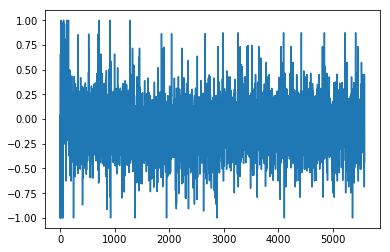

279
1.03192879921
[ 0.77777778  0.11111111  0.          0.77777778  0.44444444  1.          1.
  0.88888889  0.66666667  0.11111111  0.22222222  0.11111111  0.55555556
  0.11111111  1.          0.33333333  0.88888889  0.66666667  1.
  0.77777778  0.55555556  0.44444444  0.22222222  0.77777778  0.77777778
  0.44444444  0.33333333  0.22222222  0.88888889  0.66666667  0.44444444
  1.          0.55555556  0.88888889  0.          0.55555556  0.55555556
  0.11111111  0.55555556  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.44444444  0.11111111
  0.          0.11111111  1.          1.        ]
Writing away results
1978-04-01 00:00:00


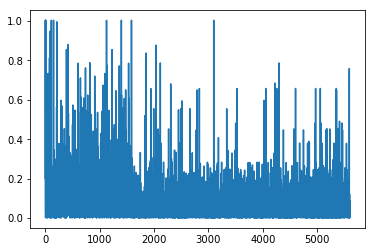

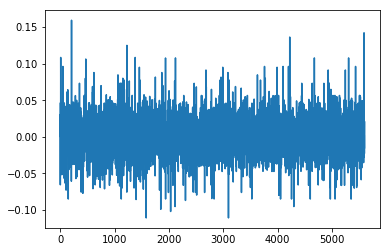

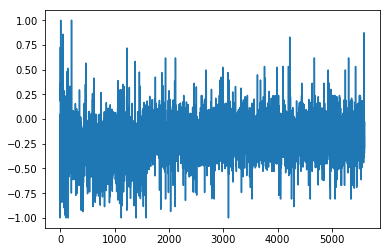

280
1.18643353755
[ 1.          0.66666667  0.44444444  0.77777778  0.77777778  0.22222222
  0.44444444  0.77777778  1.          0.11111111  0.33333333  0.77777778
  0.88888889  0.11111111  0.66666667  0.22222222  0.77777778  0.44444444
  0.44444444  0.77777778  1.          0.77777778  0.33333333  0.44444444
  0.55555556  1.          0.22222222  0.22222222  0.88888889  0.77777778
  0.11111111  0.77777778  0.22222222  0.44444444  0.77777778  1.          0.
  0.33333333  0.55555556  0.11111111  0.66666667  0.66666667  0.66666667
  0.22222222  0.22222222  0.88888889  0.66666667  0.66666667  0.66666667
  0.22222222  0.88888889  0.88888889  0.77777778  0.22222222  0.22222222
  0.22222222  0.77777778  0.77777778  0.77777778]
Writing away results
1978-05-01 00:00:00


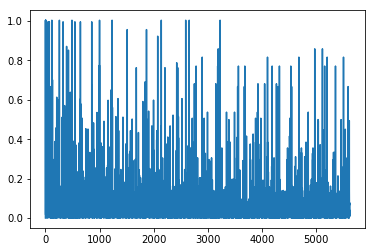

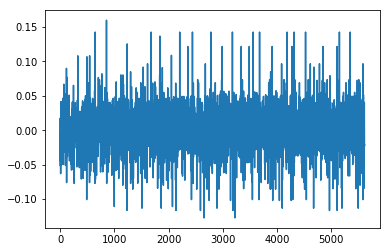

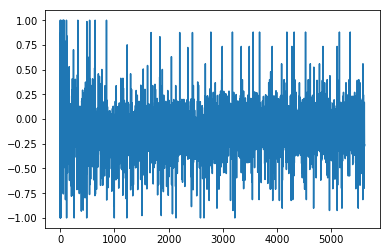

281
1.19464080374
[ 0.88888889  0.66666667  0.77777778  0.77777778  0.77777778  0.88888889
  0.22222222  0.55555556  0.44444444  0.77777778  0.22222222  0.66666667
  0.44444444  0.88888889  1.          0.11111111  0.77777778  0.
  0.55555556  0.77777778  0.11111111  0.88888889  0.66666667  0.55555556
  0.88888889  0.11111111  0.88888889  0.66666667  0.          0.77777778
  0.77777778  1.          0.55555556  0.77777778  0.44444444  0.
  0.44444444  0.66666667  0.11111111  0.88888889  0.66666667  0.22222222
  0.88888889  0.11111111  0.88888889  0.66666667  0.11111111  0.88888889
  0.66666667  0.22222222  0.88888889  0.44444444  0.77777778  0.33333333
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1978-06-01 00:00:00


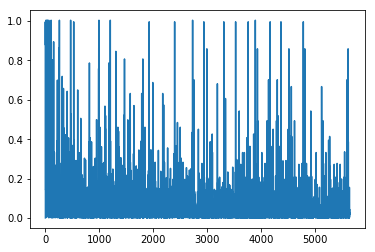

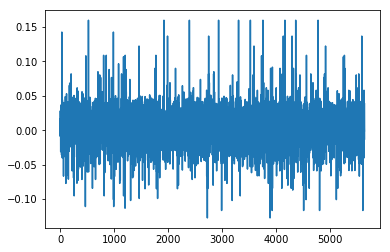

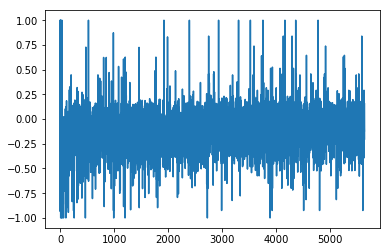

282
1.25797017506
[ 0.22222222  1.          0.66666667  0.66666667  0.55555556  0.77777778
  0.66666667  0.33333333  0.55555556  0.88888889  0.66666667  0.55555556
  0.66666667  0.88888889  0.          0.88888889  0.11111111  1.          0.
  0.33333333  0.22222222  0.22222222  0.44444444  0.66666667  0.33333333
  0.88888889  0.22222222  0.66666667  0.11111111  0.33333333  0.88888889
  0.88888889  0.66666667  0.66666667  0.11111111  0.55555556  0.11111111
  1.          0.11111111  0.22222222  0.          0.          0.11111111
  0.22222222  0.22222222  0.11111111  0.11111111  0.88888889  1.          0.
  0.44444444  0.66666667  0.77777778  0.66666667  0.44444444  0.66666667
  0.88888889  0.88888889  0.88888889]
Writing away results
1978-07-01 00:00:00


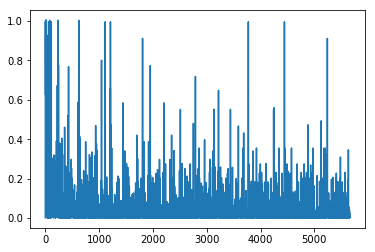

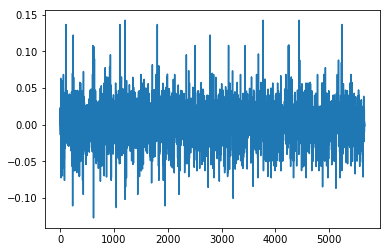

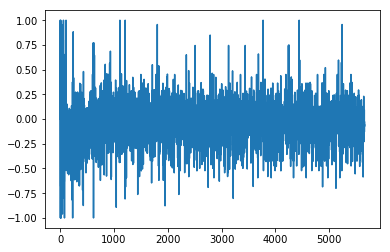

283
1.2864911481
[ 0.33333333  0.11111111  0.77777778  0.33333333  0.22222222  0.11111111
  0.44444444  0.55555556  0.33333333  0.11111111  0.          0.33333333
  0.33333333  1.          0.55555556  0.          0.33333333  0.77777778
  0.11111111  0.11111111  0.          0.33333333  0.77777778  0.
  0.55555556  1.          0.22222222  0.77777778  0.77777778  0.55555556
  0.22222222  0.55555556  0.44444444  0.77777778  0.55555556  0.11111111
  0.          0.          0.          0.33333333  0.77777778  0.
  0.33333333  0.          0.          0.          0.          0.33333333
  0.66666667  0.22222222  0.77777778  0.22222222  0.55555556  0.22222222
  0.22222222  0.55555556  0.55555556  0.55555556  0.55555556]
Writing away results
1978-08-01 00:00:00


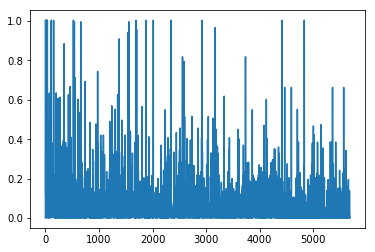

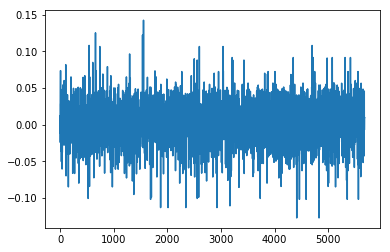

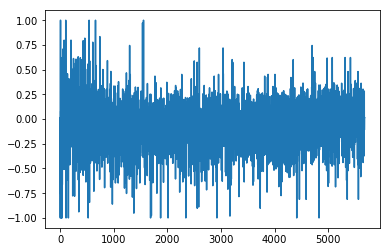

284
1.20670858491
[ 0.22222222  0.22222222  0.          0.          0.88888889  0.11111111
  1.          0.44444444  0.88888889  0.22222222  0.          0.22222222
  1.          0.22222222  0.88888889  0.          0.11111111  1.          1.
  0.          0.          0.22222222  1.          0.77777778  0.33333333
  0.77777778  0.22222222  0.55555556  0.          0.44444444  0.77777778
  0.11111111  0.88888889  0.44444444  0.          0.33333333  1.          0.
  0.          0.66666667  1.          0.          0.          0.88888889
  0.55555556  0.          0.          0.66666667  0.77777778  0.77777778
  0.22222222  0.77777778  0.22222222  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778]
Writing away results
1978-09-01 00:00:00


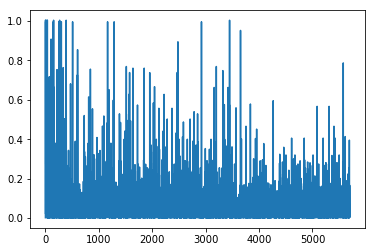

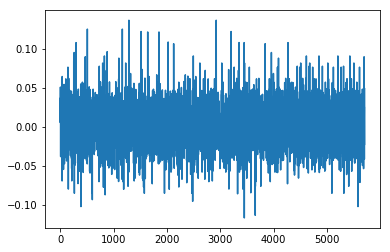

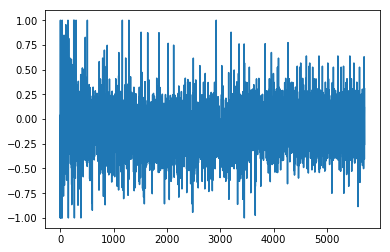

285
1.34596922735
[ 0.66666667  0.55555556  1.          1.          0.88888889  0.77777778
  0.66666667  0.33333333  0.66666667  0.77777778  0.66666667  1.
  0.88888889  0.77777778  0.          1.          0.66666667  0.77777778
  0.55555556  0.55555556  0.33333333  0.33333333  0.66666667  1.
  0.66666667  0.88888889  0.66666667  0.66666667  1.          0.
  0.11111111  1.          0.          0.33333333  0.55555556  0.22222222
  0.55555556  0.33333333  0.33333333  0.33333333  0.55555556  0.55555556
  0.55555556  0.33333333  0.55555556  0.55555556  0.55555556  1.
  0.66666667  0.66666667  1.          0.66666667  0.88888889  0.66666667
  1.          0.88888889  1.          0.66666667  0.88888889]
Writing away results
1978-10-01 00:00:00


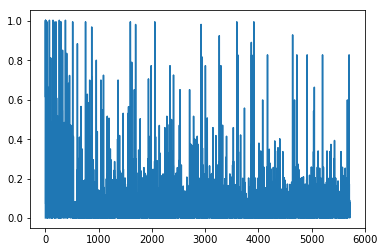

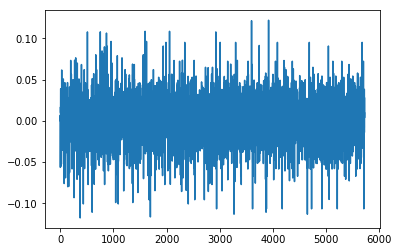

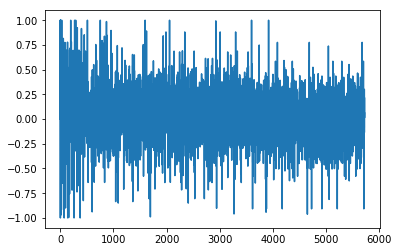

286
1.4715027224
[ 0.33333333  0.          0.55555556  0.77777778  0.77777778  1.          0.
  0.11111111  0.66666667  0.55555556  0.          0.77777778  0.77777778
  0.66666667  0.44444444  1.          0.22222222  0.33333333  0.
  0.55555556  0.22222222  0.77777778  0.77777778  0.          0.66666667
  0.88888889  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778
  0.22222222  0.55555556  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.11111111  0.33333333  0.33333333  0.33333333  0.22222222
  0.22222222  0.33333333  0.33333333  1.          0.88888889  0.66666667
  0.77777778  0.88888889  0.88888889  0.88888889  0.88888889  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1978-11-01 00:00:00


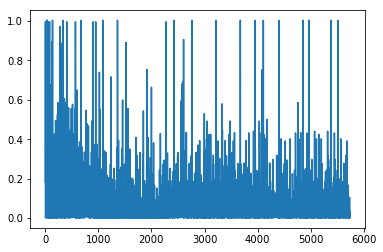

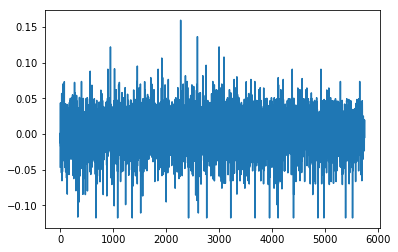

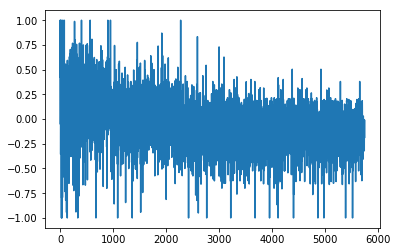

287
1.43152953247
[ 0.66666667  1.          0.77777778  0.88888889  0.22222222  0.33333333
  0.11111111  0.33333333  0.66666667  1.          0.77777778  0.88888889
  0.77777778  0.          1.          0.11111111  0.66666667  0.33333333
  0.55555556  0.22222222  0.66666667  0.66666667  1.          0.
  0.22222222  0.77777778  0.66666667  1.          0.77777778  0.88888889
  0.11111111  0.66666667  0.11111111  0.11111111  0.          0.55555556
  0.55555556  0.88888889  0.33333333  0.66666667  1.          0.55555556
  0.          0.44444444  0.66666667  0.22222222  1.          0.77777778
  0.22222222  1.          0.77777778  0.          1.          0.77777778
  0.22222222  0.77777778  0.77777778  0.          0.77777778]
Writing away results
1978-12-01 00:00:00


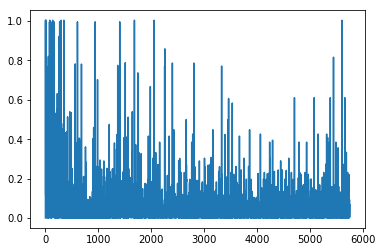

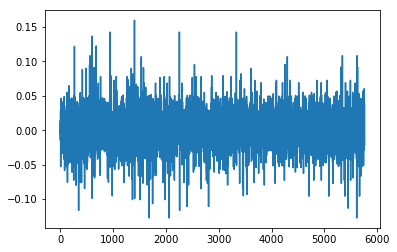

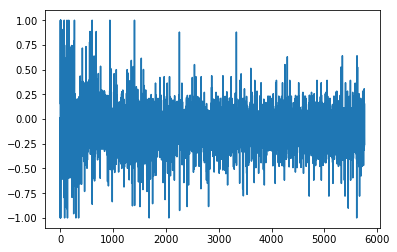

288
1.21210669614
[ 0.88888889  0.44444444  0.77777778  0.11111111  0.33333333  0.44444444
  0.66666667  0.          0.66666667  0.22222222  0.          0.88888889
  0.22222222  0.55555556  0.22222222  0.11111111  0.88888889  0.
  0.55555556  0.11111111  0.88888889  0.88888889  0.77777778  0.44444444
  0.77777778  0.22222222  0.77777778  0.44444444  0.77777778  0.
  0.11111111  1.          0.66666667  0.66666667  0.66666667  0.22222222
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.33333333  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.22222222]
Writing away results
1979-01-01 00:00:00


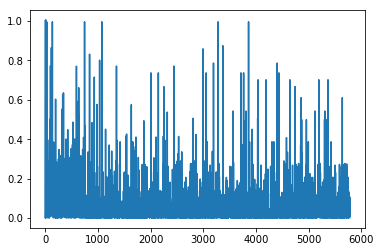

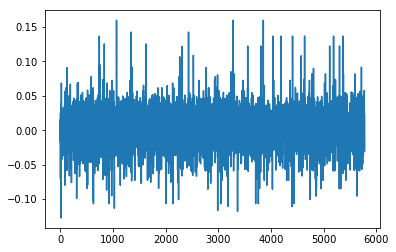

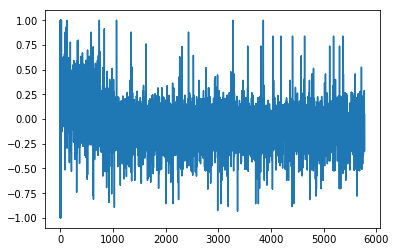

289
1.30289280685
[ 0.88888889  1.          0.55555556  0.          0.88888889  0.33333333
  0.22222222  0.55555556  0.44444444  0.11111111  0.11111111  0.88888889
  0.88888889  0.66666667  0.11111111  0.          0.22222222  1.          1.
  0.88888889  0.          0.44444444  0.88888889  0.55555556  0.77777778
  0.77777778  0.88888889  0.77777778  1.          1.          0.22222222
  0.66666667  0.22222222  0.33333333  0.66666667  1.          0.66666667
  0.22222222  0.66666667  0.66666667  1.          0.66666667  0.66666667
  0.88888889  0.44444444  0.88888889  0.88888889  0.88888889  0.44444444
  0.88888889  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1979-02-01 00:00:00


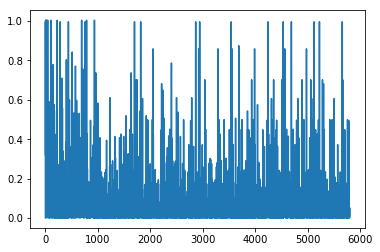

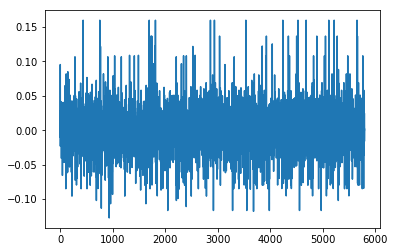

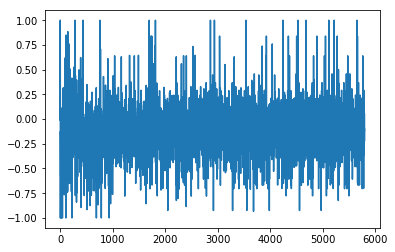

290
1.21703216032
[ 1.          0.33333333  0.11111111  0.66666667  0.11111111  0.33333333
  0.          0.88888889  0.77777778  0.88888889  0.77777778  0.66666667
  0.11111111  1.          0.77777778  0.55555556  0.55555556  0.88888889
  0.22222222  0.66666667  0.66666667  0.66666667  0.66666667  0.44444444
  0.44444444  0.66666667  0.44444444  0.88888889  0.77777778  0.33333333
  1.          1.          0.77777778  0.77777778  1.          1.          1.
  1.          1.          0.77777778  1.          1.          0.66666667
  0.66666667  0.66666667  0.22222222  0.44444444  0.66666667  0.66666667
  0.66666667  0.88888889  0.44444444  0.88888889  0.44444444  0.66666667
  0.66666667  0.44444444  0.88888889  0.44444444]
Writing away results
1979-03-01 00:00:00


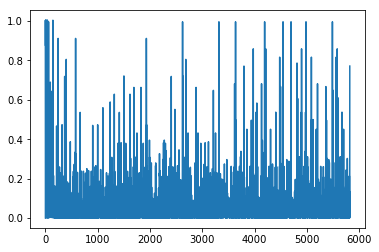

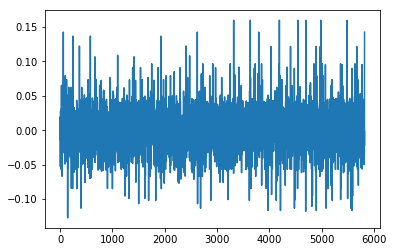

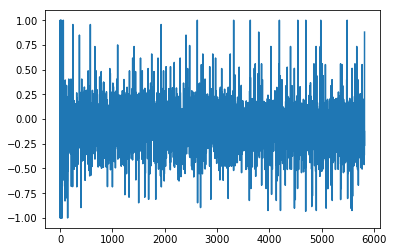

291
1.04783581256
[ 0.22222222  0.22222222  0.22222222  0.44444444  0.88888889  1.
  0.77777778  0.          0.33333333  0.22222222  0.66666667  0.88888889
  0.22222222  1.          0.22222222  0.55555556  0.88888889  0.22222222
  0.66666667  0.77777778  0.11111111  0.11111111  0.11111111  0.33333333
  0.66666667  0.44444444  0.11111111  0.          0.88888889  0.55555556
  0.          1.          0.88888889  0.          0.88888889  0.22222222
  1.          0.88888889  0.88888889  0.88888889  0.22222222  0.66666667
  0.88888889  0.11111111  0.77777778  0.11111111  0.33333333  0.77777778
  0.33333333  0.33333333  0.77777778  0.77777778  0.77777778  0.77777778
  0.33333333  0.77777778  0.33333333  0.77777778  0.44444444]
Writing away results
1979-04-01 00:00:00


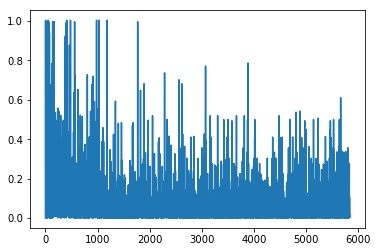

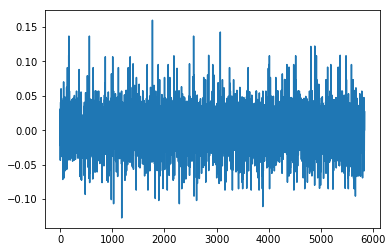

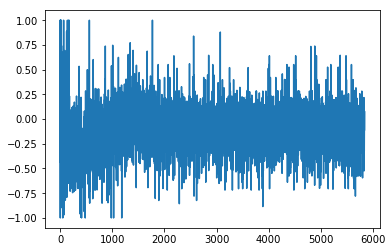

292
1.19734296087
[ 0.66666667  0.44444444  0.44444444  0.55555556  0.55555556  0.88888889
  1.          0.77777778  0.55555556  0.77777778  0.          0.66666667
  0.33333333  0.44444444  0.77777778  0.          1.          0.77777778
  0.44444444  0.77777778  0.77777778  1.          0.11111111  0.77777778
  0.33333333  0.11111111  0.55555556  0.66666667  0.66666667  0.66666667
  0.66666667  0.55555556  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.55555556  0.66666667  1.          0.77777778  0.44444444
  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.66666667]
Writing away results
1979-05-01 00:00:00


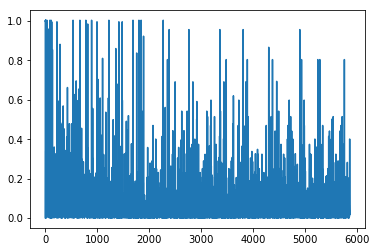

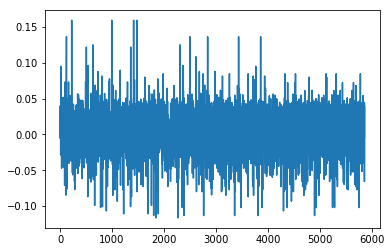

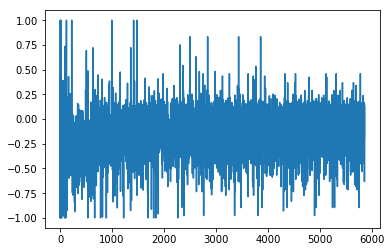

293
1.17398978538
[ 1.          0.44444444  0.88888889  0.88888889  0.44444444  0.44444444
  0.66666667  0.33333333  1.          0.44444444  0.44444444  0.66666667
  0.33333333  0.88888889  0.88888889  0.77777778  1.          0.
  0.33333333  0.33333333  0.11111111  0.11111111  0.88888889  0.55555556
  0.          0.44444444  1.          0.44444444  0.33333333  0.11111111
  0.55555556  0.88888889  0.44444444  0.77777778  1.          0.33333333
  0.88888889  0.66666667  0.77777778  1.          1.          0.22222222
  0.88888889  0.22222222  0.77777778  0.66666667  0.66666667  0.66666667
  0.11111111  1.          0.          0.66666667  0.66666667  0.55555556
  0.11111111  0.77777778  1.          0.          0.22222222]
Writing away results
1979-06-01 00:00:00


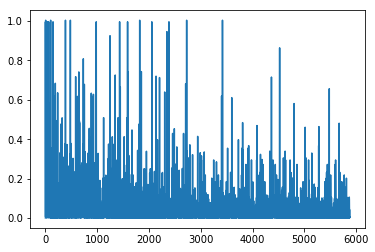

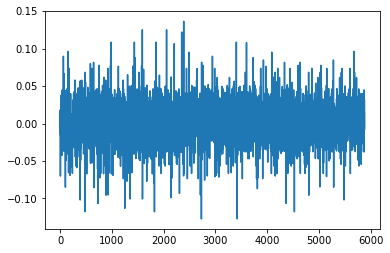

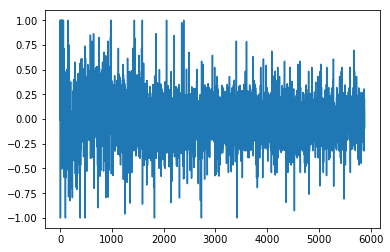

294
1.23168224385
[ 0.22222222  0.88888889  0.44444444  0.55555556  0.22222222  0.22222222
  0.77777778  0.66666667  0.22222222  0.22222222  0.44444444  0.77777778
  0.66666667  0.88888889  1.          0.55555556  0.55555556  0.66666667
  0.66666667  0.55555556  0.          0.55555556  0.66666667  0.33333333
  0.22222222  0.88888889  0.44444444  0.22222222  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.22222222
  0.44444444  1.          0.55555556  0.66666667  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.33333333  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.33333333  0.          0.33333333
  0.          0.33333333  0.11111111  0.44444444  0.44444444]
Writing away results
1979-07-01 00:00:00


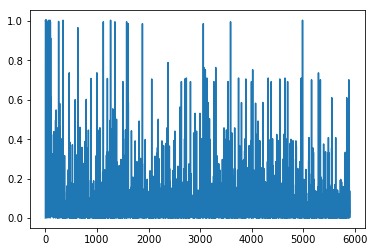

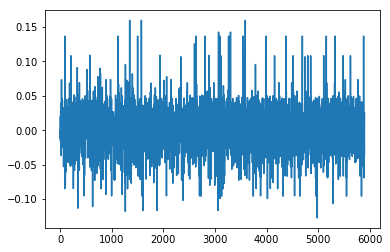

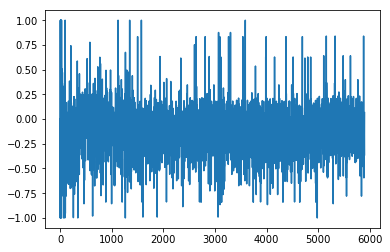

295
0.995036387308
[ 0.22222222  0.66666667  0.77777778  0.11111111  0.66666667  0.33333333
  0.55555556  0.88888889  0.66666667  0.66666667  0.77777778  0.22222222
  0.          0.          0.88888889  0.77777778  0.77777778  0.88888889
  0.44444444  0.55555556  0.11111111  0.77777778  1.          0.66666667
  0.          0.33333333  1.          0.66666667  0.44444444  0.          0.
  0.66666667  0.44444444  0.77777778  0.44444444  0.66666667  0.66666667
  0.77777778  0.77777778  0.          0.77777778  0.88888889  0.77777778
  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778
  0.77777778  0.44444444  0.77777778  0.55555556  0.33333333  0.
  0.77777778  1.          0.66666667  1.        ]
Writing away results
1979-08-01 00:00:00


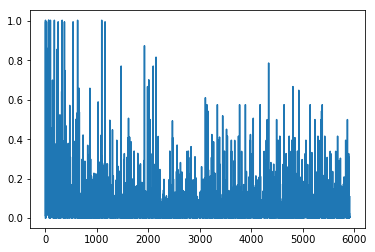

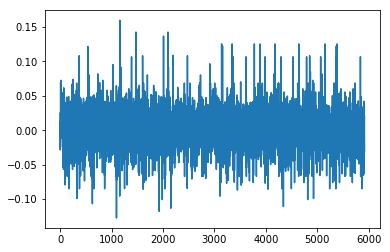

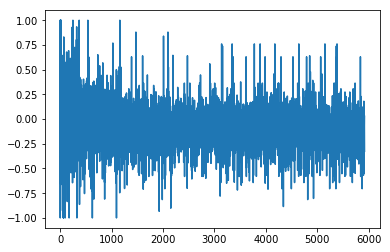

296
0.867168879417
[ 1.          0.44444444  0.22222222  0.88888889  0.55555556  0.
  0.44444444  0.22222222  0.66666667  0.          0.          0.
  0.22222222  0.44444444  0.          0.          0.66666667  0.33333333
  0.44444444  0.66666667  0.55555556  0.          0.55555556  0.77777778
  0.22222222  0.77777778  0.77777778  0.77777778  0.77777778  0.22222222
  0.22222222  0.77777778  0.77777778  0.          0.22222222  0.22222222
  0.66666667  1.          0.          1.          0.44444444  0.44444444
  0.          0.66666667  0.33333333  0.44444444  0.44444444  0.44444444
  0.66666667  0.55555556  0.          0.55555556  0.44444444  0.55555556
  0.44444444  0.77777778  0.22222222  0.77777778  0.77777778]
Writing away results
1979-09-01 00:00:00


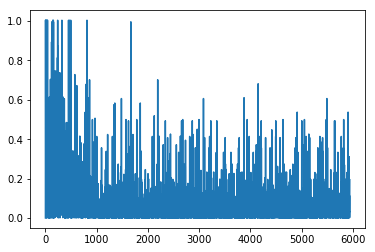

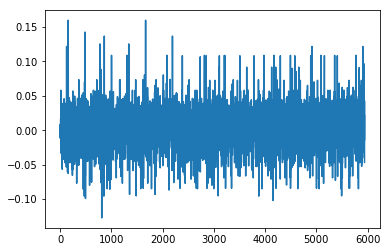

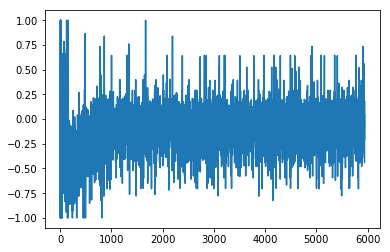

297
1.10198270528
[ 0.11111111  0.33333333  0.77777778  0.11111111  1.          0.22222222
  0.33333333  1.          1.          0.11111111  0.88888889  0.22222222
  0.77777778  0.44444444  0.22222222  0.11111111  0.44444444  0.
  0.33333333  0.44444444  0.22222222  0.33333333  0.77777778  0.33333333
  0.66666667  0.66666667  0.44444444  0.22222222  0.88888889  0.33333333
  0.66666667  1.          0.22222222  0.88888889  0.77777778  1.
  0.55555556  0.22222222  0.88888889  0.88888889  0.44444444  0.55555556
  0.55555556  1.          0.55555556  0.88888889  0.77777778  0.33333333
  1.          0.33333333  1.          0.33333333  0.33333333  0.77777778
  0.33333333  0.66666667  0.22222222  1.          0.66666667]
Writing away results
1979-10-01 00:00:00


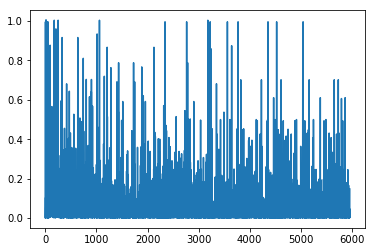

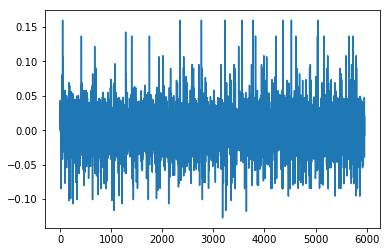

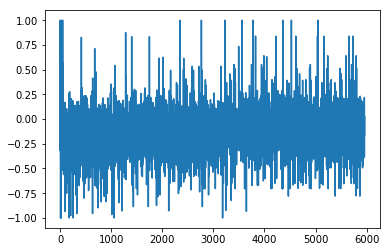

298
1.29690258916
[ 0.33333333  1.          0.55555556  0.55555556  0.33333333  1.
  0.55555556  0.11111111  0.77777778  0.88888889  0.88888889  0.77777778
  0.55555556  0.11111111  0.77777778  0.88888889  0.77777778  0.55555556
  0.55555556  0.33333333  0.          0.66666667  0.55555556  1.
  0.66666667  0.55555556  0.66666667  1.          0.          0.66666667
  0.66666667  0.66666667  0.66666667  0.          0.22222222  0.77777778
  0.77777778  0.88888889  0.77777778  0.44444444  0.88888889  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.
  0.66666667  0.66666667  0.66666667  1.          0.22222222]
Writing away results
1979-11-01 00:00:00


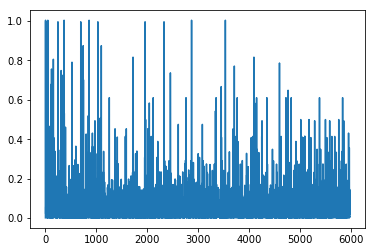

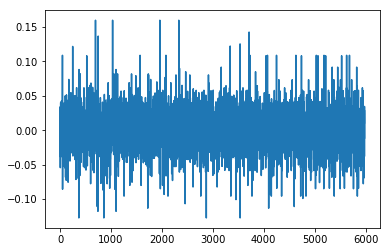

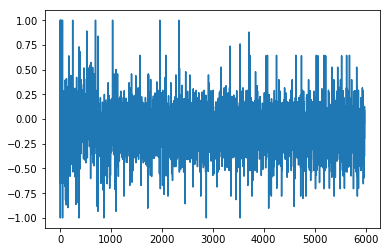

299
0.967697680303
[ 0.55555556  0.          0.55555556  0.66666667  0.11111111  0.55555556
  0.          0.          0.33333333  0.77777778  0.55555556  0.
  0.33333333  0.77777778  0.77777778  0.33333333  0.55555556  0.
  0.11111111  0.55555556  0.11111111  0.66666667  0.11111111  0.66666667
  0.66666667  0.          0.66666667  0.66666667  0.66666667  0.66666667
  0.11111111  0.66666667  0.66666667  0.          0.          0.88888889
  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778
  0.77777778  0.88888889  0.77777778  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.55555556  0.11111111  0.66666667  0.11111111
  0.66666667  0.66666667  0.11111111  0.          0.66666667]
Writing away results
1979-12-01 00:00:00


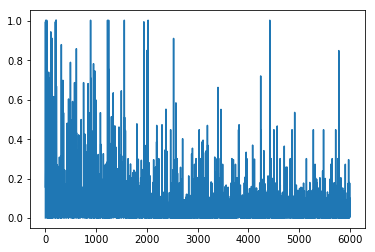

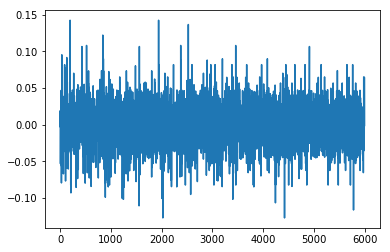

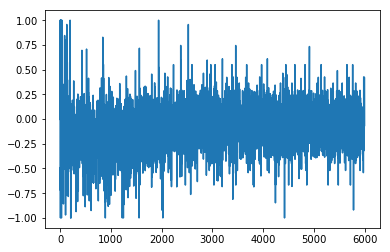

300
1.33044985663
[ 0.55555556  0.44444444  0.33333333  0.          0.55555556  0.55555556
  0.33333333  0.33333333  0.66666667  0.66666667  0.77777778  0.44444444
  0.55555556  0.66666667  0.66666667  0.66666667  0.33333333  0.33333333
  0.          0.22222222  0.          0.          0.          0.55555556
  0.22222222  0.          0.          0.          0.11111111  0.22222222
  0.          0.          0.77777778  0.55555556  0.44444444  0.44444444
  0.66666667  1.          0.44444444  0.44444444  0.44444444  0.66666667
  0.66666667  0.66666667  0.66666667  1.          0.66666667  0.66666667
  0.66666667  0.66666667  0.77777778  0.          0.22222222  0.          0.
  0.22222222  0.55555556  0.55555556  0.        ]
Writing away results
1980-01-01 00:00:00


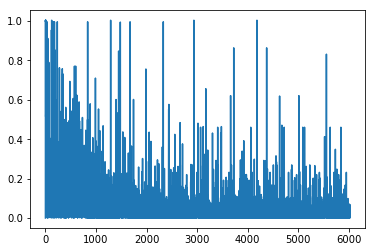

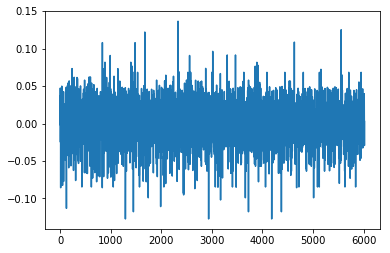

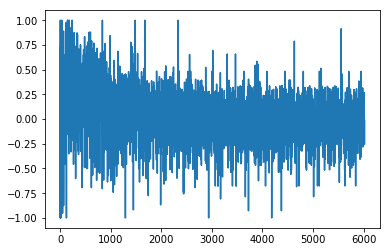

301
1.09792424674
[ 0.44444444  0.33333333  1.          0.44444444  0.11111111  0.44444444
  0.88888889  0.88888889  0.          0.88888889  1.          1.
  0.11111111  0.11111111  0.66666667  0.44444444  0.55555556  0.55555556
  0.22222222  0.33333333  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.33333333  0.11111111  0.          0.66666667  0.11111111  0.11111111
  0.11111111  0.11111111  0.66666667  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.44444444  0.11111111
  0.44444444  0.11111111  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.66666667  0.11111111]
Writing away results
1980-02-01 00:00:00


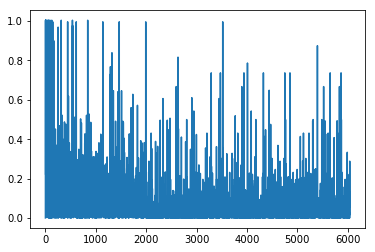

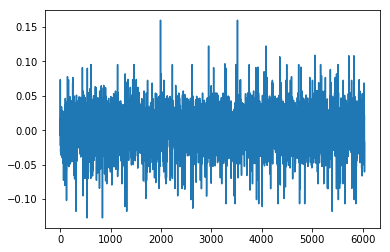

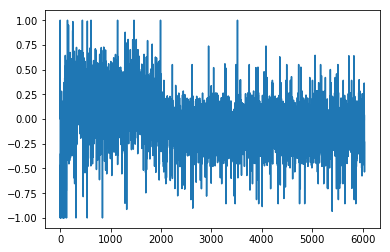

302
1.32333639431
[ 0.11111111  1.          0.44444444  0.88888889  0.55555556  0.11111111
  1.          0.77777778  0.88888889  0.88888889  0.55555556  0.77777778
  0.77777778  0.77777778  0.22222222  0.55555556  0.66666667  0.66666667
  0.22222222  0.66666667  0.66666667  0.66666667  0.22222222  0.22222222
  0.66666667  0.66666667  0.66666667  0.55555556  0.66666667  0.22222222
  0.88888889  0.88888889  0.55555556  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.22222222  0.66666667  0.44444444  0.66666667  0.66666667  0.66666667
  0.66666667  0.22222222  0.55555556  0.77777778  0.        ]
Writing away results
1980-03-01 00:00:00


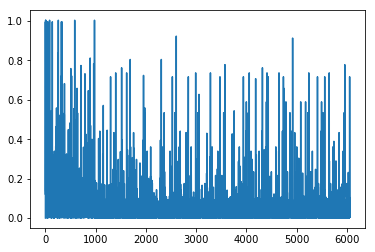

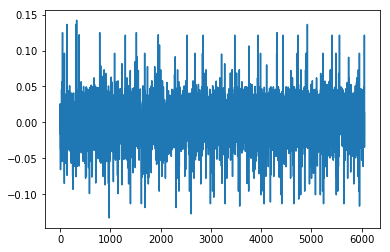

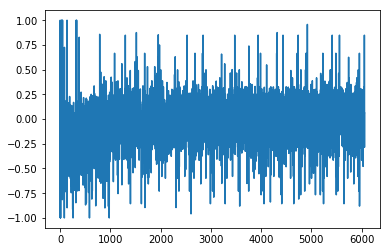

303
1.45420658397
[ 0.88888889  0.66666667  1.          0.66666667  0.77777778  0.33333333
  0.33333333  0.55555556  0.77777778  0.77777778  0.77777778  0.33333333
  0.33333333  0.11111111  0.55555556  0.11111111  0.88888889  0.11111111
  0.11111111  0.11111111  0.88888889  0.11111111  0.88888889  0.11111111
  0.11111111  0.88888889  0.88888889  0.88888889  0.88888889  0.33333333
  1.          0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.33333333  0.33333333  0.33333333  0.55555556
  0.11111111  0.88888889  0.11111111  0.11111111  0.88888889  0.66666667
  0.88888889  0.22222222  0.77777778  0.22222222  0.77777778]
Writing away results
1980-04-01 00:00:00


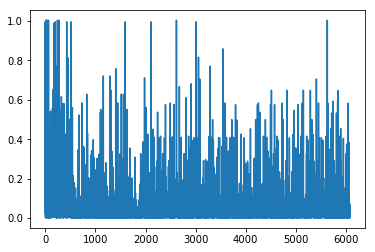

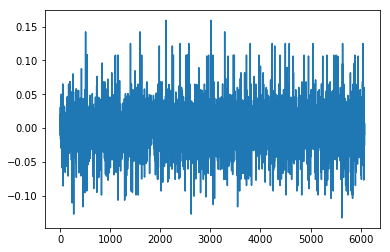

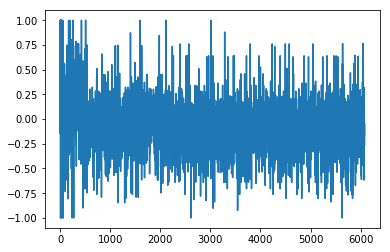

304
1.12519510255
[ 1.          0.77777778  0.44444444  0.11111111  0.22222222  0.66666667
  0.66666667  0.66666667  0.          0.55555556  0.11111111  0.66666667
  0.          0.66666667  0.66666667  0.55555556  0.77777778  0.77777778
  0.77777778  0.77777778  0.55555556  1.          0.77777778  0.77777778
  0.77777778  0.77777778  0.55555556  0.88888889  0.11111111  0.
  0.11111111  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.11111111  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.          0.11111111  0.66666667  0.66666667  0.66666667  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.          0.
  1.          0.33333333  0.11111111  0.44444444]
Writing away results
1980-05-01 00:00:00


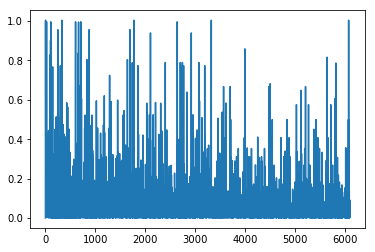

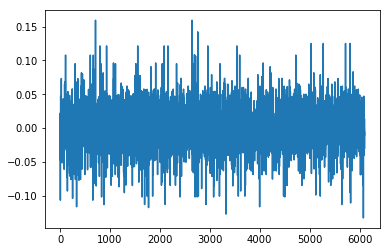

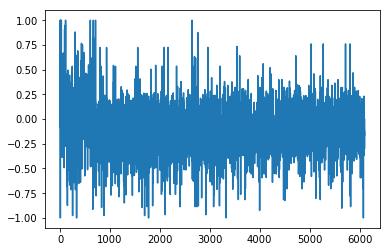

305
1.13736150636
[ 0.11111111  0.          1.          0.33333333  0.55555556  0.11111111
  1.          0.88888889  0.          0.55555556  0.11111111  0.          0.
  0.77777778  0.77777778  0.44444444  0.77777778  0.77777778  0.77777778
  0.44444444  0.44444444  0.77777778  0.77777778  0.33333333  0.88888889
  0.44444444  0.22222222  0.22222222  0.33333333  1.          0.33333333
  1.          1.          0.11111111  1.          1.          1.
  0.55555556  1.          0.          0.55555556  0.          0.
  0.55555556  0.          0.22222222  0.77777778  0.88888889  0.88888889
  0.22222222  0.77777778  0.44444444  0.33333333  0.          0.33333333
  0.11111111  1.          1.          1.        ]
Writing away results
1980-06-01 00:00:00


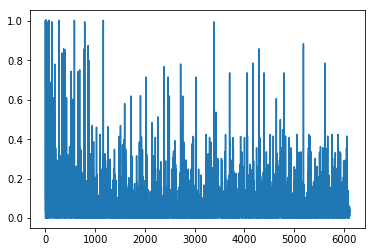

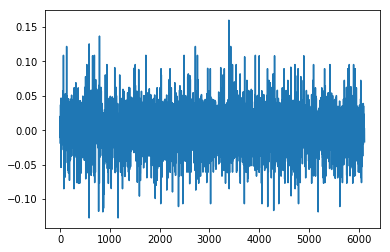

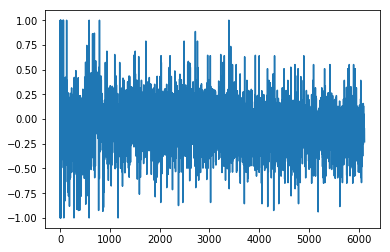

306
1.27407464367
[ 0.88888889  0.77777778  0.55555556  1.          0.          0.33333333
  0.22222222  0.88888889  0.88888889  1.          1.          0.77777778
  0.          0.66666667  0.11111111  0.88888889  0.44444444  0.44444444
  0.11111111  0.77777778  0.44444444  0.66666667  0.33333333  0.11111111
  0.11111111  0.44444444  1.          0.44444444  0.33333333  0.55555556
  0.55555556  0.22222222  0.55555556  0.88888889  0.77777778  0.88888889
  0.77777778  0.          0.88888889  0.88888889  0.88888889  0.77777778
  0.          0.88888889  0.66666667  0.33333333  0.44444444  0.11111111
  0.77777778  0.44444444  0.33333333  0.66666667  0.55555556  0.44444444
  0.33333333  1.          0.33333333  0.77777778  0.        ]
Writing away results
1980-07-01 00:00:00


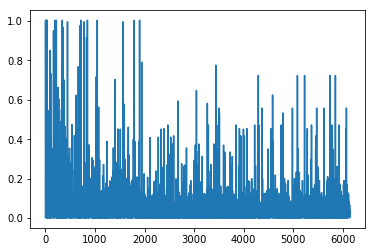

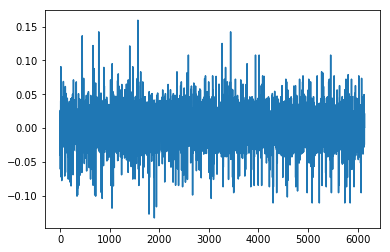

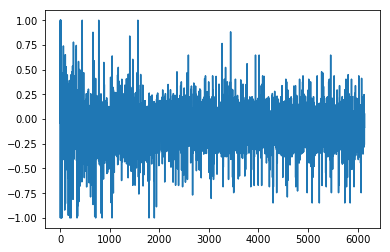

307
1.31208907737
[ 0.11111111  0.66666667  0.77777778  0.77777778  0.44444444  0.11111111
  0.66666667  0.77777778  0.77777778  0.77777778  0.55555556  0.66666667
  0.33333333  0.33333333  0.33333333  0.          0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.77777778  0.77777778  0.44444444  0.44444444  0.44444444
  0.77777778  0.77777778  0.44444444  0.44444444  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.55555556  0.77777778  0.55555556
  0.77777778  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.          0.11111111  0.55555556  0.44444444  0.44444444
  0.77777778  0.55555556  0.77777778  0.77777778  0.77777778]
Writing away results
1980-08-01 00:00:00


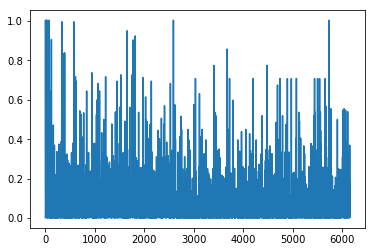

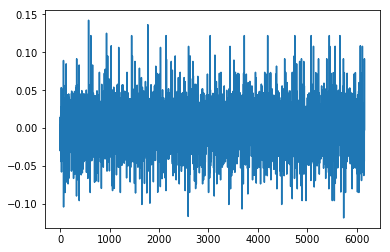

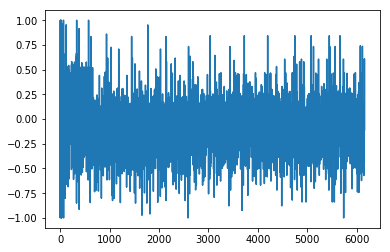

308
1.16649948074
[ 0.88888889  1.          0.22222222  0.55555556  0.88888889  0.77777778
  0.77777778  0.33333333  1.          0.55555556  0.88888889  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.88888889  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.11111111  0.44444444
  0.77777778  0.55555556  0.55555556  0.88888889  0.33333333  0.77777778
  0.33333333  0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  0.77777778  0.33333333  0.77777778  0.33333333  0.77777778
  1.          0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.          0.22222222  0.44444444  0.55555556  0.33333333  0.77777778
  0.55555556  0.88888889  0.77777778  0.77777778  0.77777778]
Writing away results
1980-09-01 00:00:00


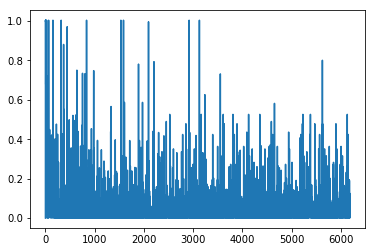

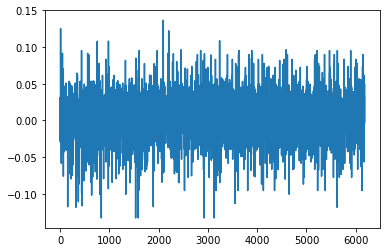

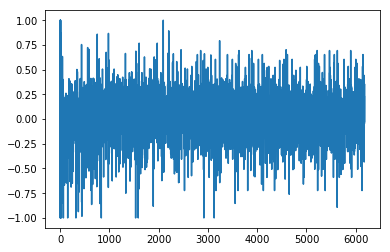

309
1.2550804645
[ 0.88888889  0.66666667  0.88888889  0.77777778  0.          0.77777778
  0.77777778  0.55555556  0.77777778  0.11111111  0.22222222  0.44444444
  0.22222222  0.44444444  1.          0.44444444  0.44444444  0.22222222
  0.22222222  0.44444444  0.11111111  0.44444444  1.          0.66666667
  0.44444444  0.66666667  0.77777778  0.77777778  0.77777778  0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.22222222
  0.11111111  0.22222222  0.22222222  0.44444444  1.          0.44444444
  0.44444444  0.66666667  0.44444444  0.          0.33333333  0.77777778
  0.77777778  0.77777778  0.33333333  0.77777778  0.77777778]
Writing away results
1980-10-01 00:00:00


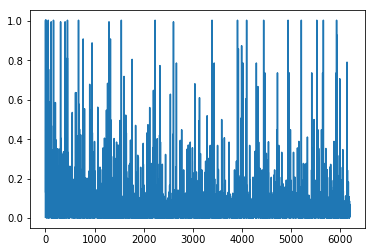

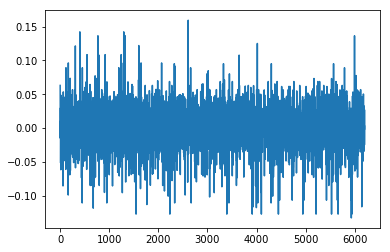

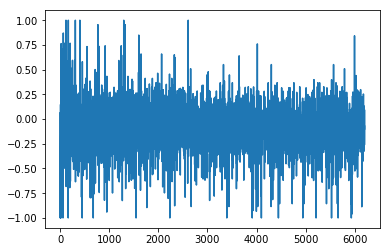

310
1.14884327103
[ 0.55555556  0.77777778  0.88888889  0.11111111  0.44444444  0.
  0.88888889  0.44444444  0.66666667  1.          0.33333333  0.          0.
  0.          1.          0.33333333  1.          0.33333333  0.33333333
  1.          1.          0.33333333  0.22222222  0.77777778  0.22222222
  0.11111111  0.11111111  0.77777778  0.77777778  0.77777778  0.77777778
  0.11111111  0.44444444  0.55555556  0.77777778  0.77777778  0.88888889
  0.44444444  0.44444444  0.11111111  0.44444444  0.33333333  1.
  0.33333333  0.33333333  1.          0.33333333  0.44444444  0.22222222
  0.11111111  0.22222222  0.77777778  0.77777778  0.11111111  0.44444444
  0.77777778  0.44444444  0.44444444  0.11111111]
Writing away results
1980-11-01 00:00:00


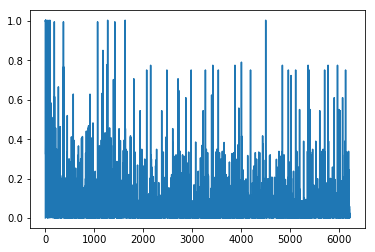

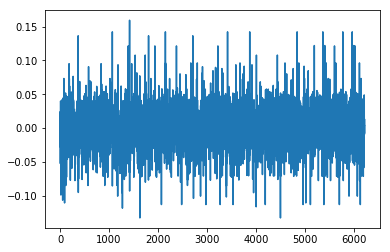

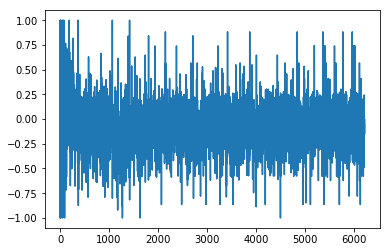

311
1.24825125261
[ 0.44444444  1.          1.          0.77777778  1.          0.55555556
  0.22222222  0.88888889  0.33333333  0.          0.          0.66666667
  0.88888889  0.33333333  0.77777778  0.66666667  0.66666667  0.55555556
  0.11111111  0.88888889  0.88888889  0.33333333  0.77777778  0.55555556
  0.77777778  0.22222222  0.77777778  0.77777778  0.11111111  0.77777778
  1.          0.77777778  0.77777778  1.          0.77777778  1.
  0.77777778  0.77777778  1.          0.77777778  0.33333333  0.          0.
  0.88888889  0.88888889  0.33333333  0.77777778  0.11111111  0.77777778
  0.55555556  0.77777778  0.44444444  1.          0.77777778  0.22222222
  0.77777778  0.11111111  0.77777778  1.        ]
Writing away results
1980-12-01 00:00:00


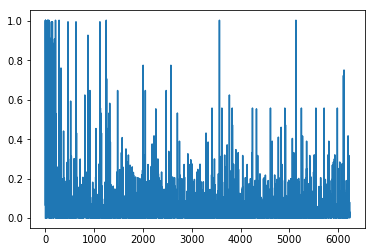

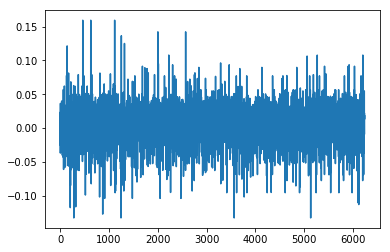

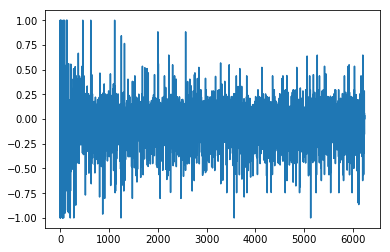

312
1.36877814069
[ 0.          0.          0.55555556  0.77777778  0.88888889  0.11111111
  0.88888889  0.22222222  0.33333333  0.66666667  0.66666667  0.22222222
  0.33333333  0.11111111  0.22222222  0.66666667  0.66666667  0.66666667
  0.66666667  0.33333333  0.55555556  0.77777778  1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.55555556  0.44444444  0.55555556  0.77777778  0.
  0.55555556  0.55555556  0.55555556  0.11111111  0.66666667  0.66666667
  0.66666667  0.22222222  0.22222222  0.77777778  0.33333333  0.88888889
  0.77777778  1.          0.77777778  0.          0.55555556  0.55555556
  0.77777778  0.77777778  0.77777778  0.77777778  0.55555556]
Writing away results
1981-01-01 00:00:00


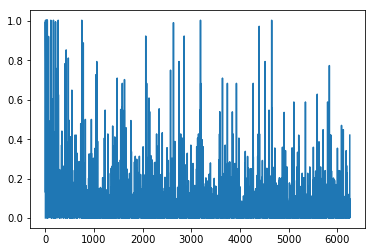

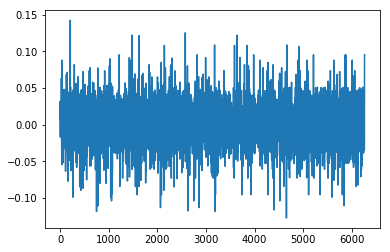

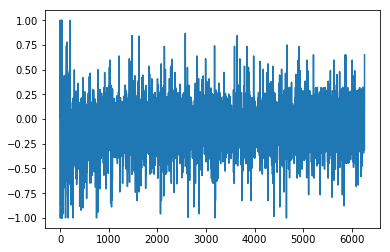

313
1.47121349427
[ 0.33333333  0.55555556  0.33333333  0.33333333  0.66666667  0.66666667
  0.44444444  0.          0.44444444  0.44444444  0.          0.          0.
  0.44444444  0.44444444  0.          0.          0.          0.44444444
  0.33333333  0.55555556  0.22222222  0.22222222  0.77777778  0.11111111
  0.77777778  0.77777778  0.11111111  0.22222222  0.77777778  0.55555556
  0.77777778  0.33333333  0.77777778  0.88888889  0.22222222  0.88888889
  0.55555556  0.88888889  0.          0.          0.44444444  0.
  0.88888889  0.          0.88888889  0.22222222  0.77777778  1.
  0.55555556  0.22222222  0.11111111  0.33333333  0.55555556  0.77777778
  0.22222222  0.77777778  0.33333333  0.55555556]
Writing away results
1981-02-01 00:00:00


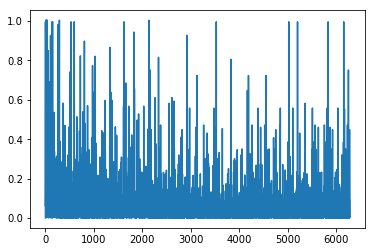

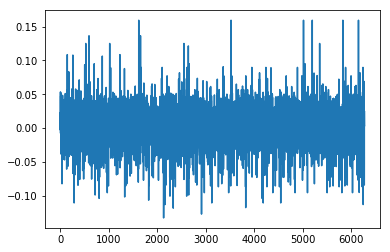

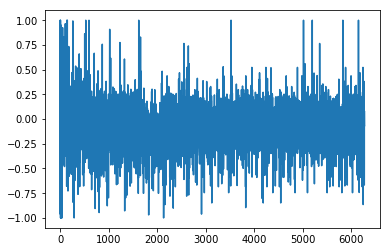

314
1.26575359237
[ 0.77777778  0.88888889  0.11111111  0.22222222  0.          0.33333333
  0.88888889  0.88888889  1.          1.          0.          0.44444444
  0.          0.66666667  0.66666667  1.          0.44444444  1.
  0.77777778  0.33333333  0.55555556  0.55555556  0.55555556  0.77777778
  0.77777778  0.77777778  0.55555556  0.77777778  0.22222222  0.77777778
  0.77777778  0.77777778  0.11111111  0.77777778  0.33333333  0.77777778
  0.33333333  1.          0.66666667  0.          1.          0.33333333
  1.          0.33333333  0.55555556  0.66666667  0.33333333  0.77777778
  0.55555556  0.77777778  0.55555556  0.77777778  0.77777778  0.55555556
  0.77777778  0.22222222  0.77777778  0.77777778  0.77777778]
Writing away results
1981-03-01 00:00:00


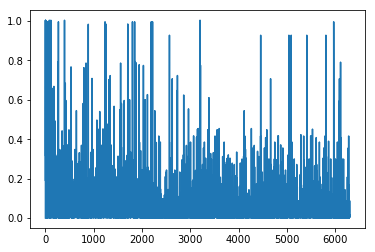

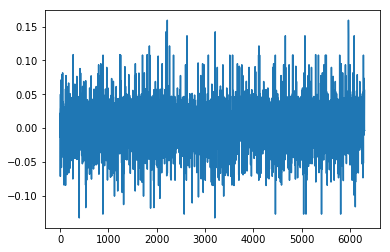

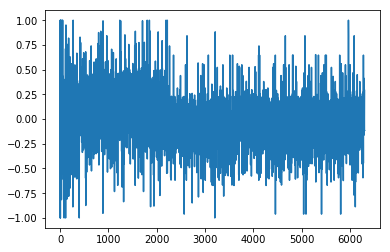

315
1.3940217492
[ 0.44444444  0.77777778  0.44444444  0.44444444  0.22222222  1.
  0.66666667  1.          0.66666667  0.33333333  1.          1.          1.
  1.          0.66666667  0.33333333  1.          0.44444444  0.88888889
  0.11111111  0.88888889  0.88888889  0.88888889  0.44444444  0.88888889
  0.44444444  0.88888889  0.44444444  0.88888889  0.44444444  0.88888889
  0.44444444  0.44444444  0.22222222  0.44444444  0.22222222  1.
  0.55555556  0.66666667  1.          1.          0.44444444  0.77777778
  0.33333333  0.88888889  0.66666667  0.88888889  0.77777778  0.88888889
  0.22222222  0.88888889  0.88888889  0.88888889  0.88888889  0.44444444
  0.88888889  0.44444444  0.88888889  0.88888889]
Writing away results
1981-04-01 00:00:00


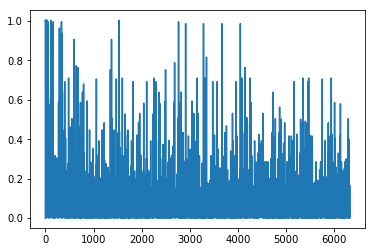

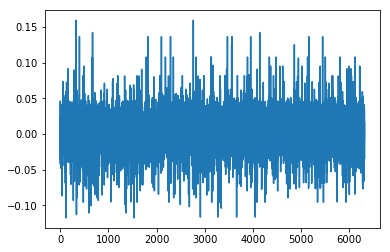

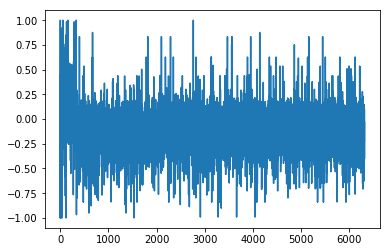

316
1.56782750486
[ 0.55555556  0.55555556  0.66666667  0.66666667  0.33333333  0.66666667
  0.66666667  0.66666667  1.          0.33333333  0.66666667  0.66666667
  0.55555556  0.66666667  0.66666667  0.66666667  0.77777778  0.          1.
  0.          0.88888889  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.44444444  0.22222222  0.33333333  0.66666667  0.33333333
  0.66666667  0.55555556  0.66666667  1.          0.33333333  0.66666667
  0.          0.88888889  1.          0.77777778  1.          0.77777778
  0.88888889  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-05-01 00:00:00


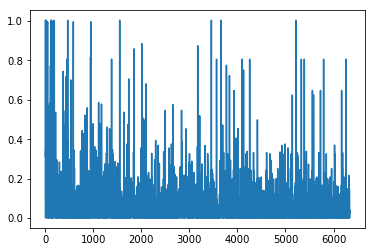

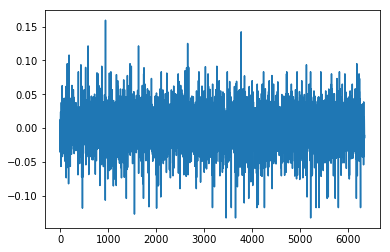

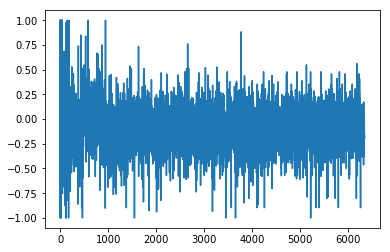

317
1.501967959
[ 0.77777778  0.77777778  0.66666667  0.22222222  0.11111111  0.22222222
  0.22222222  0.11111111  0.66666667  0.22222222  0.33333333  0.33333333
  0.11111111  0.33333333  0.22222222  0.55555556  0.44444444  0.44444444
  0.44444444  0.44444444  0.55555556  0.55555556  1.          1.
  0.44444444  0.44444444  0.55555556  0.55555556  1.          0.88888889
  1.          0.77777778  0.11111111  0.33333333  0.11111111  0.33333333
  0.33333333  0.22222222  0.22222222  0.66666667  0.          0.44444444
  0.66666667  0.55555556  1.          0.44444444  0.44444444  0.55555556
  0.55555556  1.          1.          0.44444444  0.55555556  0.55555556
  0.55555556  0.44444444  0.44444444  0.55555556  0.55555556]
Writing away results
1981-06-01 00:00:00


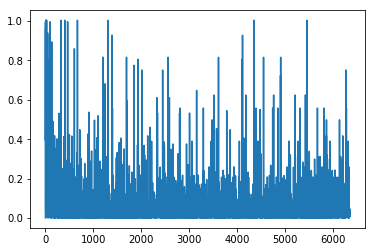

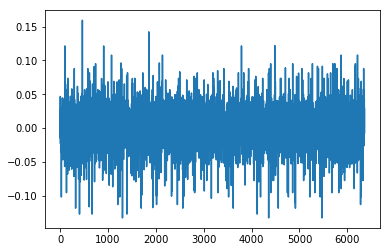

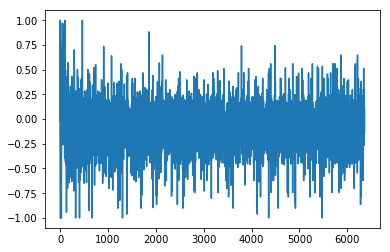

318
1.54871998936
[ 0.44444444  0.11111111  0.44444444  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.22222222  0.11111111
  0.66666667  0.66666667  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.11111111  0.66666667  0.11111111  0.66666667
  0.66666667  0.66666667  0.66666667  0.77777778  0.66666667  0.
  0.22222222  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  1.          0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-07-01 00:00:00


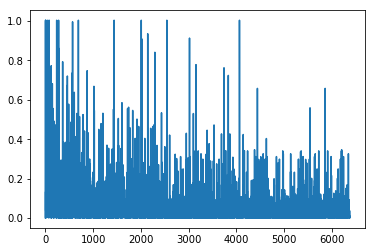

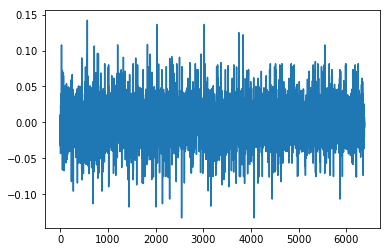

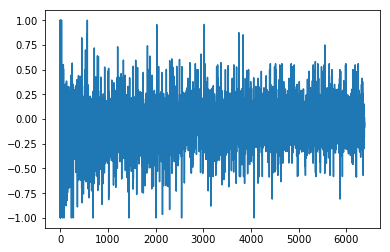

319
1.6059097891
[ 0.44444444  0.44444444  0.22222222  0.44444444  0.          0.33333333
  0.44444444  0.44444444  0.22222222  0.22222222  0.44444444  0.44444444
  0.44444444  0.11111111  0.55555556  0.11111111  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.55555556  0.66666667  0.66666667
  0.11111111  0.22222222  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.33333333  0.          0.11111111  0.          0.11111111
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1981-08-01 00:00:00


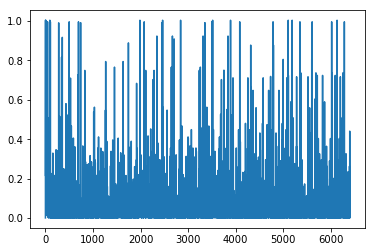

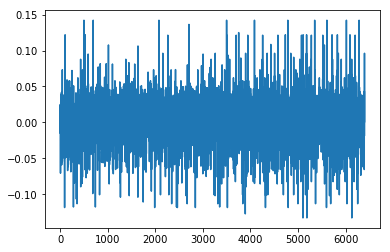

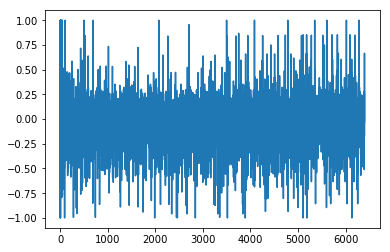

320
1.58534227755
[ 0.88888889  0.88888889  0.88888889  0.22222222  0.44444444  0.88888889
  0.88888889  0.88888889  0.22222222  0.44444444  0.88888889  0.33333333
  0.22222222  0.22222222  1.          1.          0.66666667  1.
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  1.          0.          1.          1.          0.66666667
  0.22222222  0.33333333  0.88888889  0.88888889  0.33333333  0.88888889
  0.33333333  0.22222222  0.33333333  0.77777778  0.66666667  1.          0.
  0.66666667  1.          0.66666667  1.          0.          1.
  0.66666667  1.          1.          1.          1.          0.66666667
  1.          0.66666667  0.66666667  0.66666667]
Writing away results
1981-09-01 00:00:00


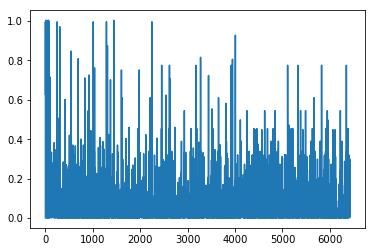

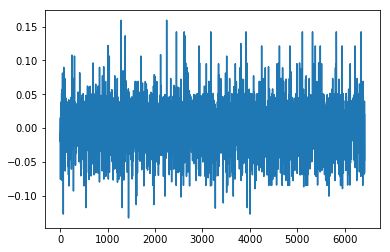

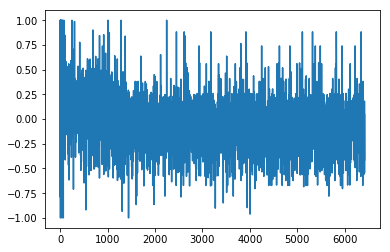

321
1.73214986292
[ 0.66666667  0.88888889  0.88888889  0.11111111  0.66666667  0.66666667
  0.88888889  0.66666667  0.66666667  0.66666667  0.88888889  0.77777778
  0.33333333  0.77777778  0.55555556  0.55555556  0.77777778  0.55555556
  0.55555556  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.88888889
  0.66666667  0.66666667  0.66666667  0.88888889  0.88888889  0.77777778
  0.33333333  0.11111111  0.55555556  0.          0.77777778  0.          1.
  0.77777778  0.77777778  0.77777778  0.55555556  1.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.55555556  0.77777778  0.77777778]
Writing away results
1981-10-01 00:00:00


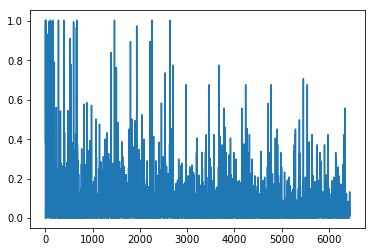

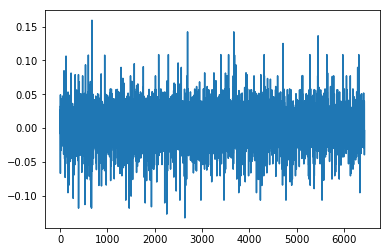

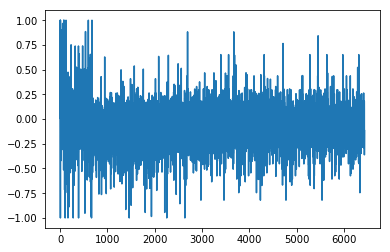

322
1.69055407743
[ 0.55555556  0.          0.          0.          0.33333333  0.55555556
  0.33333333  0.33333333  0.33333333  0.33333333  0.11111111  1.
  0.77777778  0.88888889  0.88888889  0.66666667  0.66666667  0.88888889
  0.88888889  0.88888889  0.88888889  0.44444444  0.88888889  0.44444444
  0.11111111  0.88888889  0.44444444  0.88888889  0.          0.33333333
  0.          0.33333333  0.33333333  0.33333333  0.55555556  0.
  0.77777778  0.22222222  1.          0.66666667  1.          0.88888889
  0.44444444  0.11111111  0.44444444  0.88888889  0.88888889  0.11111111
  0.88888889  0.44444444  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.11111111  0.88888889]
Writing away results
1981-11-01 00:00:00


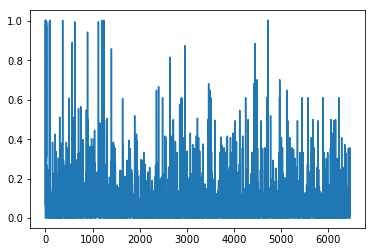

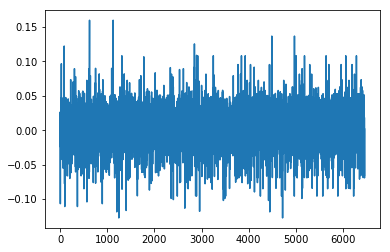

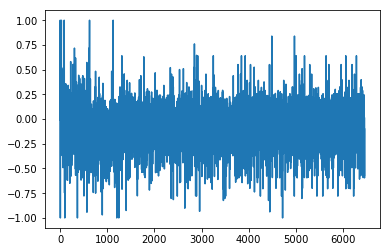

323
1.64990382445
[ 0.66666667  0.33333333  0.33333333  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  1.          0.44444444  1.
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  1.          0.11111111  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.44444444  0.22222222
  0.44444444  0.88888889  1.          0.44444444  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  1.          0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1981-12-01 00:00:00


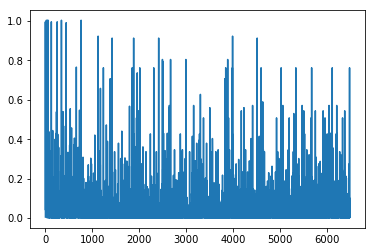

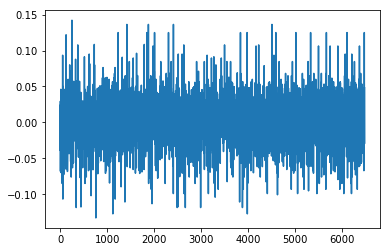

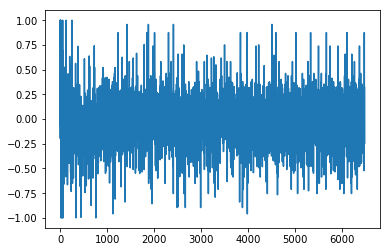

324
1.49148857569
[ 0.77777778  0.55555556  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.66666667  0.66666667  0.44444444  0.44444444
  0.44444444  0.55555556  0.44444444  0.22222222  0.44444444  0.55555556
  0.55555556  0.55555556  0.55555556  0.88888889  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.44444444  1.
  0.44444444  0.66666667  0.44444444  0.55555556  0.55555556  0.55555556
  0.22222222  0.44444444  0.55555556  0.55555556  0.55555556  0.55555556
  0.44444444  0.55555556  0.55555556  0.55555556  0.44444444  0.44444444
  0.44444444  0.55555556  0.55555556  0.55555556  0.55555556]
Writing away results
1982-01-01 00:00:00


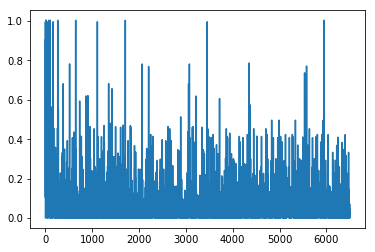

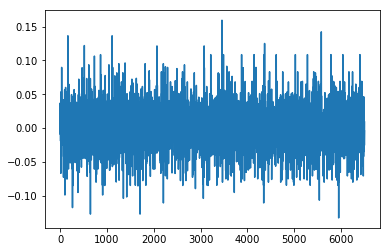

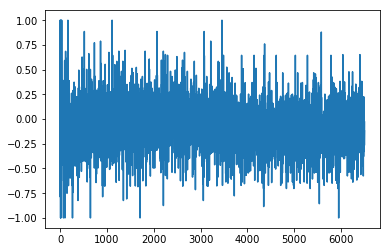

325
1.67668189255
[ 0.88888889  0.22222222  0.          0.77777778  0.44444444  0.22222222
  0.22222222  0.          0.66666667  1.          0.66666667  0.66666667
  0.66666667  0.66666667  0.44444444  1.          0.66666667  0.88888889
  0.66666667  0.66666667  0.66666667  0.44444444  0.33333333  0.88888889
  0.22222222  0.55555556  0.77777778  0.44444444  0.77777778  0.22222222
  0.77777778  0.          0.77777778  0.22222222  0.66666667  0.66666667
  0.44444444  0.88888889  0.44444444  0.66666667  0.66666667  0.66666667
  0.88888889  0.66666667  0.66666667  0.66666667  0.66666667  0.44444444
  0.88888889  0.66666667  0.66666667  0.66666667  1.          0.44444444
  0.44444444  1.          0.44444444  0.88888889  0.66666667]
Writing away results
1982-02-01 00:00:00


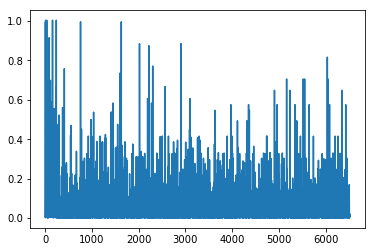

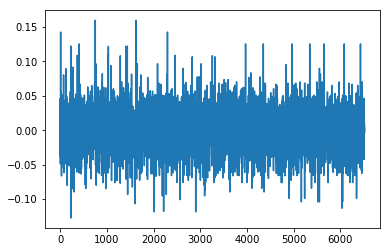

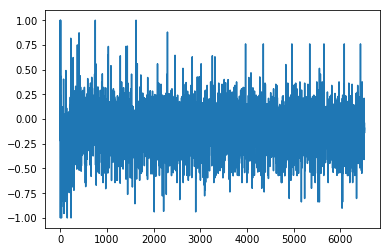

326
1.91141218295
[ 0.11111111  0.33333333  0.77777778  0.11111111  0.11111111  0.55555556
  0.55555556  0.66666667  0.66666667  0.66666667  1.          0.66666667
  0.22222222  1.          1.          0.22222222  1.          1.
  0.44444444  1.          1.          1.          0.22222222  0.44444444
  0.33333333  0.77777778  0.88888889  0.          0.77777778  0.77777778
  0.55555556  0.          0.44444444  0.          0.55555556  0.66666667
  0.22222222  1.          1.          1.          0.44444444  1.
  0.22222222  1.          0.66666667  0.22222222  1.          1.          1.
  1.          1.          0.66666667  1.          1.          1.
  0.22222222  0.44444444  0.66666667  0.44444444]
Writing away results
1982-03-01 00:00:00


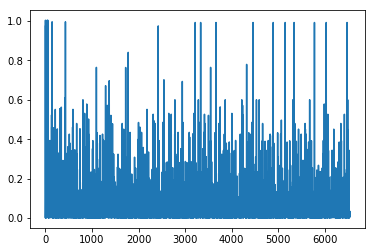

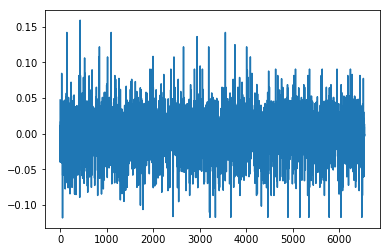

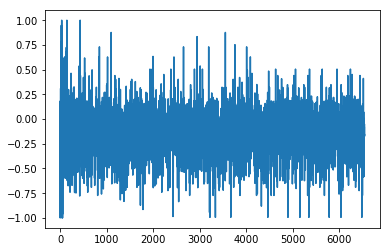

327
2.07471265726
[ 0.55555556  0.44444444  0.55555556  0.22222222  0.88888889  0.33333333
  0.          0.44444444  0.          0.44444444  0.44444444  0.33333333
  0.77777778  0.44444444  0.77777778  0.77777778  0.77777778  0.77777778
  0.22222222  0.77777778  0.33333333  0.88888889  0.11111111  0.77777778
  0.11111111  0.          0.55555556  0.          0.88888889  0.22222222
  0.88888889  0.          0.          0.77777778  0.33333333  0.44444444
  1.          0.44444444  0.77777778  0.33333333  1.          0.
  0.77777778  0.33333333  0.33333333  0.33333333  0.44444444  0.33333333
  0.33333333  1.          0.33333333  0.77777778  0.77777778  0.44444444
  0.77777778  0.33333333  0.77777778  0.33333333  0.33333333]
Writing away results
1982-04-01 00:00:00


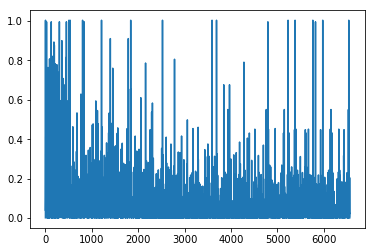

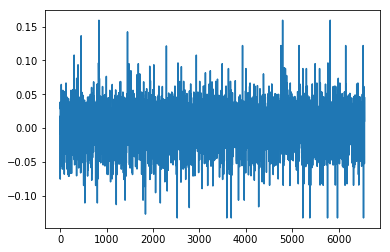

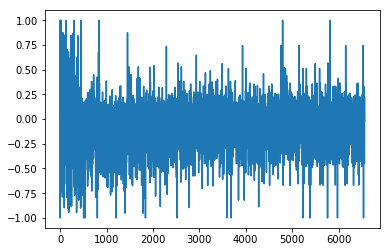

328
2.2218009597
[ 0.66666667  0.          0.22222222  1.          0.88888889  0.66666667
  1.          1.          1.          1.          0.88888889  0.88888889
  1.          1.          1.          1.          0.88888889  0.33333333
  1.          0.22222222  1.          0.22222222  0.66666667  0.
  0.22222222  0.          0.22222222  0.11111111  0.          0.66666667
  0.          0.88888889  0.11111111  0.33333333  1.          1.          1.
  0.33333333  1.          1.          0.44444444  1.          0.33333333
  0.33333333  1.          1.          1.          0.88888889  1.          1.
  1.          1.          0.44444444  0.88888889  0.44444444  0.33333333
  1.          0.77777778  0.11111111]
Writing away results
1982-05-01 00:00:00


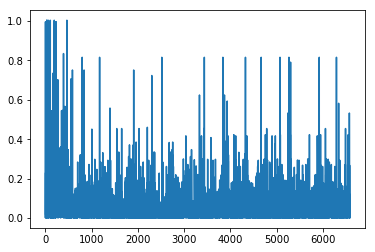

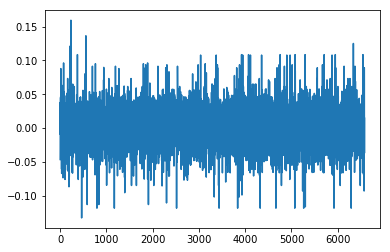

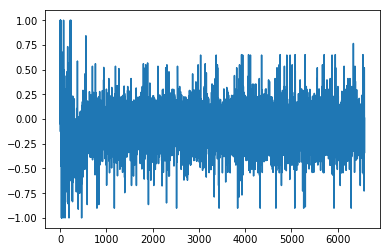

329
1.66334893199
[ 0.66666667  0.66666667  0.66666667  0.33333333  0.55555556  0.33333333
  0.55555556  0.55555556  0.55555556  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.33333333  0.77777778  0.22222222  0.77777778
  0.11111111  0.11111111  0.22222222  0.66666667  0.          0.66666667
  0.          0.22222222  0.          0.88888889  0.55555556  0.88888889
  0.33333333  0.44444444  0.44444444  0.88888889  0.88888889  0.88888889
  0.88888889  0.33333333  0.88888889  0.33333333  0.55555556  0.44444444
  0.88888889  0.88888889  0.88888889  0.88888889  0.44444444  0.88888889
  0.          0.33333333  0.          1.          0.33333333]
Writing away results
1982-06-01 00:00:00


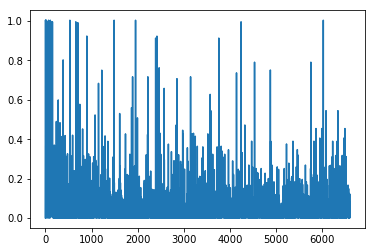

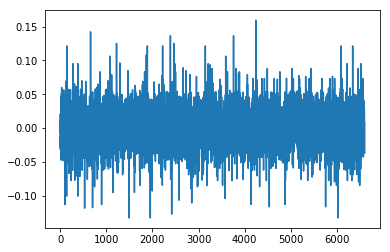

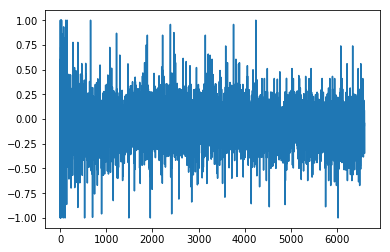

330
2.03543997407
[ 0.88888889  0.66666667  1.          0.11111111  0.88888889  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.          0.11111111  0.44444444  0.55555556  0.88888889
  0.66666667  0.66666667  0.55555556  0.11111111  0.66666667  0.66666667
  0.66666667  0.77777778  0.77777778  0.          0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  1.          0.77777778  0.          0.77777778]
Writing away results
1982-07-01 00:00:00


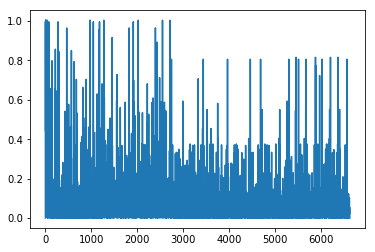

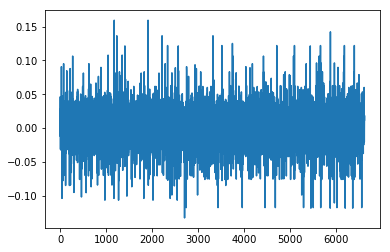

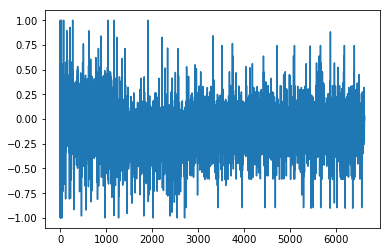

331
1.62369756941
[ 0.11111111  1.          0.11111111  1.          0.44444444  0.66666667
  0.66666667  0.44444444  0.          0.44444444  0.66666667  0.66666667
  0.66666667  0.66666667  0.44444444  0.66666667  1.          0.44444444
  0.66666667  0.88888889  0.77777778  0.55555556  0.22222222  0.77777778
  0.22222222  1.          0.44444444  0.77777778  0.11111111  0.          1.
  0.          0.          0.44444444  0.          0.44444444  1.
  0.44444444  0.66666667  1.          1.          1.          0.44444444
  1.          0.66666667  0.          1.          0.66666667  0.66666667
  1.          0.66666667  1.          0.44444444  0.66666667  1.
  0.44444444  1.          0.44444444  0.66666667]
Writing away results
1982-08-01 00:00:00


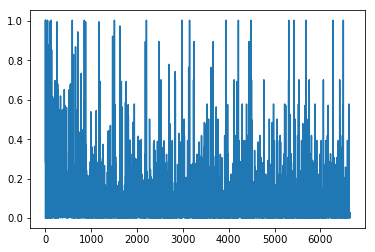

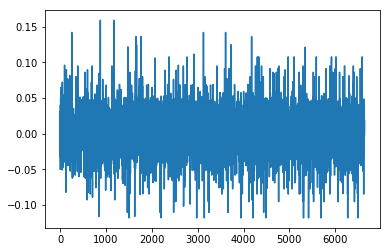

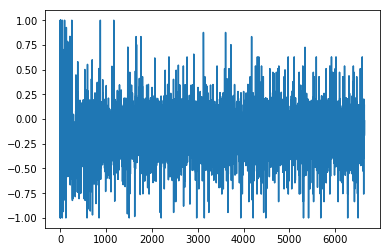

332
1.99693443116
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.11111111
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.          0.77777778  0.66666667  0.66666667  0.33333333  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1982-09-01 00:00:00


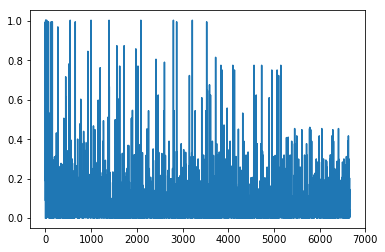

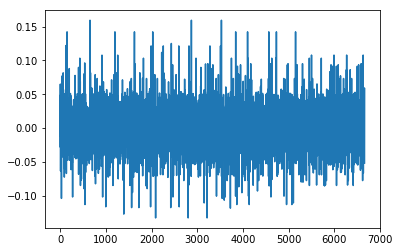

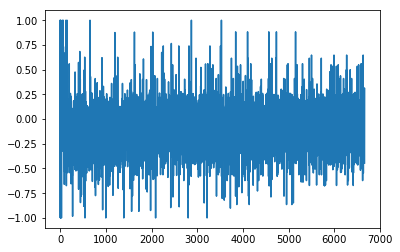

333
1.91113611002
[ 0.77777778  0.33333333  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.11111111
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.11111111  0.44444444  0.77777778  0.55555556  0.          0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.55555556  0.77777778  0.77777778]
Writing away results
1982-10-01 00:00:00


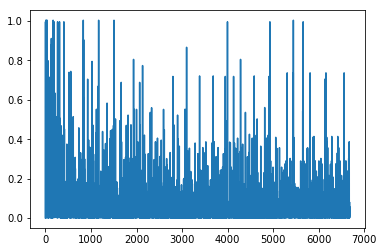

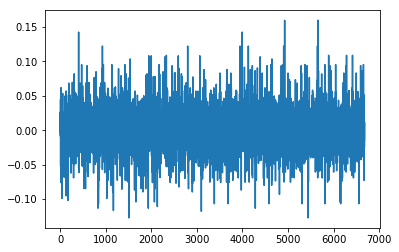

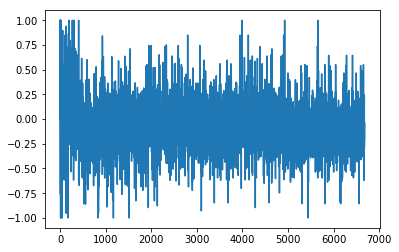

334
1.57425074734
[ 1.          1.          1.          0.66666667  0.66666667  0.77777778
  0.66666667  1.          1.          0.66666667  0.88888889  0.66666667
  0.88888889  0.55555556  1.          1.          0.          0.
  0.55555556  0.22222222  0.44444444  0.11111111  1.          0.55555556
  0.88888889  0.66666667  1.          0.55555556  0.66666667  0.88888889
  1.          1.          0.55555556  0.66666667  0.77777778  1.          1.
  0.55555556  0.55555556  1.          1.          1.          1.
  0.66666667  0.77777778  1.          0.66666667  0.          1.
  0.66666667  0.          0.55555556  1.          0.55555556  0.66666667
  0.88888889  0.55555556  0.66666667  0.55555556]
Writing away results
1982-11-01 00:00:00


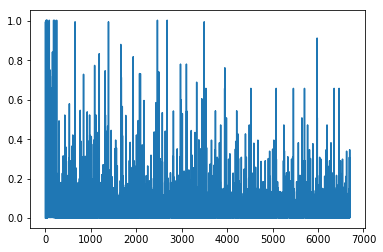

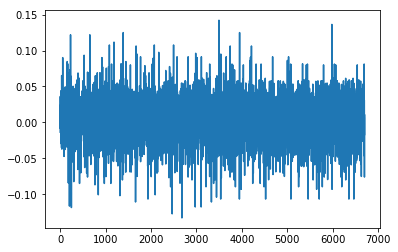

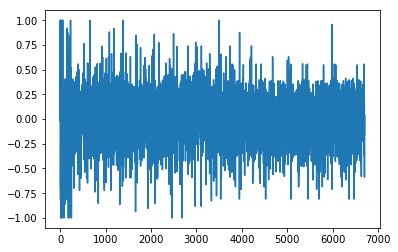

335
1.6582499127
[ 0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.44444444  0.88888889  1.          0.33333333  0.          0.
  0.          0.          0.33333333  0.          0.88888889  0.88888889
  0.44444444  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.77777778  0.88888889  0.88888889  0.88888889
  0.88888889  0.77777778  0.88888889  0.44444444]
Writing away results
1982-12-01 00:00:00


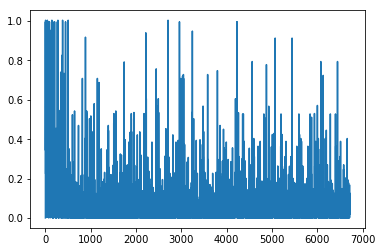

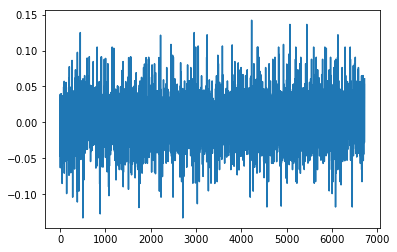

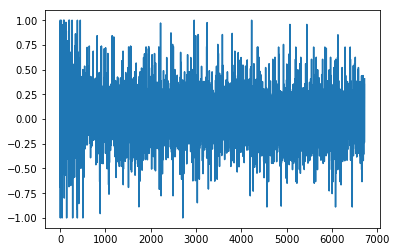

336
1.36420764028
[ 0.66666667  1.          0.66666667  0.66666667  0.66666667  0.66666667
  1.          0.66666667  0.66666667  1.          0.66666667  1.          1.
  0.66666667  1.          0.55555556  0.88888889  0.55555556  0.33333333
  0.88888889  0.55555556  0.88888889  0.          0.          0.55555556
  1.          0.66666667  0.66666667  0.66666667  0.66666667  1.          1.
  1.          0.66666667  0.66666667  1.          0.66666667  1.          1.
  1.          0.66666667  1.          0.66666667  0.66666667  1.          1.
  0.66666667  1.          0.66666667  1.          0.66666667  0.66666667
  1.          0.66666667  1.          0.66666667  1.          0.66666667
  0.66666667]
Writing away results
1983-01-01 00:00:00


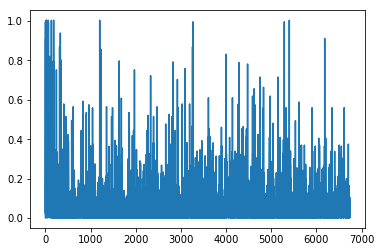

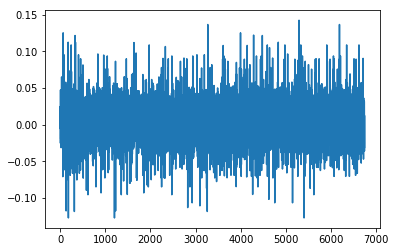

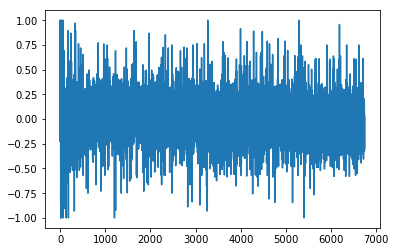

337
1.34879988305
[ 0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.44444444
  0.88888889  0.66666667  0.11111111  1.          0.11111111  0.11111111
  0.22222222  0.22222222  1.          0.55555556  0.33333333  0.88888889
  0.44444444  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.44444444  0.88888889
  0.44444444  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.44444444  0.88888889  0.88888889  0.55555556  0.66666667]
Writing away results
1983-02-01 00:00:00


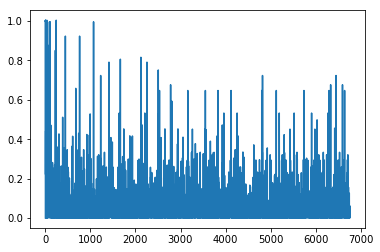

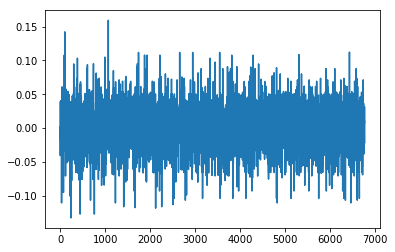

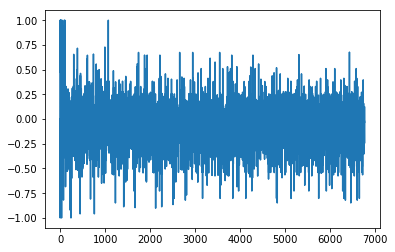

338
1.24310975833
[ 0.66666667  1.          1.          0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  1.          0.          1.          0.
  0.77777778  0.44444444  0.77777778  0.44444444  0.44444444  0.77777778
  0.22222222  0.77777778  0.44444444  0.22222222  0.66666667  0.
  0.11111111  0.          1.          0.66666667  0.66666667  0.66666667
  1.          1.          0.22222222  0.          0.          0.22222222
  0.66666667  0.22222222  0.66666667  0.          1.          1.
  0.66666667  0.66666667  1.          0.          0.66666667  0.22222222
  0.66666667  0.          0.66666667  1.          1.          0.          0.
  1.          1.          0.44444444  0.77777778]
Writing away results
1983-03-01 00:00:00


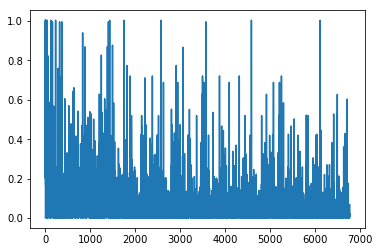

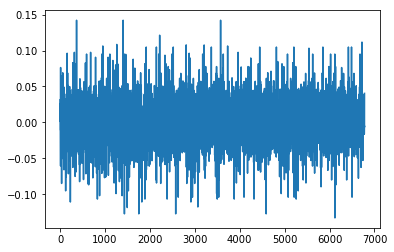

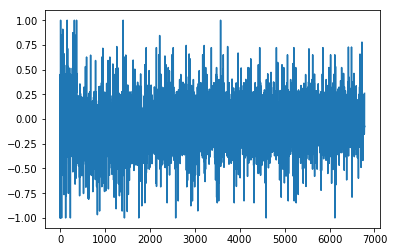

339
1.1364509678
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.77777778  0.66666667  0.88888889  0.66666667  0.          0.
  0.          0.          0.          0.          0.44444444  0.88888889
  0.55555556  0.66666667  0.55555556  0.22222222  0.77777778  0.66666667
  0.66666667  0.66666667  0.22222222  0.22222222  0.66666667  0.66666667
  0.66666667  0.22222222  0.22222222  0.22222222  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.22222222  0.22222222  0.88888889  0.66666667
  0.77777778  0.66666667  0.66666667  0.77777778  0.22222222  0.77777778
  0.66666667  0.11111111  0.77777778  0.44444444]
Writing away results
1983-04-01 00:00:00


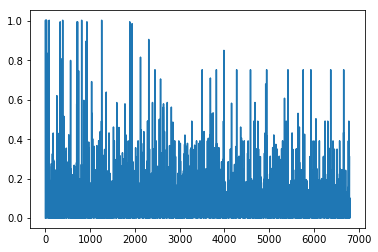

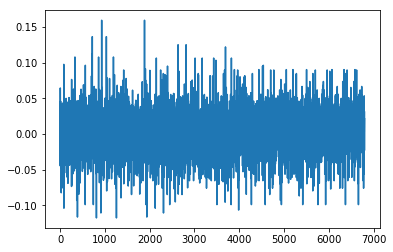

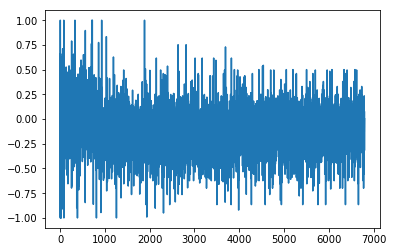

340
1.45564501176
[ 0.88888889  1.          0.66666667  0.22222222  0.66666667  0.88888889
  0.44444444  0.88888889  0.44444444  0.66666667  0.22222222  0.77777778
  0.11111111  0.          0.77777778  0.11111111  1.          0.77777778
  0.55555556  0.22222222  1.          0.88888889  0.44444444  0.88888889
  0.11111111  1.          0.88888889  0.22222222  1.          1.          1.
  0.77777778  0.66666667  0.22222222  1.          0.66666667  0.66666667
  0.88888889  0.11111111  0.44444444  1.          0.22222222  1.
  0.44444444  0.66666667  0.88888889  0.77777778  0.66666667  0.22222222
  0.33333333  0.88888889  0.44444444  0.88888889  0.11111111  0.33333333
  0.33333333  0.77777778  0.44444444  0.44444444]
Writing away results
1983-05-01 00:00:00


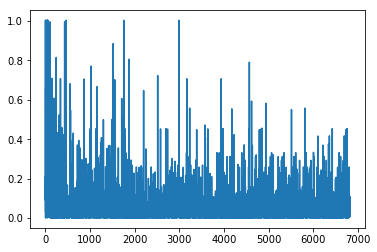

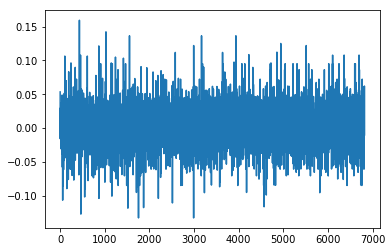

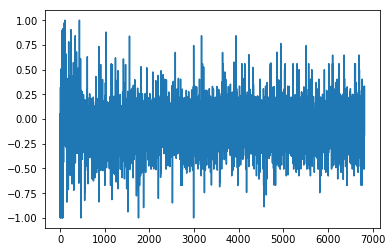

341
1.37811367923
[ 1.          0.77777778  0.77777778  0.77777778  0.77777778  1.
  0.77777778  1.          0.          0.11111111  0.11111111  0.
  0.66666667  0.33333333  0.          0.33333333  0.88888889  0.44444444
  0.66666667  0.66666667  0.77777778  0.44444444  1.          1.          1.
  0.77777778  0.44444444  1.          1.          0.77777778  0.77777778
  0.77777778  1.          0.77777778  0.77777778  0.44444444  0.77777778
  1.          1.          0.77777778  0.77777778  0.77777778  1.          1.
  0.77777778  1.          0.55555556  0.44444444  1.          0.77777778
  1.          0.77777778  0.44444444  0.66666667  0.11111111  0.
  0.22222222  0.33333333  1.        ]
Writing away results
1983-06-01 00:00:00


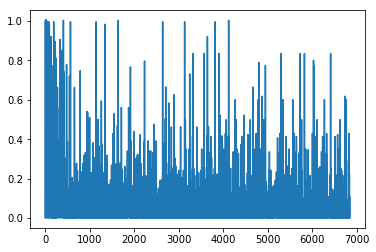

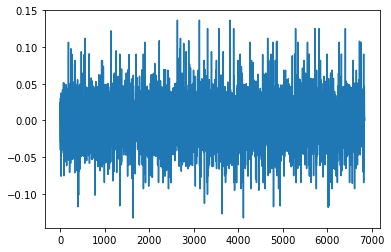

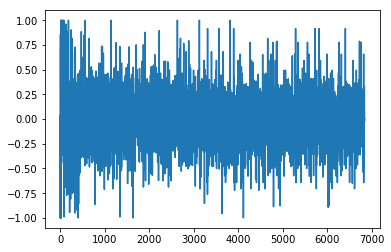

342
1.30300612393
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.33333333  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.          0.          0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.55555556  0.22222222
  0.77777778  0.77777778  0.44444444  0.          0.        ]
Writing away results
1983-07-01 00:00:00


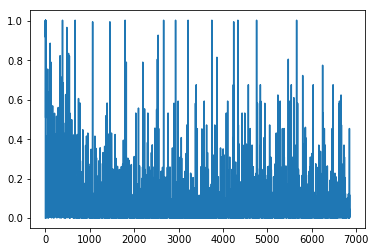

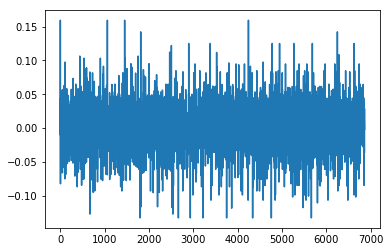

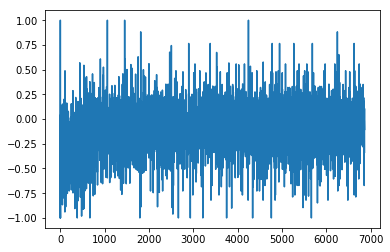

343
1.36635416435
[ 0.66666667  0.66666667  0.55555556  0.88888889  0.66666667  0.66666667
  0.33333333  0.44444444  0.          0.22222222  0.77777778  0.77777778
  0.77777778  0.77777778  0.66666667  0.88888889  0.66666667  0.77777778
  0.44444444  0.11111111  0.88888889  0.66666667  0.88888889  0.55555556
  0.88888889  0.66666667  0.66666667  0.44444444  0.66666667  0.88888889
  0.66666667  0.66666667  0.66666667  0.88888889  0.66666667  0.66666667
  0.88888889  0.66666667  0.66666667  0.88888889  0.66666667  0.66666667
  0.66666667  0.66666667  0.88888889  0.66666667  0.33333333  0.88888889
  0.88888889  0.88888889  0.66666667  0.22222222  0.          0.44444444
  0.          0.66666667  0.66666667  0.77777778  0.11111111]
Writing away results
1983-08-01 00:00:00


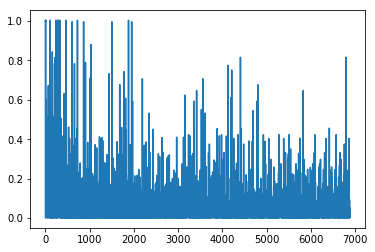

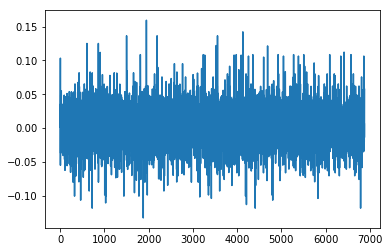

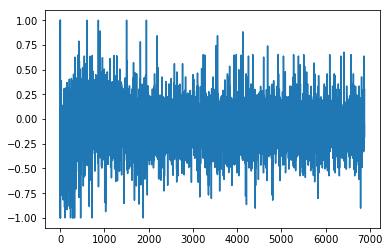

344
1.21611119289
[ 0.88888889  1.          0.88888889  0.88888889  0.44444444  0.22222222
  0.          0.77777778  0.          0.77777778  0.77777778  0.
  0.77777778  0.44444444  0.55555556  0.44444444  0.66666667  1.
  0.11111111  1.          0.88888889  0.22222222  0.88888889  0.88888889
  0.88888889  0.88888889  1.          1.          1.          0.88888889
  1.          0.22222222  0.88888889  1.          0.88888889  0.88888889
  1.          0.11111111  0.88888889  1.          0.88888889  0.88888889
  0.66666667  0.88888889  0.44444444  0.22222222  0.88888889  1.
  0.88888889  0.88888889  0.55555556  0.          0.          0.77777778
  0.77777778  0.44444444  0.55555556  0.55555556  0.22222222]
Writing away results
1983-09-01 00:00:00


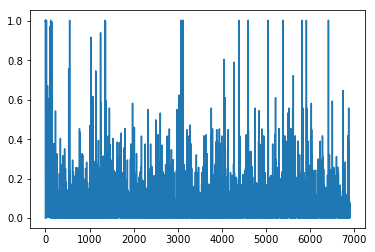

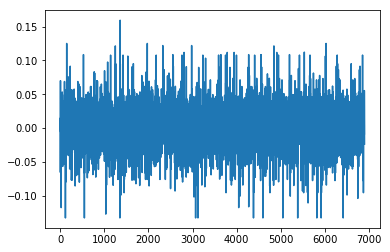

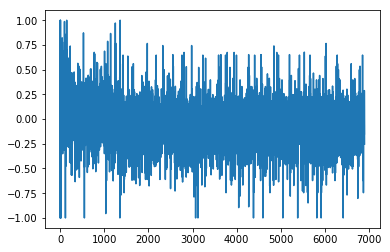

345
1.25006361678
[ 0.77777778  0.77777778  0.88888889  0.77777778  0.55555556  0.
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.          0.33333333  0.          0.22222222  0.88888889  0.77777778
  0.77777778  0.33333333  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.88888889  0.77777778  0.88888889  0.11111111
  0.77777778  0.          0.33333333  0.77777778  0.77777778  0.77777778
  0.77777778  0.66666667  0.66666667  0.66666667  0.44444444  1.
  0.11111111  0.11111111  0.66666667  0.22222222  0.22222222]
Writing away results
1983-10-01 00:00:00


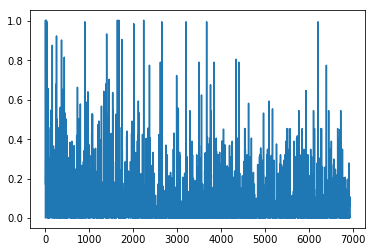

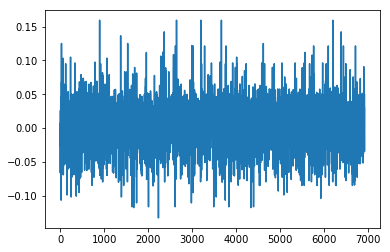

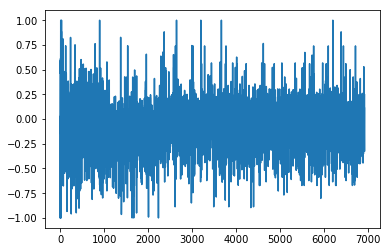

346
1.29321495698
[ 0.11111111  0.77777778  0.77777778  0.77777778  1.          0.66666667
  0.66666667  0.66666667  0.88888889  0.66666667  0.33333333  0.55555556
  0.88888889  0.          0.88888889  0.77777778  0.44444444  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.44444444  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.11111111  0.77777778  0.77777778  0.77777778
  0.44444444  0.11111111  0.77777778  0.22222222  0.77777778  0.77777778
  0.22222222  1.          0.66666667  1.          1.          0.66666667
  0.66666667  0.33333333  0.88888889  0.66666667  0.66666667]
Writing away results
1983-11-01 00:00:00


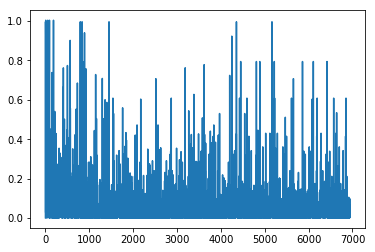

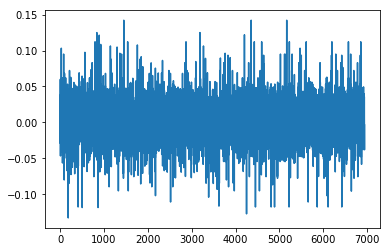

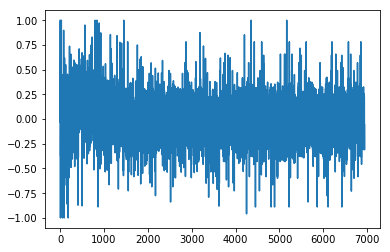

347
1.39556714502
[ 0.55555556  0.77777778  0.77777778  0.66666667  0.22222222  0.44444444
  0.22222222  0.22222222  0.          0.22222222  0.88888889  1.
  0.66666667  1.          0.77777778  1.          0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  1.          0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.33333333
  0.77777778  0.77777778  0.33333333  1.          0.77777778  0.77777778
  1.          1.          0.77777778  0.77777778  0.77777778  0.
  0.66666667  0.44444444  0.44444444  0.55555556  0.66666667  0.22222222
  0.66666667  0.44444444  0.22222222  0.22222222  0.77777778]
Writing away results
1983-12-01 00:00:00


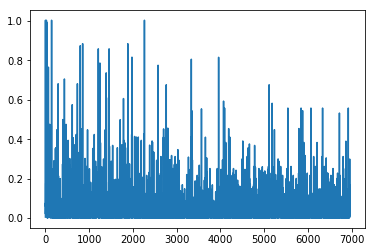

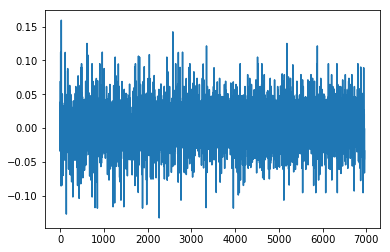

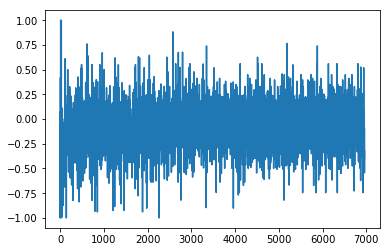

348
1.36647046168
[ 0.          0.33333333  0.22222222  0.22222222  0.22222222  0.44444444
  0.44444444  0.44444444  0.66666667  0.          0.44444444  0.44444444
  0.          0.55555556  0.55555556  0.55555556  0.88888889  0.77777778
  0.33333333  0.55555556  0.55555556  0.88888889  1.          0.77777778
  0.77777778  0.55555556  0.55555556  0.77777778  0.55555556  0.55555556
  0.55555556  0.88888889  0.55555556  0.77777778  0.55555556  1.
  0.77777778  1.          0.77777778  0.33333333  0.88888889  0.44444444
  1.          0.88888889  0.77777778  0.88888889  0.44444444  0.66666667
  0.22222222  0.          0.11111111  0.44444444  0.44444444  0.
  0.77777778  0.44444444  0.44444444  1.          0.77777778]
Writing away results
1984-01-01 00:00:00


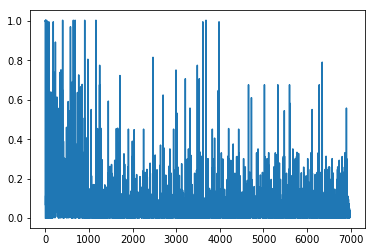

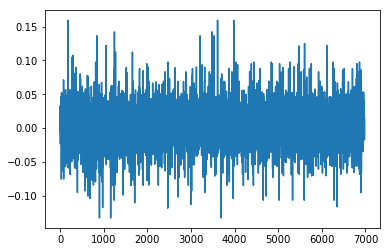

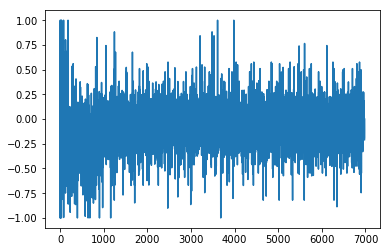

349
1.37585756667
[ 0.55555556  0.44444444  0.22222222  0.44444444  0.11111111  0.44444444
  0.44444444  0.88888889  0.66666667  0.88888889  0.44444444  0.88888889
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  1.          0.77777778  0.77777778
  0.88888889  0.77777778  0.88888889  0.33333333  0.77777778  1.
  0.77777778  0.77777778  0.77777778  0.11111111  0.11111111  0.22222222
  0.22222222  0.44444444  0.44444444  0.88888889  0.66666667  0.22222222
  0.44444444  0.22222222  0.77777778  0.77777778  0.33333333]
Writing away results
1984-02-01 00:00:00


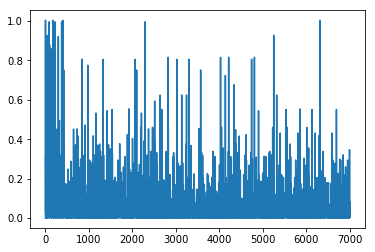

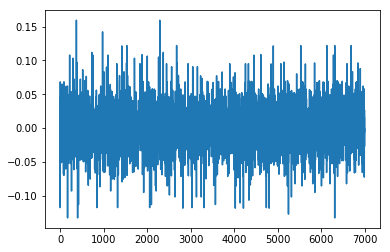

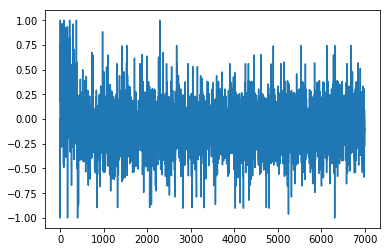

350
1.37489846931
[ 0.44444444  0.66666667  0.22222222  0.          0.66666667  0.66666667
  0.88888889  0.33333333  0.11111111  0.77777778  0.11111111  0.11111111
  1.          1.          0.44444444  0.77777778  0.77777778  1.          1.
  1.          0.77777778  1.          1.          0.77777778  0.77777778
  0.77777778  1.          1.          1.          1.          0.77777778
  1.          0.44444444  0.77777778  1.          0.77777778  1.
  0.11111111  0.77777778  1.          0.77777778  0.77777778  1.          1.
  0.          0.44444444  0.22222222  0.11111111  0.11111111  0.66666667
  0.44444444  0.33333333  0.11111111  1.          0.          0.77777778
  0.44444444  0.77777778  0.44444444]
Writing away results
1984-03-01 00:00:00


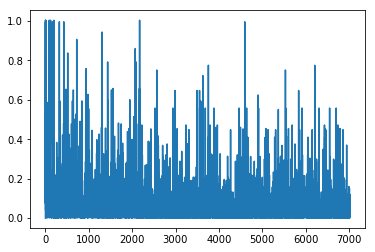

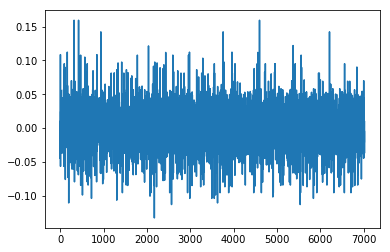

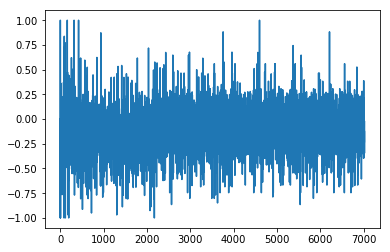

351
1.90068011385
[ 0.66666667  0.66666667  0.66666667  0.          0.66666667  0.
  0.66666667  0.          0.44444444  0.55555556  0.77777778  0.77777778
  0.33333333  0.44444444  0.77777778  0.77777778  0.77777778  0.33333333
  0.44444444  0.77777778  0.77777778  0.77777778  0.33333333  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.44444444  0.77777778  0.88888889  0.44444444
  0.77777778  0.88888889  0.77777778  0.88888889  1.          0.77777778
  0.33333333  0.          0.88888889  0.66666667  0.66666667  0.11111111
  0.33333333  0.          0.88888889  0.66666667  0.66666667  0.44444444
  0.44444444  0.77777778  0.77777778  0.33333333  0.77777778]
Writing away results
1984-04-01 00:00:00


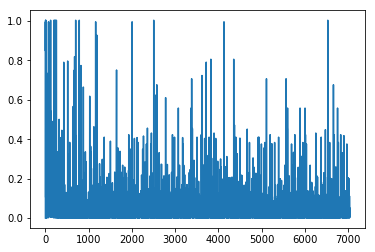

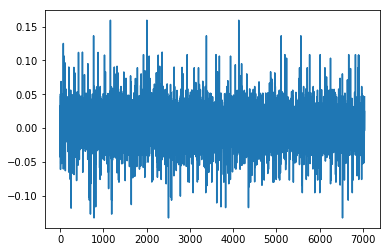

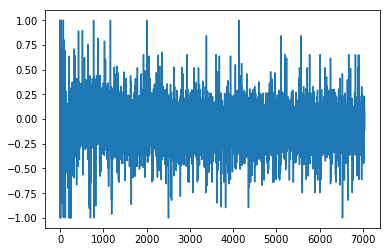

352
1.40420722082
[ 0.11111111  0.11111111  0.66666667  0.11111111  0.66666667  0.22222222
  0.77777778  0.11111111  0.55555556  0.77777778  0.88888889  0.77777778
  0.55555556  0.77777778  0.77777778  0.77777778  0.88888889  0.55555556
  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.55555556  0.77777778  0.77777778  0.88888889
  0.77777778  0.88888889  0.77777778  0.77777778  0.44444444  0.77777778
  0.88888889  0.55555556  0.77777778  0.77777778  0.77777778  0.88888889
  0.11111111  0.11111111  0.22222222  0.66666667  0.77777778  1.
  0.22222222  0.22222222  0.          0.11111111  0.11111111  0.44444444
  0.33333333  0.77777778  0.88888889  0.55555556  0.77777778]
Writing away results
1984-05-01 00:00:00


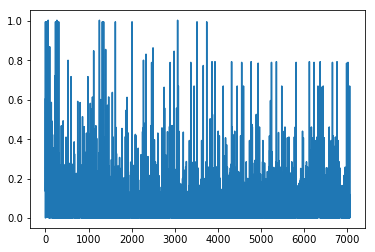

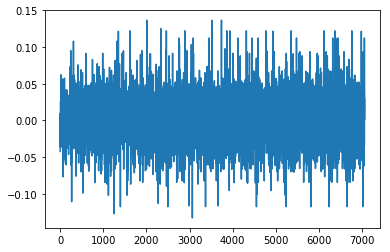

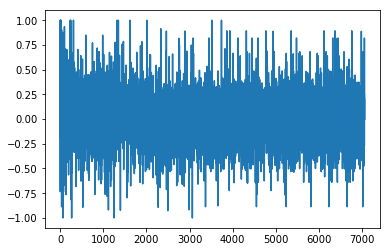

353
1.7028736765
[ 0.33333333  0.33333333  0.55555556  0.44444444  0.44444444  0.88888889
  0.11111111  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  0.88888889  0.66666667  0.22222222  0.44444444  0.33333333  0.88888889
  0.88888889  0.66666667  0.44444444  0.77777778  0.22222222  1.          1.
  1.          0.77777778  1.          1.          1.        ]
Writing away results
1984-06-01 00:00:00


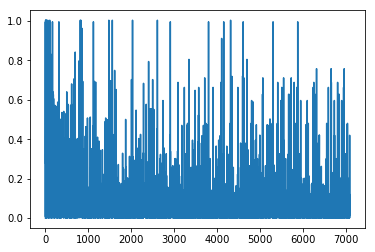

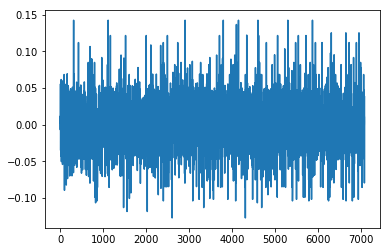

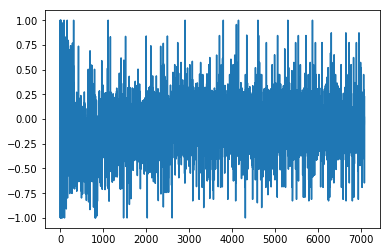

354
1.66980895535
[ 0.77777778  0.77777778  1.          0.33333333  0.88888889  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.66666667
  0.55555556  0.66666667  0.55555556  0.66666667  0.66666667  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.66666667  0.55555556
  0.55555556  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.55555556  0.66666667  0.55555556  0.22222222  0.66666667
  0.55555556  0.66666667  0.55555556  0.66666667  0.44444444  1.          1.
  0.88888889  0.44444444  0.22222222  1.          0.33333333  0.88888889
  0.77777778  0.88888889  0.66666667  0.66666667  0.66666667  0.55555556
  0.55555556  0.33333333  0.66666667  0.55555556]
Writing away results
1984-07-01 00:00:00


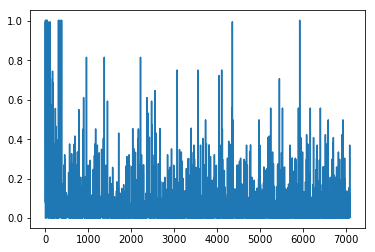

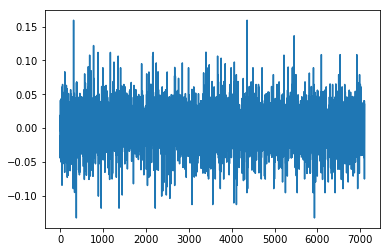

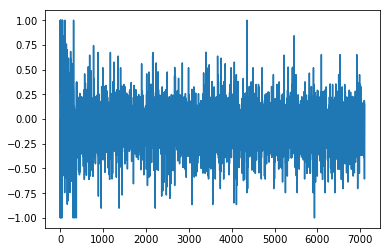

355
1.28440283166
[ 0.11111111  0.44444444  0.66666667  0.          0.66666667  0.
  0.77777778  0.66666667  1.          0.88888889  1.          0.33333333
  0.77777778  0.66666667  0.55555556  0.55555556  0.66666667  0.77777778
  0.66666667  0.          0.77777778  0.77777778  0.          0.88888889
  0.77777778  0.66666667  0.55555556  0.77777778  0.66666667  0.55555556
  0.66666667  0.88888889  1.          0.66666667  0.          0.33333333
  0.          0.77777778  0.88888889  0.55555556  0.55555556  0.55555556
  0.22222222  0.66666667  0.44444444  0.33333333  0.33333333  0.77777778
  0.66666667  0.77777778  1.          0.55555556  1.          0.66666667
  0.88888889  0.33333333  1.          0.66666667  0.77777778]
Writing away results
1984-08-01 00:00:00


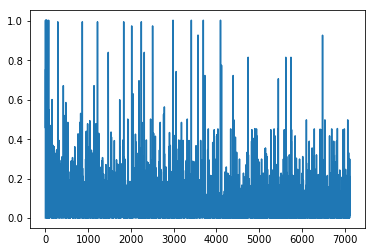

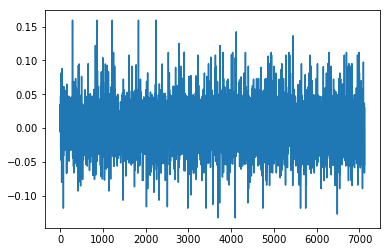

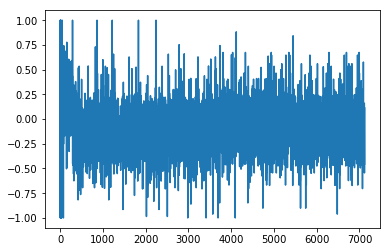

356
1.50781746961
[ 0.44444444  0.11111111  1.          0.77777778  1.          0.22222222
  0.88888889  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.33333333  0.77777778
  0.33333333  0.77777778  0.88888889  0.22222222  0.77777778  0.88888889
  0.77777778  0.77777778  0.66666667  0.66666667  0.44444444  0.66666667
  0.66666667  0.33333333  0.44444444  0.44444444  0.11111111  0.88888889
  0.66666667  0.77777778  0.77777778  0.77777778  0.33333333  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1984-09-01 00:00:00


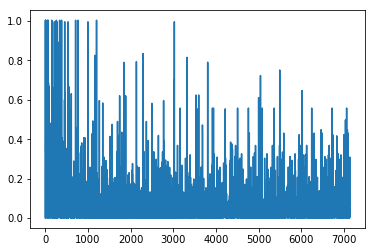

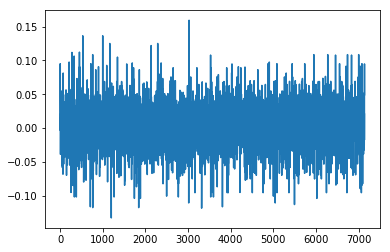

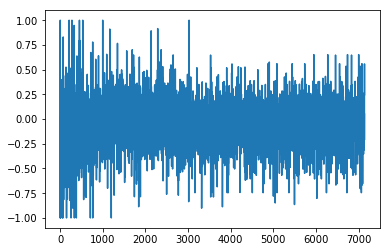

357
1.7566148124
[ 0.55555556  0.77777778  0.          0.44444444  0.77777778  0.44444444
  0.77777778  0.77777778  0.77777778  1.          1.          0.77777778
  0.77777778  0.77777778  1.          0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.44444444  0.77777778  0.44444444  0.77777778  0.77777778  0.44444444
  0.77777778  0.55555556  0.77777778  0.77777778  0.77777778  0.77777778
  0.55555556  0.          0.11111111  0.66666667  0.88888889  0.66666667
  0.55555556  0.          0.          1.          0.55555556  0.55555556
  0.77777778  1.          0.77777778  0.88888889  0.44444444  1.
  0.77777778  0.44444444  0.77777778  0.77777778  0.77777778]
Writing away results
1984-10-01 00:00:00


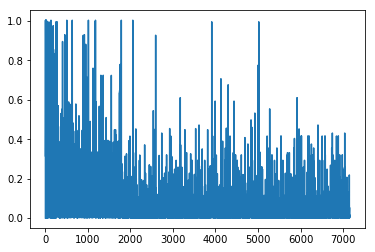

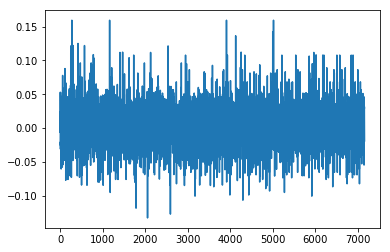

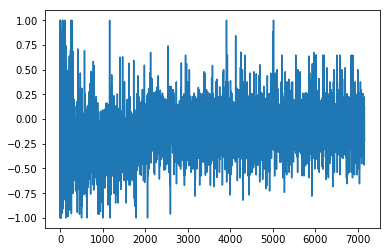

358
1.3458381785
[ 0.22222222  0.66666667  0.33333333  0.33333333  1.          0.66666667
  1.          0.88888889  0.          0.          0.66666667  0.44444444
  0.88888889  0.33333333  0.55555556  1.          1.          0.88888889
  1.          0.66666667  0.33333333  0.          0.44444444  0.          1.
  0.44444444  0.          0.44444444  0.          0.55555556  1.
  0.11111111  0.33333333  0.          0.55555556  1.          0.11111111
  0.88888889  0.33333333  0.          0.22222222  0.22222222  0.77777778
  1.          0.22222222  0.66666667  0.66666667  0.11111111  0.          0.
  0.77777778  0.11111111  0.44444444  1.          0.33333333  0.33333333
  0.66666667  0.55555556  0.33333333]
Writing away results
1984-11-01 00:00:00


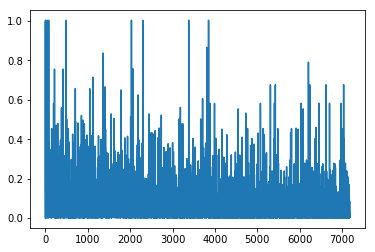

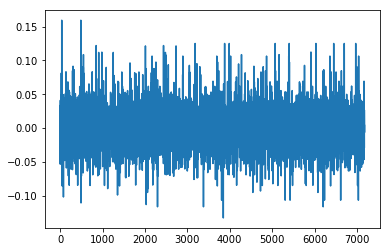

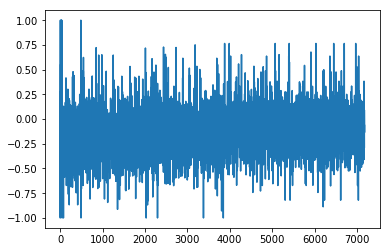

359
1.65754051887
[ 0.88888889  1.          0.88888889  0.55555556  0.88888889  0.44444444
  0.44444444  0.55555556  0.88888889  0.88888889  1.          0.
  0.55555556  0.88888889  0.88888889  1.          0.55555556  0.88888889
  0.88888889  0.88888889  0.88888889  0.66666667  0.88888889  0.22222222
  0.44444444  1.          0.          0.44444444  0.          0.55555556
  0.44444444  0.55555556  0.44444444  0.          0.22222222  0.77777778
  0.77777778  0.77777778  0.11111111  0.88888889  0.22222222  0.22222222
  0.11111111  0.          0.88888889  0.77777778  0.44444444  1.
  0.88888889  0.66666667  0.44444444  0.55555556  0.          0.44444444
  0.55555556  0.88888889  0.          0.55555556  0.55555556]
Writing away results
1984-12-01 00:00:00


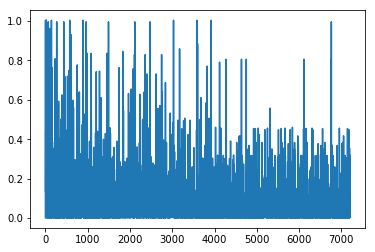

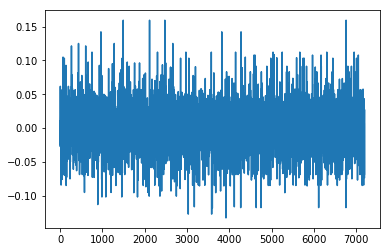

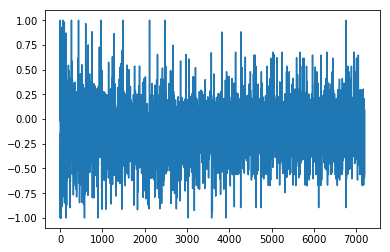

360
1.59315306362
[ 1.          1.          0.          0.11111111  0.77777778  0.77777778
  0.77777778  0.55555556  0.77777778  0.77777778  0.77777778  1.          0.
  0.77777778  1.          0.77777778  0.77777778  1.          0.77777778
  0.77777778  0.77777778  0.22222222  0.77777778  0.11111111  0.22222222
  1.          0.          0.77777778  1.          1.          0.77777778
  0.55555556  0.11111111  0.77777778  0.88888889  0.66666667  0.66666667
  0.          0.11111111  0.11111111  0.33333333  1.          0.66666667
  0.66666667  0.88888889  0.88888889  0.77777778  0.77777778  1.
  0.11111111  0.77777778  0.55555556  1.          0.77777778  0.77777778
  1.          0.77777778  0.77777778  0.55555556]
Writing away results
1985-01-01 00:00:00


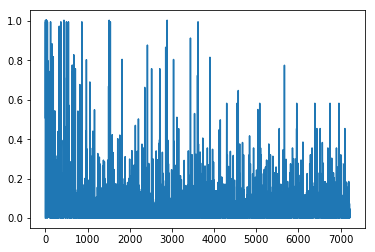

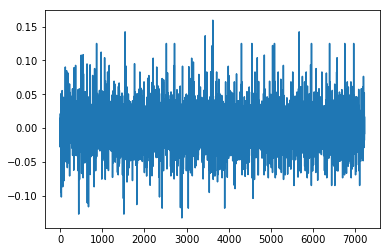

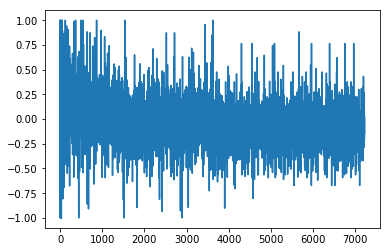

361
1.07297816302
[ 0.22222222  0.66666667  0.66666667  0.22222222  0.55555556  0.88888889
  0.55555556  0.66666667  0.22222222  0.22222222  0.88888889  0.55555556
  0.55555556  0.22222222  0.55555556  0.55555556  0.66666667  0.66666667
  0.55555556  0.22222222  0.44444444  1.          0.11111111  0.88888889
  0.22222222  0.          0.55555556  0.11111111  0.55555556  0.22222222
  0.55555556  0.55555556  1.          1.          0.33333333  0.44444444
  0.44444444  0.44444444  0.44444444  1.          0.11111111  0.
  0.66666667  0.66666667  0.22222222  0.22222222  0.88888889  0.11111111
  1.          0.55555556  0.22222222  0.          1.          0.22222222
  0.22222222  0.66666667  0.66666667  0.22222222  0.88888889]
Writing away results
1985-02-01 00:00:00


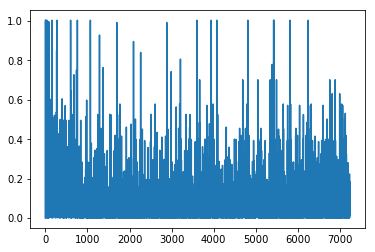

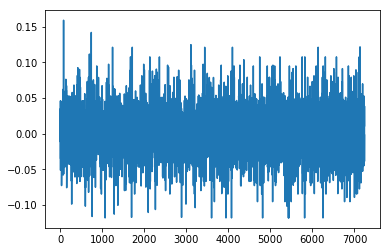

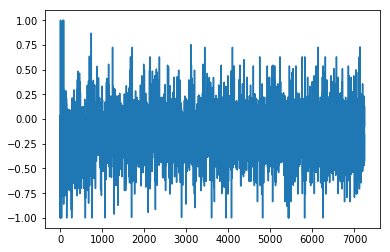

362
1.36130951086
[ 0.77777778  0.77777778  0.44444444  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.44444444
  0.55555556  0.77777778  0.88888889  0.77777778  0.44444444  0.77777778
  0.77777778  0.77777778  0.77777778  0.22222222  0.66666667  0.
  0.55555556  0.66666667  0.66666667  0.22222222  0.22222222  0.66666667
  0.66666667  0.77777778  0.77777778  0.77777778  0.88888889  0.
  0.44444444  0.77777778  1.          0.          0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  1.          0.77777778]
Writing away results
1985-03-01 00:00:00


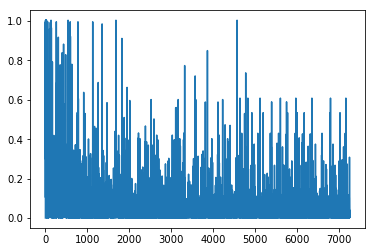

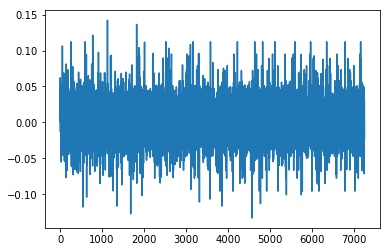

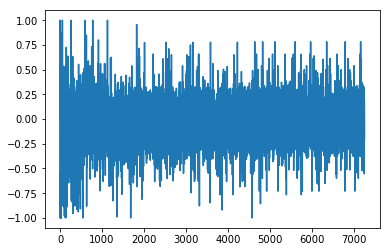

363
1.44085609225
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.66666667  0.77777778  0.77777778  0.66666667  0.77777778
  0.77777778  0.77777778  0.66666667  0.66666667  0.77777778  0.77777778
  0.77777778  0.11111111  0.11111111  0.44444444  0.44444444  0.44444444
  0.33333333  0.66666667  0.          0.          0.33333333  0.88888889
  0.66666667  0.77777778  0.77777778  0.77777778  0.66666667  1.
  0.66666667  0.77777778  0.66666667  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1985-04-01 00:00:00


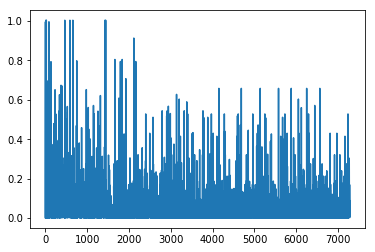

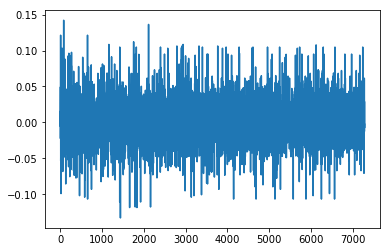

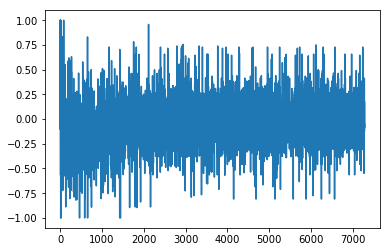

364
1.61122019834
[ 0.11111111  0.88888889  0.88888889  0.55555556  0.88888889  0.11111111
  0.88888889  0.88888889  0.55555556  0.55555556  0.88888889  0.88888889
  0.55555556  0.88888889  0.88888889  0.55555556  0.88888889  0.88888889
  0.55555556  0.55555556  0.55555556  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.11111111
  0.          0.66666667  0.          0.77777778  0.33333333  0.33333333
  1.          0.          0.77777778  0.88888889  0.33333333  0.11111111
  0.11111111  0.55555556  0.55555556  0.88888889  0.11111111  0.33333333
  0.88888889  0.88888889  0.55555556  0.88888889  0.88888889  0.55555556
  0.55555556  0.88888889  0.88888889  0.55555556  0.55555556]
Writing away results
1985-05-01 00:00:00


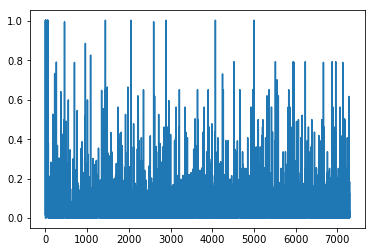

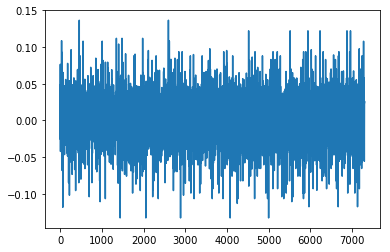

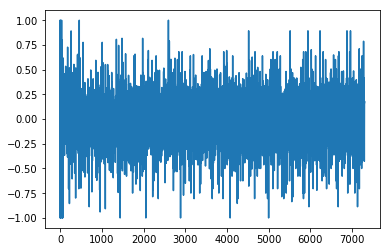

365
1.3574613953
[ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          0.88888889  0.66666667  0.77777778  0.          0.
  0.55555556  0.55555556  0.33333333  0.88888889  0.77777778  0.          1.
  1.          1.          1.          0.11111111  1.          1.          1.
  1.          1.          1.          1.          1.          1.
  0.66666667  1.          1.          0.66666667  0.44444444]
Writing away results
1985-06-01 00:00:00


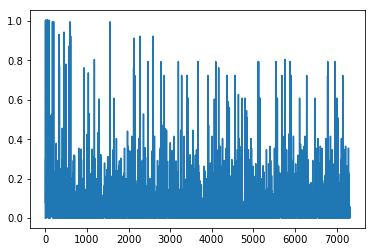

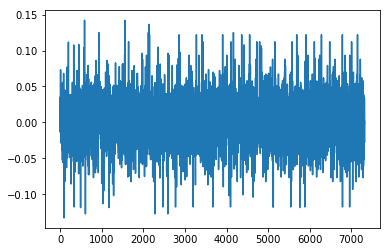

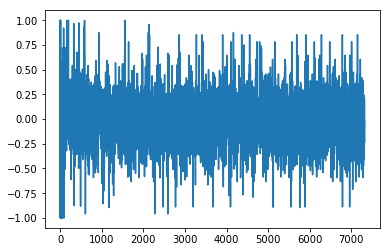

366
1.54161789447
[ 1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  0.55555556  0.66666667  0.66666667  0.66666667  0.11111111  0.22222222
  0.22222222  0.77777778  0.77777778  0.11111111  0.11111111  1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          0.77777778]
Writing away results
1985-07-01 00:00:00


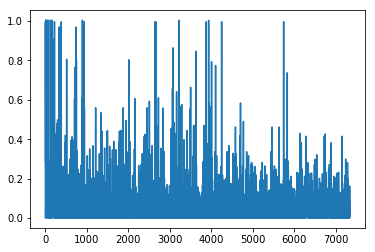

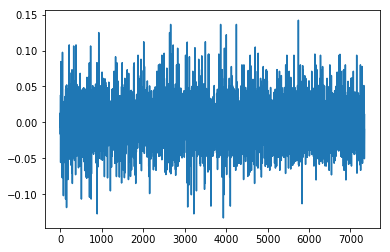

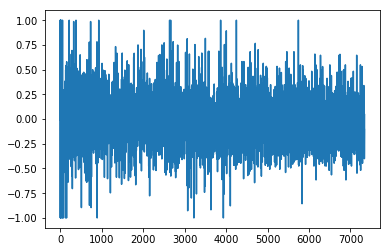

367
1.35038970778
[ 0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.11111111  0.          0.88888889  0.
  0.88888889  0.11111111  0.88888889  0.11111111  0.22222222  0.33333333
  0.55555556  0.44444444  0.44444444  0.77777778  0.22222222  0.44444444
  0.44444444  0.55555556  0.88888889  0.88888889  0.          0.44444444
  0.33333333  0.77777778  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.          0.88888889  0.88888889  0.66666667  0.        ]
Writing away results
1985-08-01 00:00:00


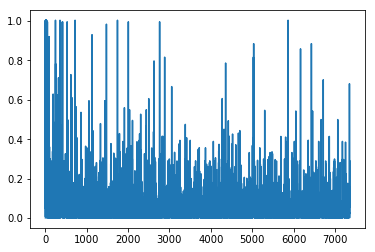

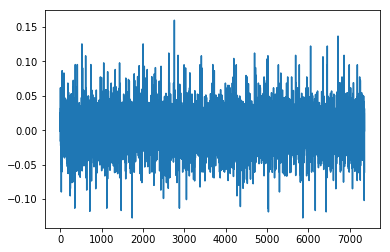

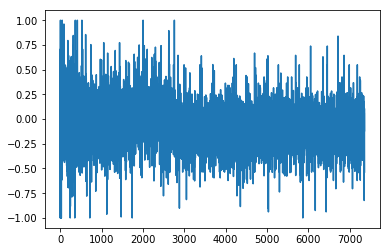

368
1.24369678572
[ 0.77777778  0.77777778  0.77777778  0.88888889  1.          0.55555556
  0.77777778  1.          0.77777778  0.77777778  0.88888889  0.77777778
  0.77777778  0.88888889  0.77777778  0.77777778  1.          0.11111111
  0.44444444  1.          0.55555556  0.33333333  0.22222222  0.77777778
  0.          0.55555556  0.33333333  0.22222222  0.88888889  0.88888889
  0.44444444  0.55555556  0.33333333  0.22222222  0.22222222  0.88888889
  0.66666667  0.77777778  0.77777778  0.33333333  0.11111111  0.88888889
  0.77777778  0.44444444  0.          1.          0.55555556  0.55555556
  0.88888889  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778
  0.          0.88888889  0.33333333  0.11111111  1.        ]
Writing away results
1985-09-01 00:00:00


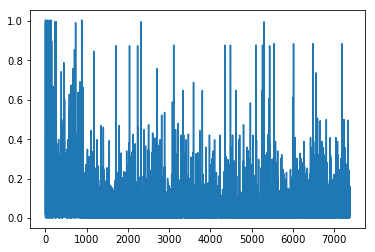

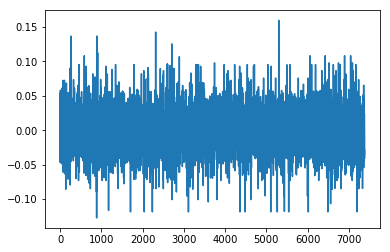

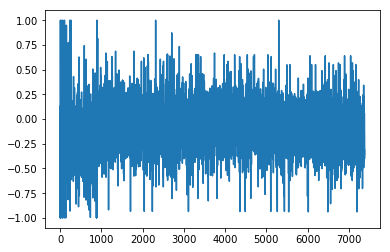

369
1.24908062343
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.55555556  0.77777778  0.77777778  0.77777778
  0.77777778  0.55555556  0.66666667  0.77777778  0.77777778  0.77777778
  0.77777778  0.66666667  0.22222222  0.66666667  0.77777778  0.77777778
  0.66666667  0.66666667  0.11111111  0.22222222  0.88888889  0.88888889
  0.55555556  0.77777778  0.77777778  0.          0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.44444444  0.77777778  0.77777778
  0.77777778  0.55555556  0.77777778  0.77777778  0.55555556  0.55555556
  0.77777778  0.33333333  0.77777778  0.66666667  0.44444444]
Writing away results
1985-10-01 00:00:00


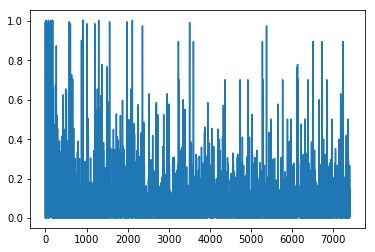

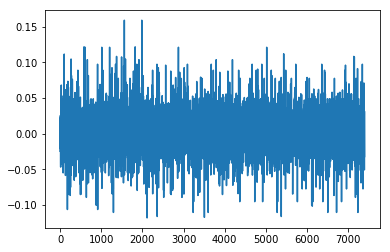

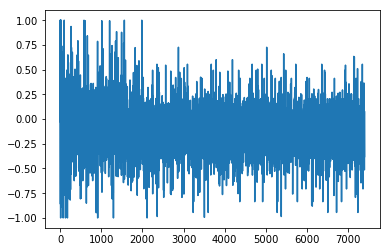

370
1.14274838452
[ 0.77777778  0.77777778  0.44444444  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.44444444  0.77777778  0.33333333  0.77777778
  0.77777778  0.55555556  0.77777778  0.33333333  0.77777778  0.77777778
  0.11111111  0.          0.          0.44444444  0.22222222  0.55555556
  0.66666667  0.66666667  1.          0.88888889  0.55555556  0.33333333
  0.77777778  0.77777778  0.88888889  0.          0.77777778  0.33333333
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.44444444  0.88888889  0.
  0.22222222  0.77777778  1.          0.88888889  0.55555556]
Writing away results
1985-11-01 00:00:00


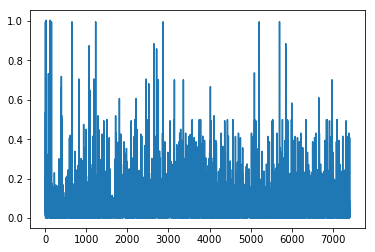

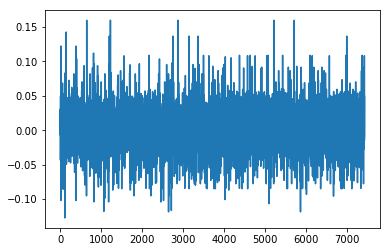

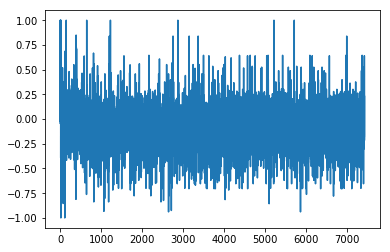

371
1.15748989831
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.55555556  0.77777778  0.77777778  0.88888889  0.77777778
  0.22222222  0.77777778  0.77777778  0.77777778  0.88888889  0.          0.
  0.66666667  0.55555556  1.          0.88888889  0.66666667  0.66666667
  0.66666667  0.66666667  0.44444444  0.77777778  0.77777778  0.33333333
  0.88888889  0.44444444  0.77777778  0.77777778  0.77777778  0.55555556
  0.77777778  0.77777778  0.33333333  0.77777778  0.77777778  0.77777778
  0.77777778  0.55555556  0.33333333  0.33333333  1.          0.77777778
  0.66666667  0.88888889  0.66666667  0.66666667]
Writing away results
1985-12-01 00:00:00


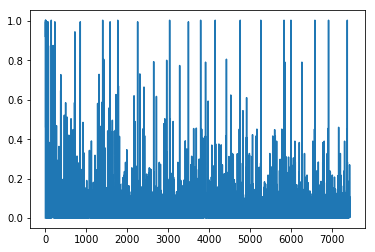

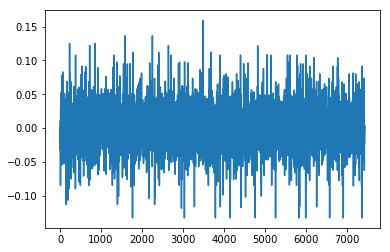

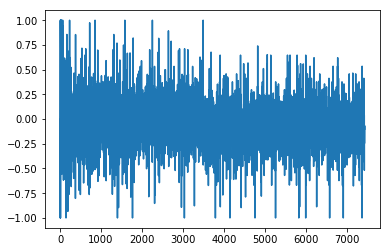

372
1.04496923742
[ 0.33333333  0.77777778  0.88888889  0.77777778  0.77777778  0.55555556
  0.77777778  0.77777778  0.88888889  0.77777778  0.77777778  0.77777778
  0.55555556  0.33333333  0.11111111  0.33333333  0.77777778  0.55555556
  0.33333333  0.11111111  0.88888889  0.77777778  0.77777778  1.          0.
  0.22222222  0.66666667  0.88888889  1.          0.11111111  0.
  0.33333333  0.33333333  0.22222222  0.11111111  0.          1.
  0.55555556  0.11111111  0.66666667  0.88888889  0.33333333  0.22222222
  0.55555556  0.77777778  0.77777778  0.77777778  0.55555556  0.22222222
  0.77777778  0.88888889  0.88888889  0.11111111  0.66666667  0.55555556
  0.66666667  0.11111111  0.55555556  0.22222222]
Writing away results
1986-01-01 00:00:00


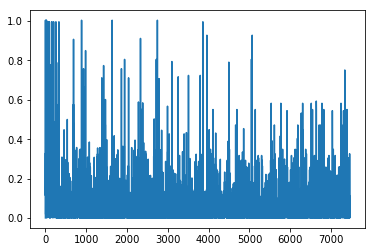

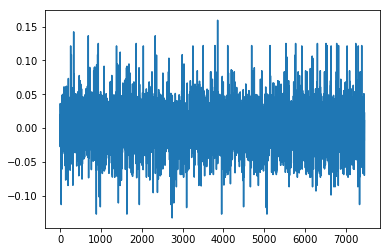

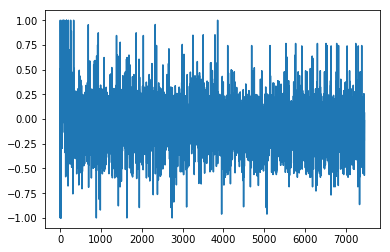

373
1.18488704233
[ 1.          1.          1.          1.          0.          0.44444444
  1.          1.          1.          1.          0.11111111  1.          0.
  0.44444444  0.          0.          0.55555556  0.          0.55555556
  0.          1.          0.77777778  0.77777778  0.55555556  0.22222222
  0.11111111  1.          0.88888889  0.88888889  0.88888889  0.
  0.22222222  0.55555556  1.          1.          0.11111111  0.55555556
  1.          1.          0.55555556  0.          1.          0.44444444
  0.          1.          0.11111111  1.          1.          1.
  0.33333333  0.11111111  1.          0.          0.88888889  1.
  0.77777778  0.55555556  0.77777778  0.55555556]
Writing away results
1986-02-01 00:00:00


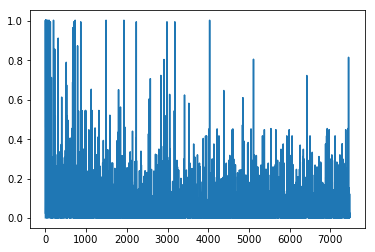

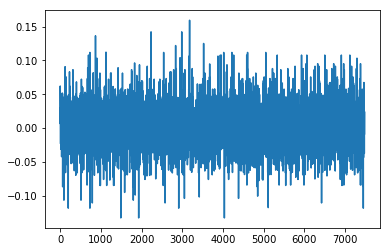

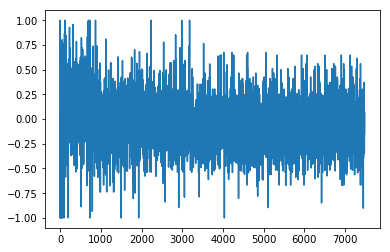

374
1.14141151703
[ 0.77777778  0.77777778  0.77777778  1.          1.          1.          1.
  0.77777778  0.77777778  1.          0.77777778  1.          0.77777778
  0.77777778  1.          0.77777778  1.          0.44444444  0.77777778
  1.          0.66666667  0.66666667  0.66666667  0.66666667  0.
  0.66666667  1.          0.44444444  0.88888889  0.22222222  0.66666667
  1.          0.77777778  0.77777778  0.88888889  0.55555556  0.
  0.88888889  0.77777778  0.55555556  1.          0.77777778  0.77777778
  1.          1.          0.77777778  1.          0.          0.77777778
  0.66666667  0.44444444  0.88888889  0.33333333  0.33333333  0.66666667
  0.66666667  0.66666667  0.66666667  0.55555556]
Writing away results
1986-03-01 00:00:00


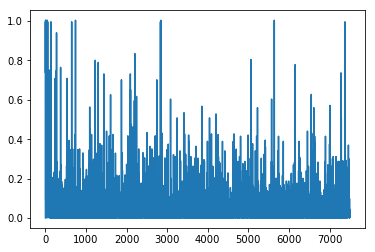

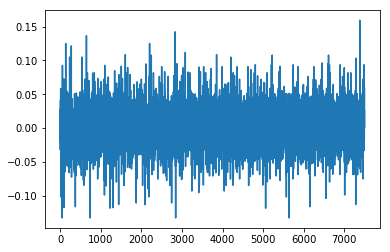

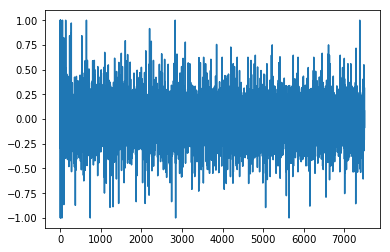

375
1.17729933248
[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.33333333  0.33333333  0.          0.11111111  0.11111111
  0.55555556  0.55555556  0.55555556  0.88888889  0.11111111  0.66666667
  0.66666667  0.66666667  1.          0.66666667  0.66666667  1.
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.33333333  0.55555556  0.55555556  0.77777778  0.33333333
  0.88888889  0.77777778  0.11111111  0.11111111  0.66666667]
Writing away results
1986-04-01 00:00:00


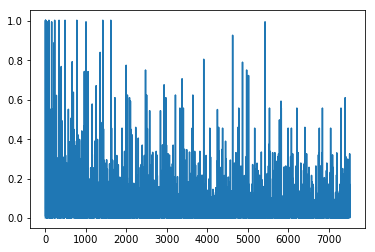

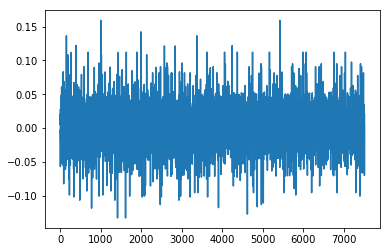

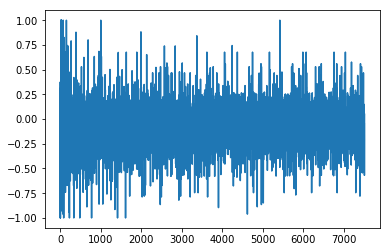

376
1.25728937522
[ 0.77777778  0.44444444  0.          0.          0.77777778  0.
  0.88888889  0.77777778  0.77777778  1.          0.          0.88888889
  0.11111111  0.33333333  0.88888889  1.          0.77777778  0.22222222
  0.55555556  0.55555556  0.77777778  0.          1.          0.44444444
  0.66666667  0.88888889  0.77777778  0.22222222  0.22222222  0.55555556
  0.77777778  0.77777778  0.44444444  0.33333333  0.77777778  1.
  0.77777778  0.88888889  1.          0.11111111  0.11111111  0.88888889
  0.77777778  0.77777778  0.77777778  0.          0.44444444  0.44444444
  0.          1.          0.          0.66666667  0.55555556  0.66666667
  0.55555556  0.22222222  0.77777778  0.11111111  0.33333333]
Writing away results
1986-05-01 00:00:00


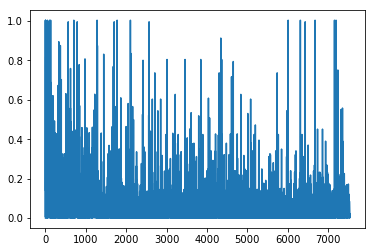

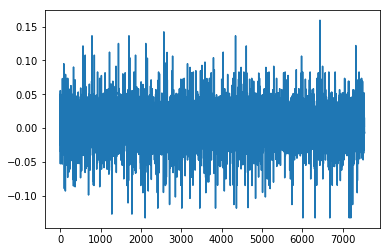

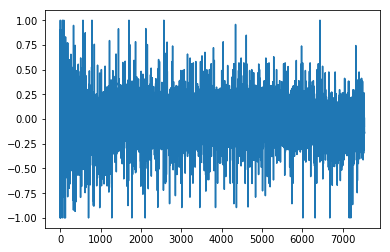

377
1.17626886233
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.66666667  0.55555556  0.77777778
  0.66666667  0.77777778  0.77777778  0.77777778  0.77777778  0.22222222
  0.11111111  0.44444444  0.          0.          0.88888889  0.22222222
  0.44444444  0.          0.44444444  0.44444444  0.77777778  0.77777778
  0.77777778  0.33333333  0.66666667  0.77777778  0.77777778  0.55555556
  0.55555556  0.77777778  0.77777778  0.55555556  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.11111111  0.77777778  0.44444444
  0.11111111  0.55555556  0.22222222  0.44444444  0.44444444  0.44444444
  0.          0.          0.88888889  0.66666667  0.77777778]
Writing away results
1986-06-01 00:00:00


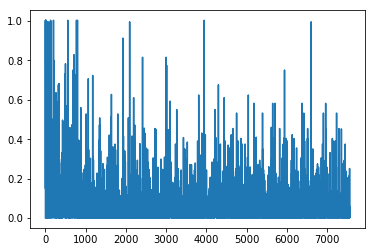

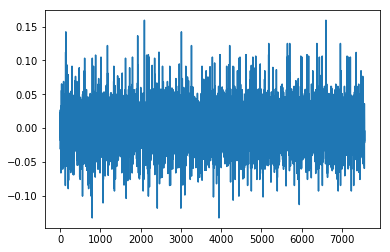

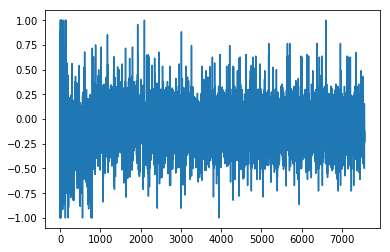

378
1.18256720175
[ 0.44444444  0.88888889  0.44444444  0.22222222  0.44444444  0.55555556
  0.22222222  0.88888889  0.44444444  0.88888889  0.          1.
  0.88888889  0.          0.88888889  0.22222222  0.77777778  0.11111111
  0.          0.22222222  0.55555556  0.77777778  0.33333333  0.          0.
  0.22222222  0.77777778  0.66666667  0.44444444  0.88888889  0.
  0.55555556  0.55555556  0.44444444  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.44444444  0.88888889  0.88888889  0.44444444
  0.          0.88888889  0.55555556  0.77777778  0.88888889  1.
  0.88888889  0.77777778  0.33333333  0.33333333  0.11111111  0.55555556
  0.44444444  0.55555556  0.44444444  0.88888889]
Writing away results
1986-07-01 00:00:00


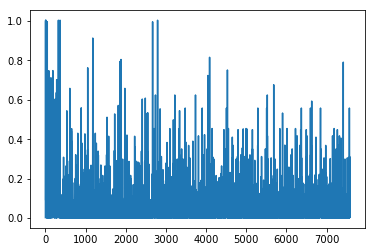

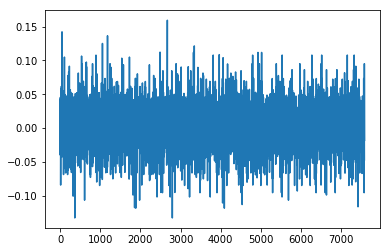

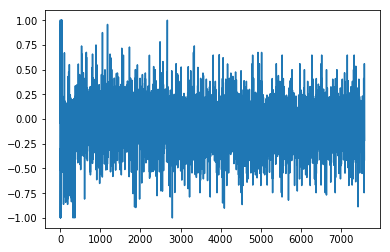

379
1.23042503836
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.22222222  0.77777778  0.77777778  0.55555556  0.77777778  0.77777778
  0.77777778  0.77777778  0.55555556  0.77777778  0.66666667  0.66666667
  0.44444444  0.22222222  0.66666667  0.66666667  0.66666667  1.
  0.66666667  0.44444444  0.22222222  0.77777778  0.77777778  0.77777778
  0.22222222  0.55555556  0.77777778  0.77777778  0.22222222  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.44444444  0.22222222  0.88888889
  0.44444444  0.66666667  0.66666667  0.66666667  0.66666667  0.22222222
  0.22222222  0.22222222  1.          0.77777778  0.77777778]
Writing away results
1986-08-01 00:00:00


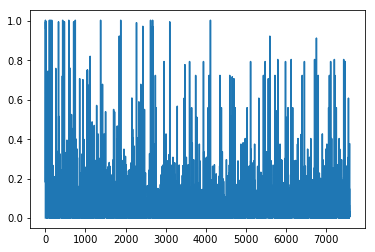

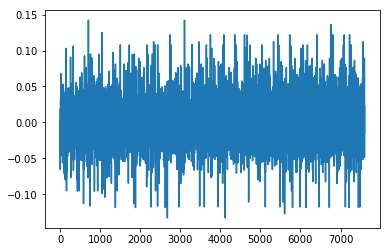

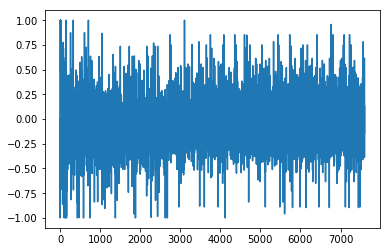

380
1.41032193685
[ 1.          1.          1.          0.44444444  1.          1.          1.
  1.          0.44444444  1.          1.          1.          1.          1.
  0.11111111  0.          0.22222222  0.55555556  0.88888889  0.11111111
  0.77777778  0.88888889  0.22222222  0.22222222  0.66666667  1.          1.
  1.          1.          0.77777778  1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          0.44444444  0.55555556  1.          0.22222222
  0.55555556  0.11111111  0.11111111  0.22222222  0.66666667  0.77777778
  1.          1.          1.          1.          0.44444444  0.44444444]
Writing away results
1986-09-01 00:00:00


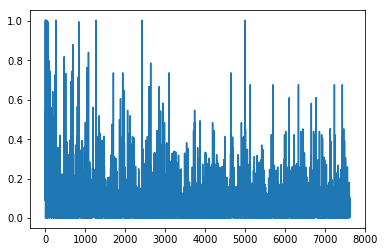

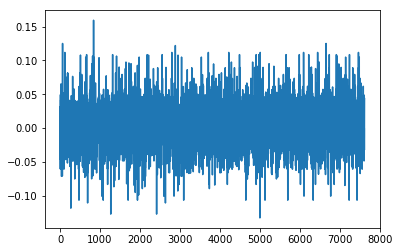

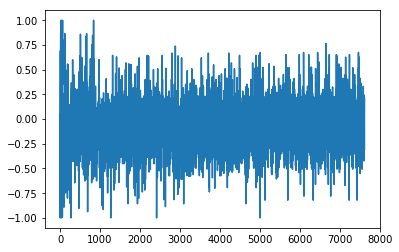

381
1.40681038323
[ 0.22222222  0.88888889  1.          0.88888889  0.88888889  1.
  0.88888889  0.88888889  1.          0.88888889  1.          0.88888889
  0.88888889  0.22222222  0.44444444  0.33333333  0.33333333  1.
  0.66666667  0.66666667  0.33333333  0.          0.88888889  1.          1.
  0.22222222  0.88888889  0.55555556  1.          0.22222222  1.
  0.88888889  0.88888889  0.77777778  0.77777778  0.88888889  0.22222222
  0.22222222  0.88888889  0.77777778  0.22222222  0.77777778  0.22222222
  0.11111111  0.55555556  0.          0.66666667  0.          0.44444444
  0.33333333  1.          0.33333333  1.          1.          0.88888889
  0.88888889  0.88888889  0.88888889  0.77777778]
Writing away results
1986-10-01 00:00:00


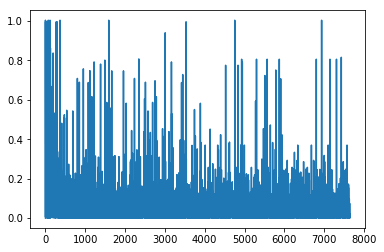

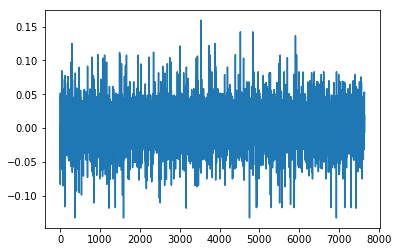

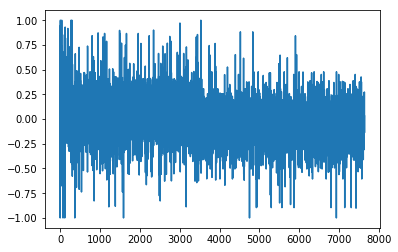

382
1.34096984055
[ 1.          0.66666667  0.66666667  0.77777778  0.66666667  1.
  0.66666667  1.          1.          0.55555556  0.55555556  0.66666667
  0.22222222  0.77777778  0.          0.          0.          0.66666667
  0.22222222  0.11111111  0.11111111  0.          0.          0.77777778
  0.66666667  1.          0.66666667  0.44444444  0.88888889  1.
  0.66666667  0.44444444  1.          0.66666667  0.66666667  1.          1.
  1.          0.44444444  1.          0.66666667  0.66666667  0.22222222
  0.66666667  0.33333333  0.88888889  0.22222222  0.          0.22222222
  0.          0.33333333  0.66666667  0.66666667  0.66666667  1.          1.
  1.          0.55555556  0.66666667]
Writing away results
1986-11-01 00:00:00


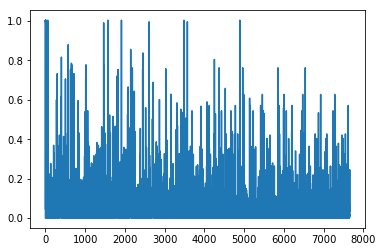

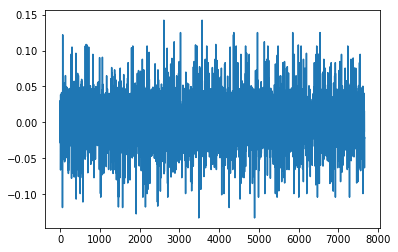

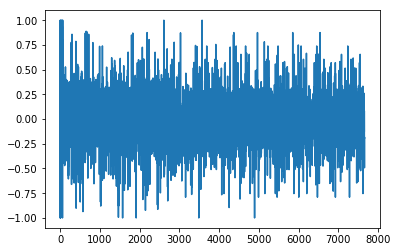

383
1.14848383634
[ 1.          0.44444444  0.66666667  0.44444444  0.66666667  1.
  0.66666667  0.66666667  0.44444444  0.66666667  0.66666667  0.22222222
  0.22222222  0.          0.          0.77777778  0.77777778  0.88888889
  0.77777778  0.          0.          0.77777778  0.66666667  0.44444444
  0.44444444  0.66666667  0.66666667  0.44444444  0.66666667  0.66666667
  0.44444444  0.44444444  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  1.          0.66666667  1.          0.88888889
  0.66666667  0.77777778  0.88888889  0.77777778  0.22222222  0.
  0.77777778  0.77777778  0.33333333  1.          0.44444444  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1986-12-01 00:00:00


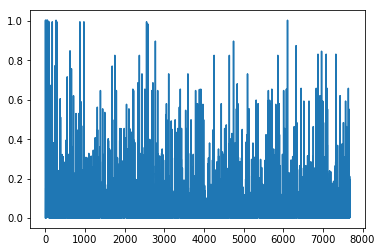

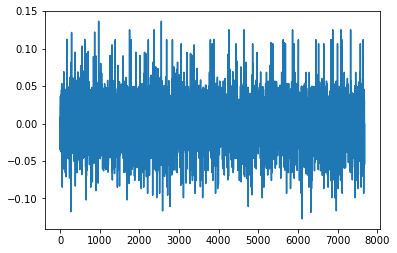

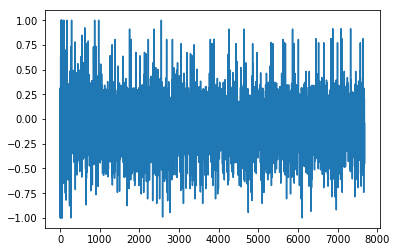

384
0.992083724616
[ 0.33333333  0.66666667  0.55555556  0.11111111  0.44444444  0.11111111
  0.44444444  0.11111111  0.66666667  0.88888889  1.          0.77777778
  0.          0.77777778  0.66666667  0.55555556  1.          0.44444444
  0.44444444  0.22222222  0.22222222  0.66666667  0.55555556  1.
  0.66666667  0.66666667  1.          0.44444444  0.66666667  0.88888889
  0.11111111  0.66666667  0.33333333  0.44444444  0.66666667  0.66666667
  0.11111111  0.44444444  0.66666667  0.55555556  1.          0.66666667
  0.22222222  1.          0.77777778  0.77777778  0.77777778  0.77777778
  0.          0.33333333  0.11111111  0.44444444  0.44444444  0.44444444
  0.11111111  0.11111111  0.66666667  0.33333333  0.66666667]
Writing away results
1987-01-01 00:00:00


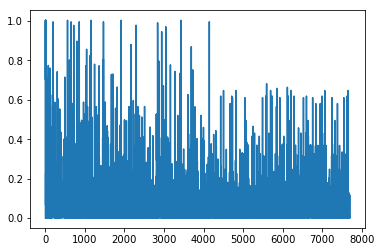

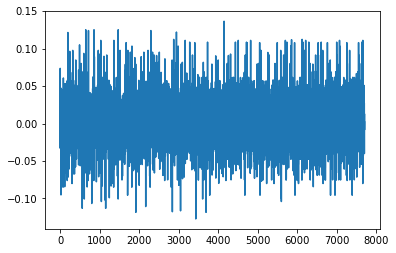

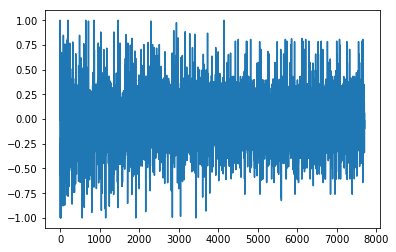

385
1.14016387491
[ 0.88888889  0.88888889  0.88888889  0.77777778  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.66666667  0.11111111  0.33333333
  0.55555556  0.55555556  0.11111111  0.11111111  0.44444444  1.
  0.44444444  0.66666667  0.88888889  0.88888889  0.88888889  0.77777778
  0.88888889  0.88888889  1.          0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.88888889  0.          0.88888889  0.
  0.11111111  0.66666667  0.66666667  0.33333333  0.          0.88888889
  0.11111111  0.88888889  0.88888889  1.          1.          0.22222222
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889]
Writing away results
1987-02-01 00:00:00


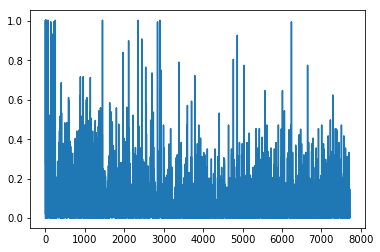

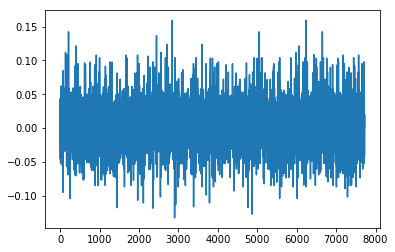

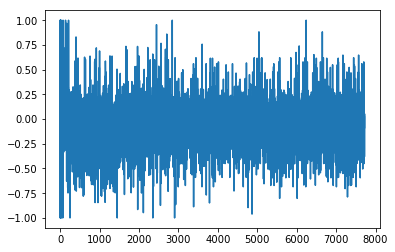

386
1.14511517739
[ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.88888889  0.          0.66666667  0.88888889
  1.          0.88888889  0.44444444  1.          0.66666667  0.11111111
  0.88888889  0.77777778  0.77777778  0.55555556  0.11111111  0.77777778
  0.44444444  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.55555556
  0.77777778  0.77777778  0.88888889  0.55555556  0.11111111  0.44444444
  1.          0.66666667  0.          0.66666667  0.22222222  1.
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778
  0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
Writing away results
1987-03-01 00:00:00


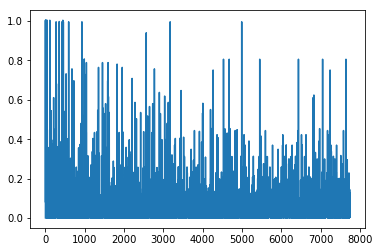

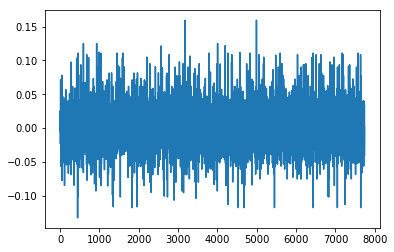

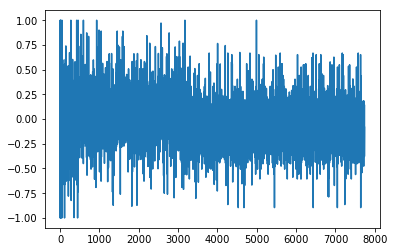

387
1.29566994041
[ 0.88888889  0.22222222  0.88888889  0.22222222  0.88888889  0.88888889
  0.22222222  0.55555556  0.          0.          1.          0.66666667
  0.          0.22222222  0.22222222  0.          0.          0.
  0.77777778  0.22222222  1.          0.33333333  0.33333333  0.22222222
  0.88888889  0.33333333  0.88888889  0.66666667  0.88888889  0.33333333
  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889  0.88888889
  0.44444444  0.77777778  0.33333333  0.66666667  0.55555556  0.55555556
  0.          0.55555556  0.          0.66666667  0.88888889  0.66666667
  0.22222222  1.          0.88888889  0.88888889  0.88888889  0.88888889
  0.88888889  0.88888889  0.33333333  0.33333333  1.        ]
Writing away results
1987-04-01 00:00:00


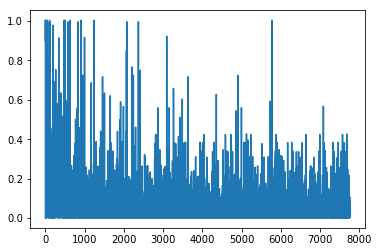

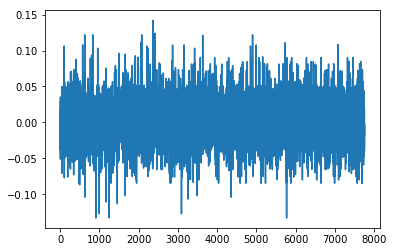

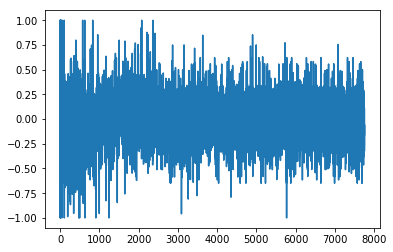

388
1.23303150881
[ 1.          1.          0.66666667  0.88888889  0.66666667  1.
  0.33333333  0.44444444  0.          0.          0.22222222  1.          1.
  0.44444444  0.55555556  0.          0.44444444  1.          0.66666667
  0.66666667  0.88888889  0.66666667  0.66666667  0.88888889  0.88888889
  0.66666667  0.66666667  0.88888889  1.          0.66666667  0.66666667
  1.          1.          0.88888889  0.22222222  1.          0.66666667
  0.88888889  0.          0.44444444  0.44444444  0.          0.44444444
  0.44444444  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.55555556  1.          1.          0.66666667  0.66666667  0.66666667
  0.88888889  0.66666667  0.66666667  0.66666667]
Writing away results
1987-05-01 00:00:00


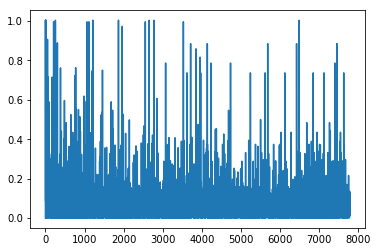

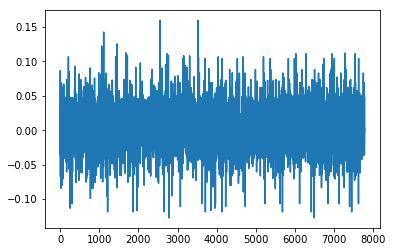

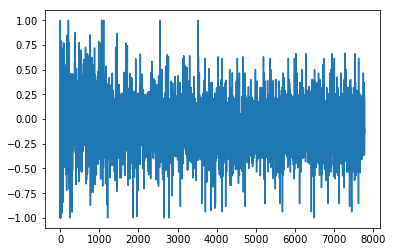

389
1.07140073436
[ 0.44444444  0.22222222  0.33333333  0.88888889  0.88888889  0.          1.
  1.          0.11111111  0.66666667  0.55555556  1.          1.
  0.77777778  0.88888889  0.66666667  0.44444444  1.          0.
  0.11111111  0.44444444  0.88888889  0.11111111  1.          0.88888889
  0.33333333  0.11111111  0.88888889  0.88888889  0.55555556  0.88888889
  0.22222222  0.33333333  1.          1.          0.          1.
  0.55555556  0.77777778  0.          0.66666667  0.22222222  0.66666667
  0.66666667  0.88888889  0.44444444  1.          0.77777778  0.88888889
  0.88888889  0.22222222  0.55555556  0.88888889  0.22222222  0.55555556
  1.          0.55555556  0.77777778  0.22222222]
Writing away results
1987-06-01 00:00:00


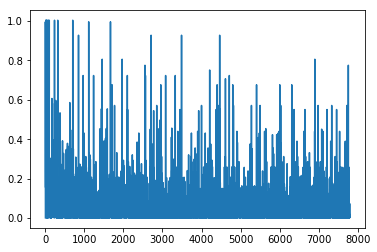

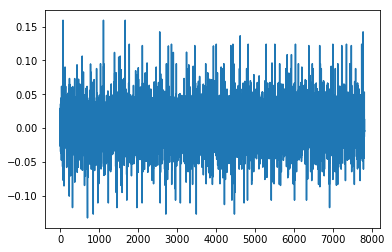

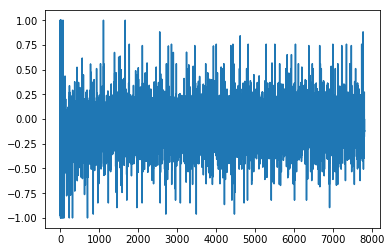

390
1.31880878017
[ 0.44444444  0.88888889  1.          0.77777778  0.33333333  0.22222222
  0.33333333  0.          0.          1.          0.55555556  0.11111111
  0.22222222  0.22222222  0.66666667  0.55555556  1.          0.88888889
  0.77777778  0.44444444  0.77777778  0.88888889  0.44444444  0.77777778
  1.          1.          0.77777778  0.77777778  1.          0.77777778
  0.44444444  1.          1.          0.77777778  0.88888889  0.11111111
  0.44444444  0.          0.22222222  0.22222222  0.33333333  0.          1.
  0.77777778  0.11111111  0.11111111  0.11111111  0.77777778  0.44444444
  0.77777778  1.          1.          1.          1.          1.          1.
  0.88888889  0.77777778  0.77777778]
Writing away results
1987-07-01 00:00:00


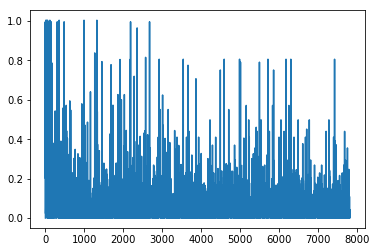

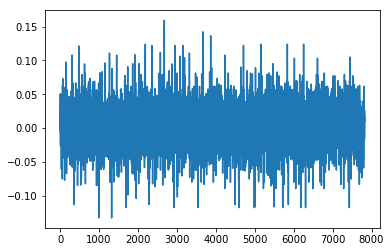

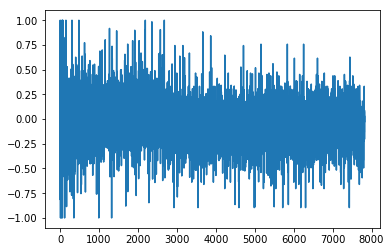

391
1.03502946015
[ 0.88888889  0.88888889  0.88888889  0.33333333  0.44444444  0.
  0.11111111  0.44444444  0.          0.44444444  0.44444444  0.55555556
  0.66666667  0.33333333  0.88888889  0.11111111  0.11111111  0.66666667
  0.88888889  0.11111111  0.88888889  0.55555556  0.22222222  0.88888889
  0.22222222  0.22222222  0.88888889  0.88888889  1.          0.88888889
  0.11111111  0.22222222  0.22222222  0.11111111  0.44444444  0.55555556
  0.11111111  0.33333333  0.33333333  0.33333333  0.          0.55555556
  0.22222222  0.88888889  0.22222222  0.55555556  0.88888889  0.88888889
  0.88888889  0.88888889  0.22222222  0.22222222  0.88888889  1.
  0.88888889  1.          0.88888889  0.88888889  1.        ]
Writing away results
1987-08-01 00:00:00


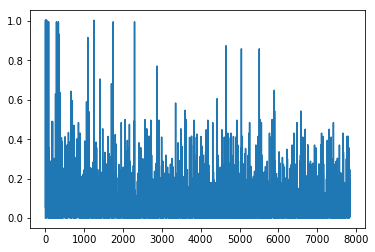

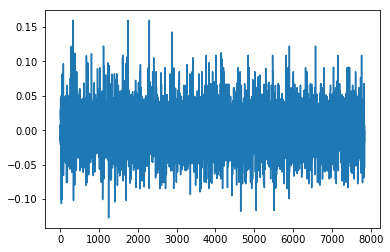

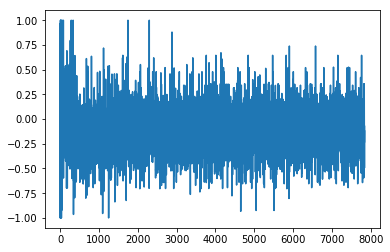

392
1.05284544389
[ 1.          0.88888889  1.          0.44444444  0.44444444  0.11111111
  0.33333333  0.77777778  0.77777778  0.77777778  0.66666667  0.66666667
  0.11111111  1.          0.          0.33333333  0.77777778  0.22222222
  0.88888889  0.33333333  0.77777778  0.11111111  0.33333333  0.77777778
  0.77777778  1.          0.77777778  0.77777778  1.          1.
  0.77777778  0.          0.11111111  0.22222222  0.          0.33333333
  0.44444444  0.55555556  0.44444444  0.66666667  0.11111111  0.88888889
  0.77777778  0.77777778  0.66666667  0.55555556  1.          0.33333333
  0.77777778  0.88888889  1.          0.77777778  0.77777778  0.77777778
  1.          0.77777778  1.          0.44444444  0.        ]
Writing away results
1987-09-01 00:00:00


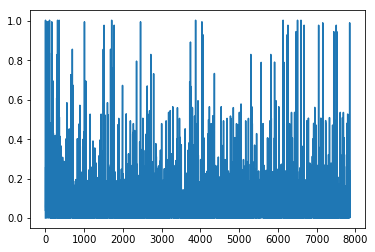

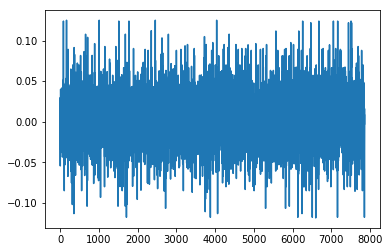

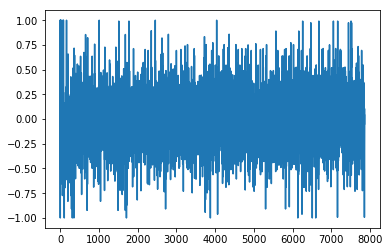

393
1.09766027296
[ 1.          0.22222222  0.22222222  0.66666667  0.66666667  0.66666667
  0.77777778  0.11111111  0.22222222  0.22222222  0.33333333  0.11111111
  1.          1.          1.          0.88888889  1.          0.33333333
  0.88888889  1.          1.          1.          1.          1.          1.
  1.          1.          1.          0.88888889  1.          1.          0.
  0.88888889  0.66666667  0.11111111  0.22222222  0.22222222  0.33333333
  0.22222222  0.66666667  0.77777778  0.          1.          0.88888889
  0.88888889  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.88888889  1.
  0.88888889  1.        ]
Writing away results
1987-10-01 00:00:00


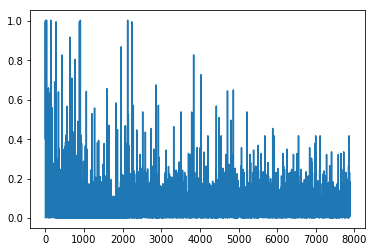

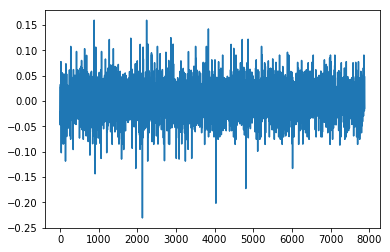

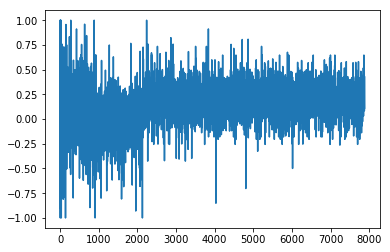

394
1.31391484467
[ 0.22222222  0.55555556  0.55555556  0.          0.          0.22222222
  0.33333333  0.55555556  0.55555556  0.55555556  0.55555556  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.          0.44444444  0.          0.33333333  0.55555556  0.55555556
  0.55555556  0.55555556  0.          0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1987-11-01 00:00:00


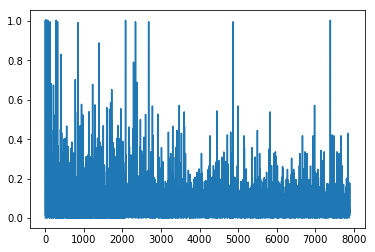

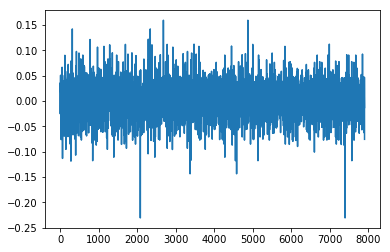

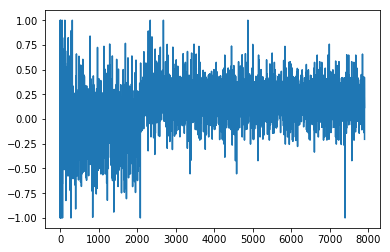

395
1.24591918273
[ 0.55555556  0.55555556  0.55555556  0.55555556  1.          0.88888889
  0.55555556  0.44444444  0.55555556  0.55555556  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.55555556  0.88888889  0.55555556  0.55555556  0.55555556
  0.55555556  0.33333333  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111]
Writing away results
1987-12-01 00:00:00


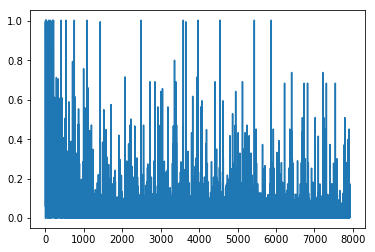

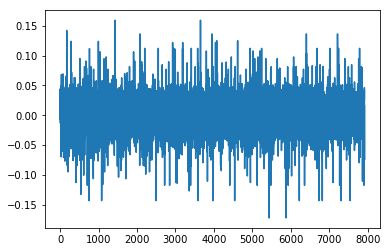

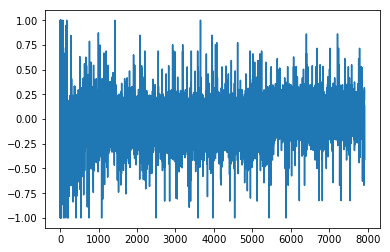

396
1.37204516215
[ 0.11111111  1.          0.          0.66666667  0.33333333  0.33333333
  1.          0.33333333  0.11111111  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.77777778  0.66666667  0.66666667  0.77777778
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.          0.66666667
  0.55555556  0.33333333  0.33333333  0.33333333  0.33333333  0.11111111
  0.          0.66666667  0.66666667  0.77777778  0.55555556  0.55555556
  0.55555556  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1988-01-01 00:00:00


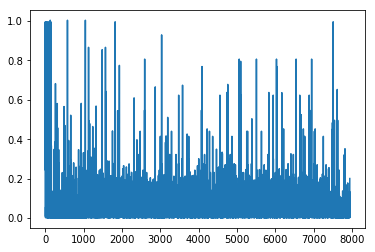

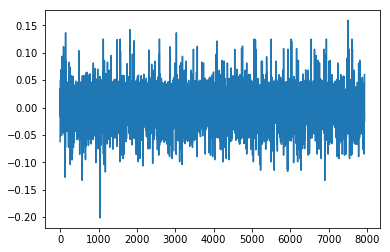

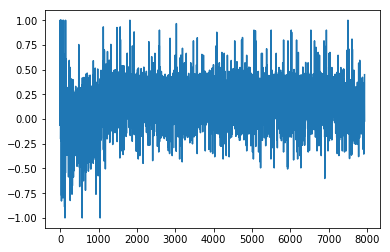

397
1.27062851108
[ 0.77777778  0.77777778  0.66666667  0.66666667  0.44444444  0.44444444
  0.66666667  0.          0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.77777778  0.22222222  0.66666667
  0.66666667  0.66666667  0.77777778  0.77777778  0.77777778  0.77777778
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222
  0.22222222  0.22222222  0.22222222  0.22222222  0.22222222]
Writing away results
1988-02-01 00:00:00


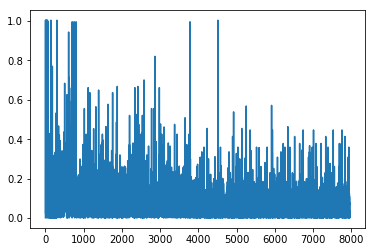

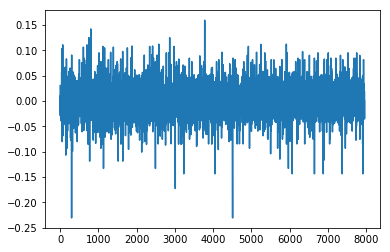

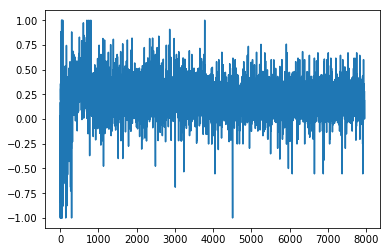

398
1.41105251607
[ 0.          0.          0.          0.          0.33333333  0.          0.
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.          0.66666667  0.66666667  0.          0.          0.
  0.          0.22222222  1.          0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667]
Writing away results
1988-03-01 00:00:00


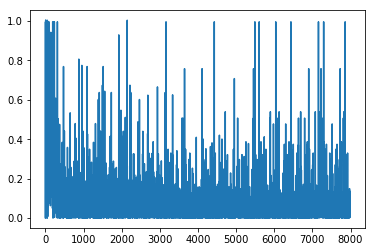

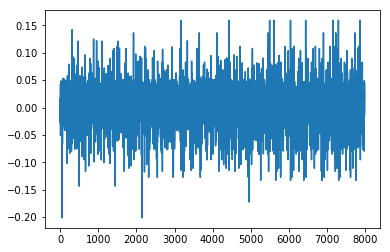

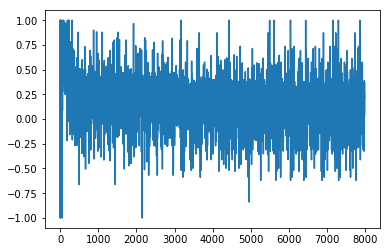

399
1.36161584132
[ 0.66666667  1.          1.          0.66666667  1.          1.
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.77777778  0.55555556  0.66666667  0.88888889  1.          1.
  1.          1.          0.66666667  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556]
Writing away results
1988-04-01 00:00:00


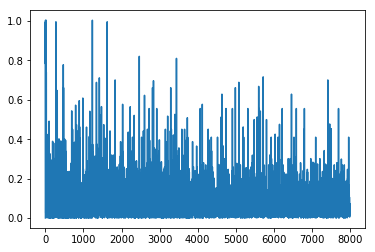

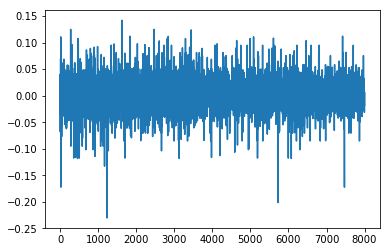

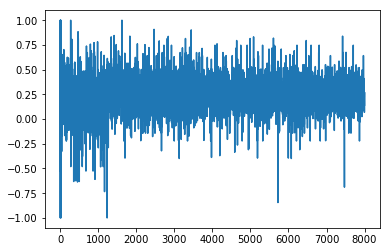

400
1.36567070782
[ 0.55555556  0.          0.          0.          0.          0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.          0.44444444  0.44444444  0.          0.          0.          0.
  0.          0.          0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1988-05-01 00:00:00


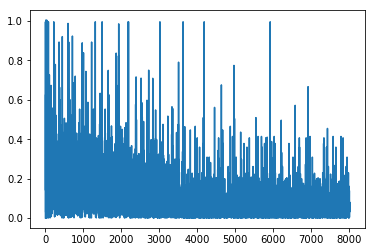

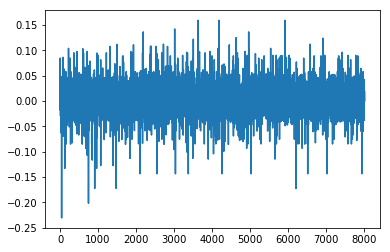

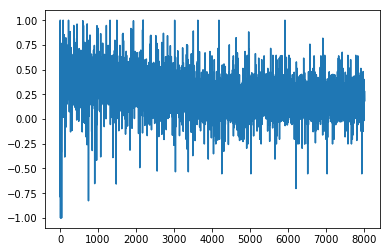

401
1.45523329002
[ 0.11111111  0.11111111  0.11111111  0.11111111  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.11111111
  0.66666667  0.88888889  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  1.          0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
Writing away results
1988-06-01 00:00:00


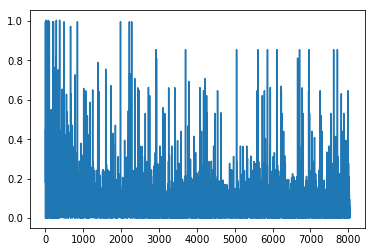

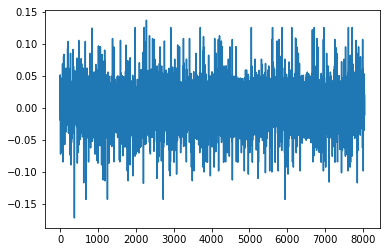

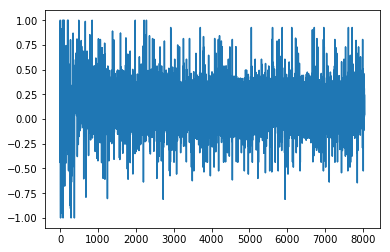

402
1.33844003047
[ 0.77777778  0.77777778  0.77777778  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.88888889  0.44444444
  0.33333333  0.55555556  0.77777778  0.77777778  0.77777778  0.
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444
  0.44444444  0.44444444  0.44444444  0.44444444  0.44444444]
Writing away results
1988-07-01 00:00:00


In [ ]:
# initialize
init = tf.global_variables_initializer()
startepsilon = 1
endepsilon = 0.1
startlr = 0.8
endlr = 0.01
startgamma = 0.01
endgamma = 0.8
util_gamma = 2
TWlist = []
Index = []
MWeights = []
AllWeights = []
Turnover = []
chooserlist = []
RU = []
learningrateQ = 0.01
n = len(data)
periods = 60
epochs = 20     # preferred to have a low amount of epochs because otherwise the the same data is used multiple times (usually not the case in stock returns)
all_r = []

# data parsing
dates = data['Date']
mdata = data[['r','xs','xb']]
mdata.index = pd.DatetimeIndex(dates)

# include the lags
for i in range(1,num_lags+1):  # 1 till 11
    mdata['r_lag' + str(i)] = mdata['r'].shift(i)
    mdata['xs_lag' + str(i)] = mdata['xs'].shift(i)
    mdata['xb_lag' + str(i)] = mdata['xb'].shift(i)

mdata.drop(mdata.head(num_lags).index, inplace=True)
# have a look at the data (if not include NANs)
# print(mdata)

# Train the the Q-function DNN
with tf.Session() as sess:
    for i in range(240,int(n-periods-1)):
        lostlist = []
        sess.run(init) # initialize the Neural Network again
        OptimalWeights = np.zeros(periods-1)
        currentK = 0
        print(mdata.index[i])
        rmin = -1
        rmax = 1
        lr = 0.1
        gamma = 0.98
        currentEpoch = 0
        rlist = []  
        runitlist = []
        while currentEpoch < epochs:
            epsilon = startepsilon*(epochs - currentEpoch)/epochs + endepsilon*(1 - (epochs-currentEpoch)/epochs)
            #Training of the Q-Network for the data available (with Neural Nets) 
            indexes = np.asarray(range(i)) # because of range (automatically minus 1(start at 0))
            random.shuffle(indexes)
            for j in indexes:
                s = mdata.iloc[j,:].values.reshape(1,num_inputvar)
                #Choose an action by greedily (with e chance of random action) from the Q-network
                a_int,allQ = sess.run([A_Max,output],feed_dict={NN_input:s})
                a = A[a_int]  # -1 because index
                if np.random.rand(1) < epsilon:
                    a = random.choice(A)

                #Get new state and reward from environment
                s1 = mdata.iloc[j+1,:].values.reshape(1,num_inputvar)
                r = (a*s1[0][1] + (1-a)*s1[0][2]) #reward: this is now the wealth gained from this step, but could be other rewards like utility
                #r = ((a*s1[0][1] + (1-a)*s1[0][2])**(1-util_gamma))/(1-util_gamma) # utility
                #1/(1-gamma))*(pow((w*np.exp(sim[j][K-k][1]) + (1-w)*np.exp(sim[j][K-k][2])),(1-gamma))*Ufut[j])
                rlist.append(r)
                Q = sess.run(output,feed_dict={NN_input:s1})
                    
                #Obtain maxQ' and set our target value for chosen action.
                Q1 = np.max(Q)
                targetQ = allQ
                if(len(rlist)>1):
                    rmin = np.min(rlist)
                    rmax = np.max(rlist)
                runit = -1 + 2*((r -rmin)/(rmax-rmin))
                targetQ[0,int(a*(num_actions-1))] = runit + gamma*Q1
                runitlist.append(runit)
                #Train the neural network using target and predicted Q values
                opt,W1,loss_ = sess.run([optmzr,w1,loss],feed_dict={NN_input:s,Q_Next:targetQ,learning_rate:lr})
                lostlist.append(loss_)
            currentEpoch += 1
                
        while currentK < periods - 1:
            returns_list = []
            # After training now calculate the optimal weights for the K=60 periods to come
            s = mdata.iloc[i+currentK,:].values.reshape(1,num_inputvar)
            a_int,allQ = sess.run([A_Max,output],feed_dict={NN_input:s})
            aOpt = A[a_int]
            OptimalWeights[currentK] = aOpt
            returns_list.append((aOpt*s[0][1] + (1-aOpt)*s[0][2]))
            currentK += 1
            
        # For insight purposes (Write away)
        plt.ion()
        plt.plot(lostlist)
        plt.show()
        plt.plot(rlist)
        plt.show()
        plt.plot(runitlist)
        plt.show()
        
        firstdiff = OptimalWeights[1:] - OptimalWeights[:-1]
        MWeights.append(np.mean(OptimalWeights))
        TerminalWealth = np.exp(sum(OptimalWeights*mdata[i+1:i+currentK+1]['xs'] + (1-OptimalWeights)*mdata[i+1:i+currentK+1]['xb']))
        TWlist.append(TerminalWealth)
        Index.append(mdata.index[i])
        print(i)
        all_r.append(returns_list)
        Turnover.append(sum(abs(firstdiff*np.exp(mdata[i+1:i+currentK]['xs'])) + abs((1-firstdiff)*np.exp(mdata[i+1:i+currentK]['xb']))))
        RU.append((1/(1-5))*pow(TerminalWealth,(1-5)))
        print(TerminalWealth)
        print(OptimalWeights)
        AllWeights.append(OptimalWeights)
        print('Writing away results')
        df = pd.DataFrame({'index date':Index,'TW':TWlist, 'Mean Weights Xs':MWeights,'Turnover':Turnover, 'Realized Utility':RU, 'OptimalWeights':AllWeights, 'Returns':all_r})
        df.to_excel('RL-NN_ReturnWeights.xlsx', sheet_name='sheet1', index=False)
print('Done!')
        